In [1]:
# plot size
options(repr.plot.width = 15, repr.plot.height = 10)
options(repr.plot.width = 5, repr.plot.height = 3,repr.plot.res = 300)
# p1+p2+p3
library(patchwork)
library(directlabels)
library(tidyverse, quietly = TRUE)
library(gghighlight)

Warning message:
"package 'patchwork' was built under R version 4.3.1"
Warning message:
"package 'directlabels' was built under R version 4.3.1"
── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()  masks stats::filter()
✖ purrr::flatten() masks jsonlite::flatten()
✖ dplyr::lag()     masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Warning message:
"package 'gghighlight' was built under R version 4.3.1"


# Major constiture of ggplot

Aesthetic mapping: mapped to x position, y position

layer: points (added with +)

Choice of layering

    colour and shape work well with categorical variables,
     while size works well for continuous variable
Facetting

    creates tables of graphics by splitting the data
Create a series of simple plots that tell a story,

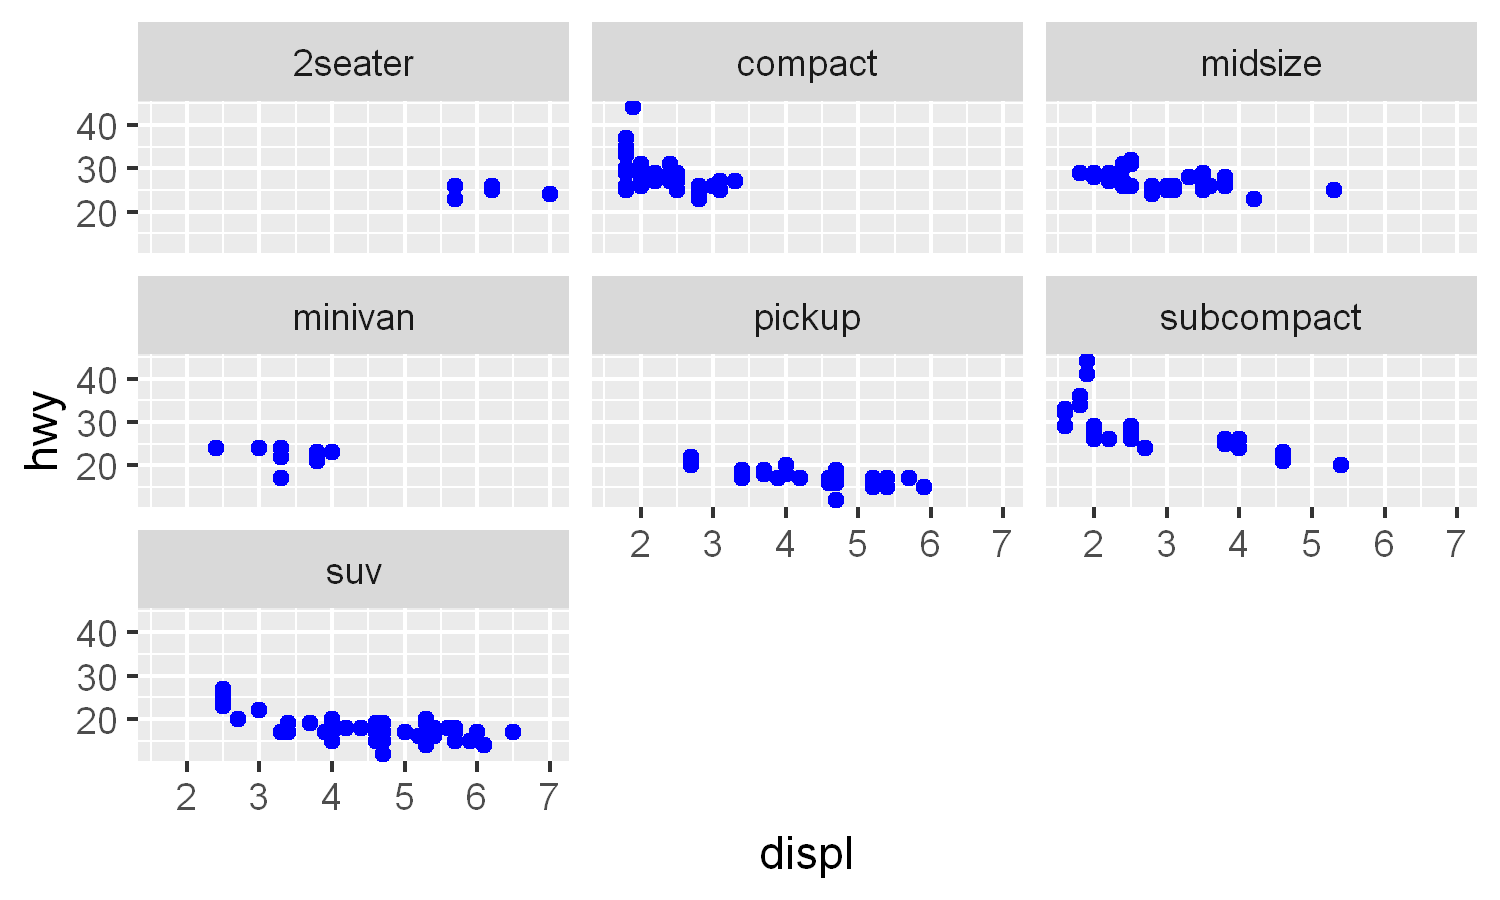

In [2]:

# ggplot(mpg, aes(displ, hwy, colour = class, shape = drv, size = cyl)) + 
ggplot(mpg, aes(displ, hwy)) + 
# geom_point(aes(color='blue')) + # blue caled to pink
    geom_point(color='blue') + # R color blue
    facet_wrap(~class) 

# Type of geoms

geom_smooth()

geom_box_plot()

    geom_boxplot(width = .4, height = .5)
    +guides(color=guide_colorbar(barheight=unit(2,"cm")

geom_histogram()/ geom_freqpoly()  

    for continuous variables

geom_bar()

    distribution for categorical variable

geom_path()/ geom_line()
    point in default order/ connect in sorted
    aesthetic linetype, which maps a categorical variable to solid, dotted and dashed lines

geom_area()
    line plot filled to the y-axis

geom_polygon()
    draws polygons, which are filled paths

geom_rect()/ tile(), raster()

For one variable(x only, count or identity(already n)/ bin)

    geom_bar()/ geom_histogram/ geom_density()/ geom_dotplot()/ geom_freqpoly()
    
Two variables(x,y)
    
    continuous
        geom_point/quantile/ rug-marginal rug plot/ smooth/ text/
    Distribution
        geom_bind2d()/ density2d()/ hex
    At least one discrete
        geom_count/ gitter
    One continuous, one discrete
        geom_bar(stat='identity')/ boxplot/ violin
    Time & continuous
        geom_area/ line/ step
    uncertainty
        geom_crossbar()/ errorbar/ linerange/ pointrange
    spatial 
        geom_map
  
Three variables

    geom_contour/ tile/ raster

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


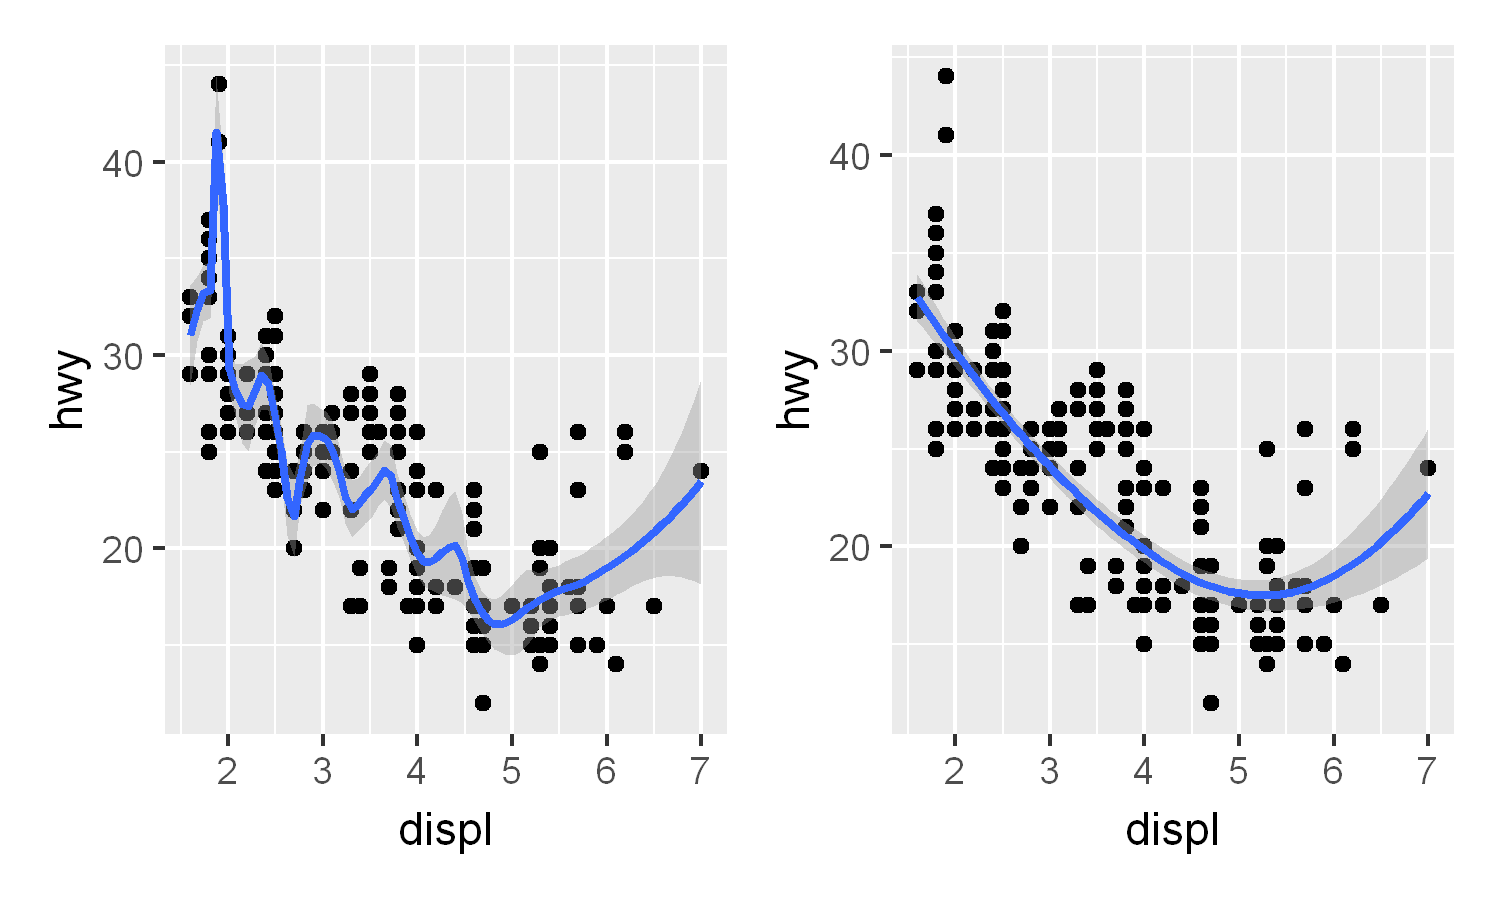

In [3]:
par(mfrow = c(1, 2))
p1=  ggplot(mpg, aes(displ, hwy)) +
    geom_point() +
    geom_smooth(span = 0.2) # control wiggliness of line
p2 =ggplot(mpg, aes(displ, hwy)) +
    geom_point() +
    geom_smooth(span = 1)
#     geom_smooth(method = "gam", formula = y ~ s(x)) # method = 'lm'/'rlm'(outlier)
p1+p2

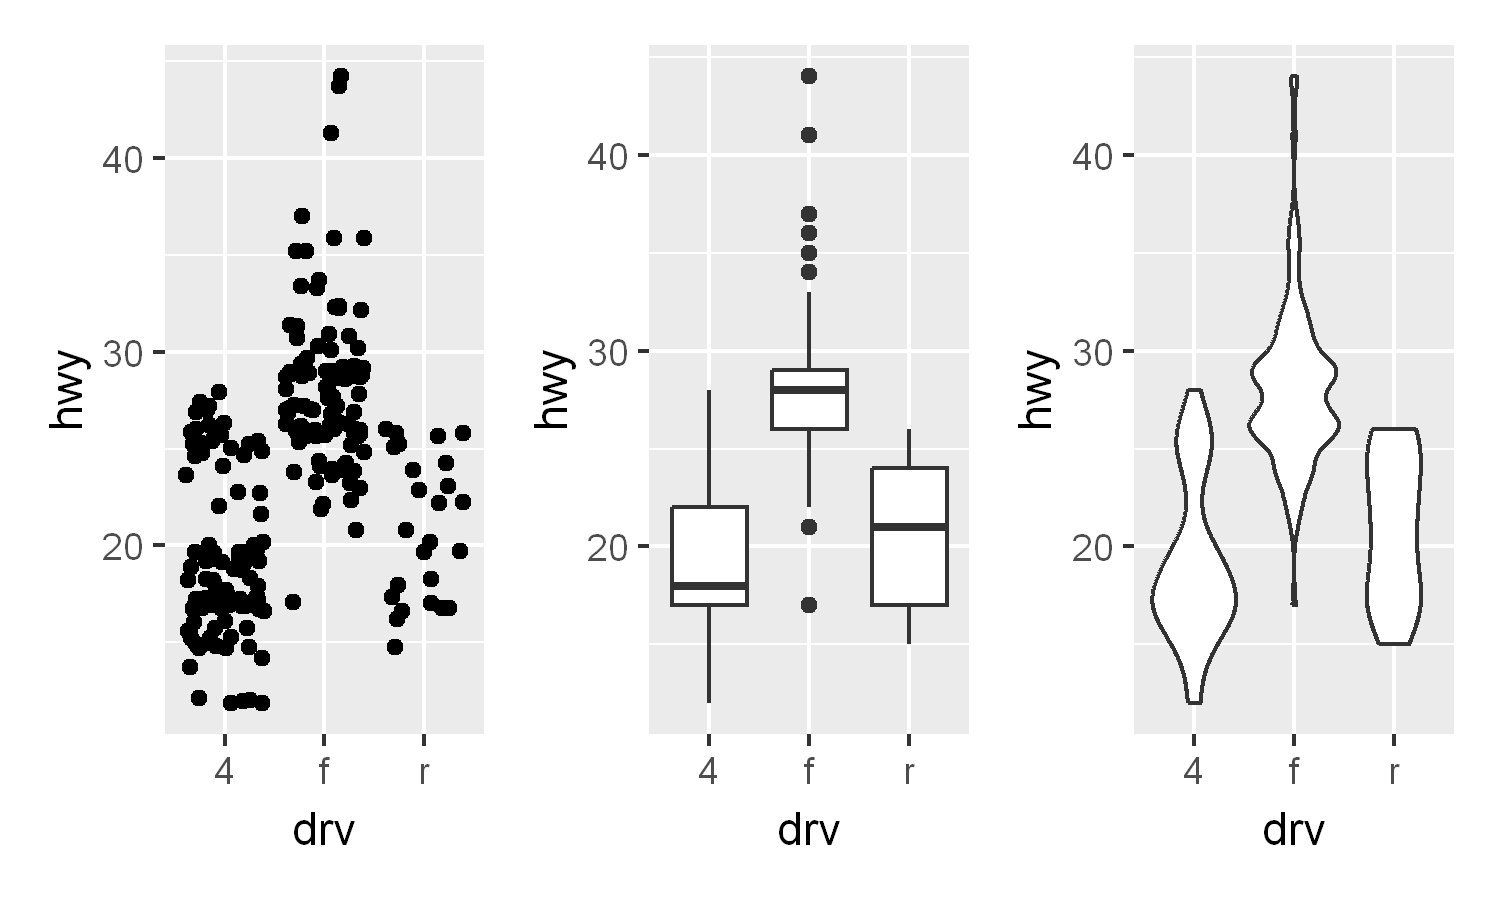

In [4]:
layout.matrix <- matrix(c(2, 1, 0, 3), nrow = 2, ncol = 2)
layout(mat = layout.matrix,
       heights = c(1, 2), # Heights of the two rows
       widths = c(2, 2)) # Widths of the two columns
p1 = ggplot(mpg, aes(drv, hwy)) + geom_jitter() # avoid overplotting
p2 = ggplot(mpg, aes(drv, hwy)) + geom_boxplot() # summarize shape
p3 = ggplot(mpg, aes(drv, hwy)) + geom_violin() # ~ density of distribution

p1+p2+p3

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


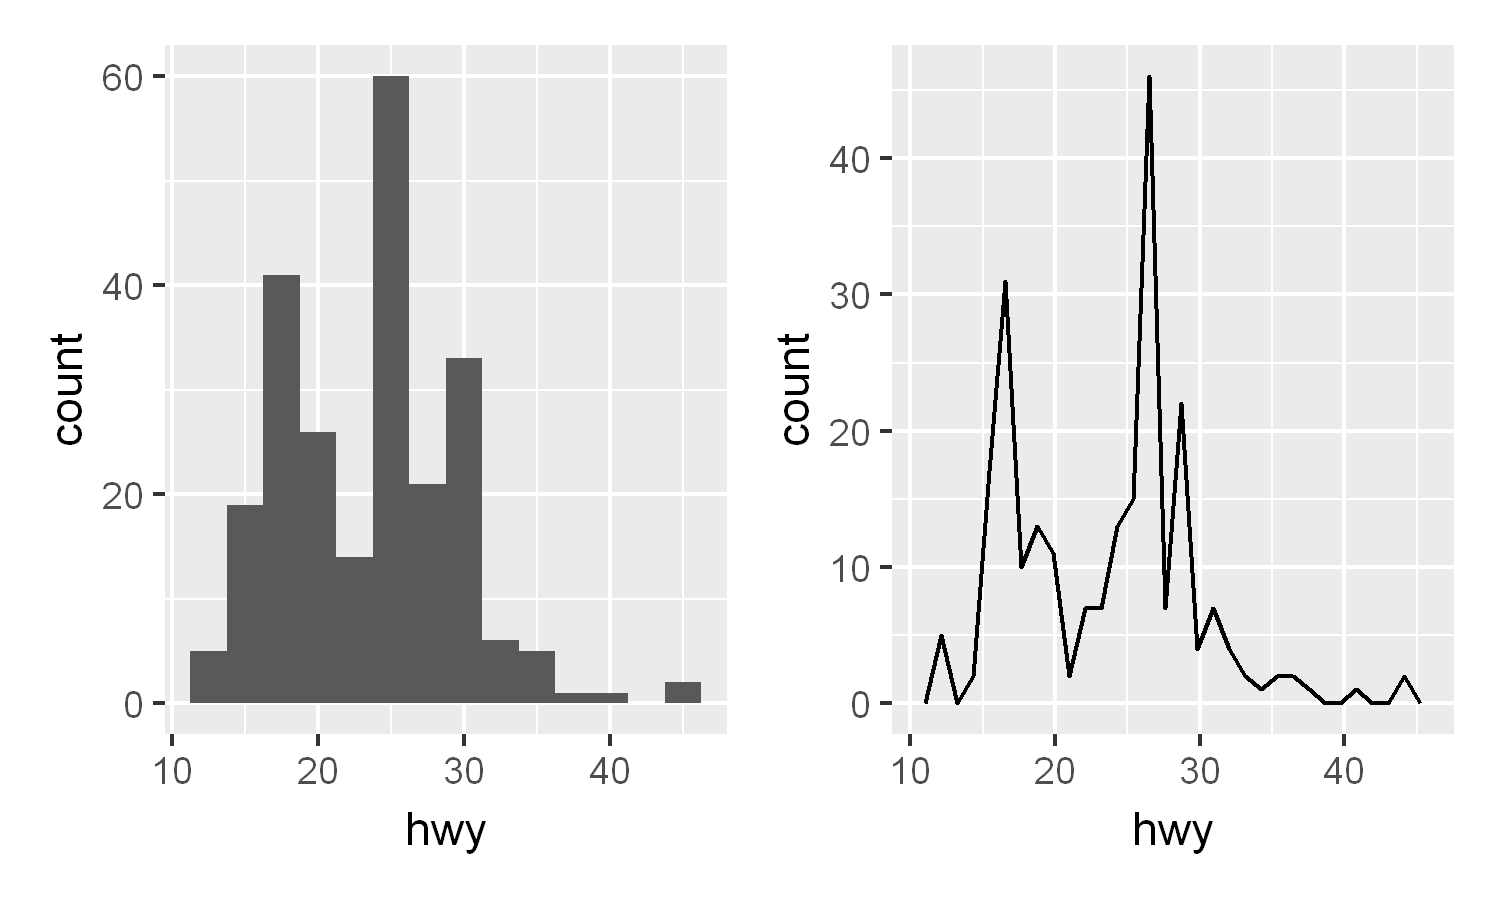

In [18]:
# histo/ frequency polygons
p1 =ggplot(mpg, aes(hwy)) + geom_histogram(binwidth=2.5)
p2 = ggplot(mpg, aes(hwy)) + geom_freqpoly()
p1+p2

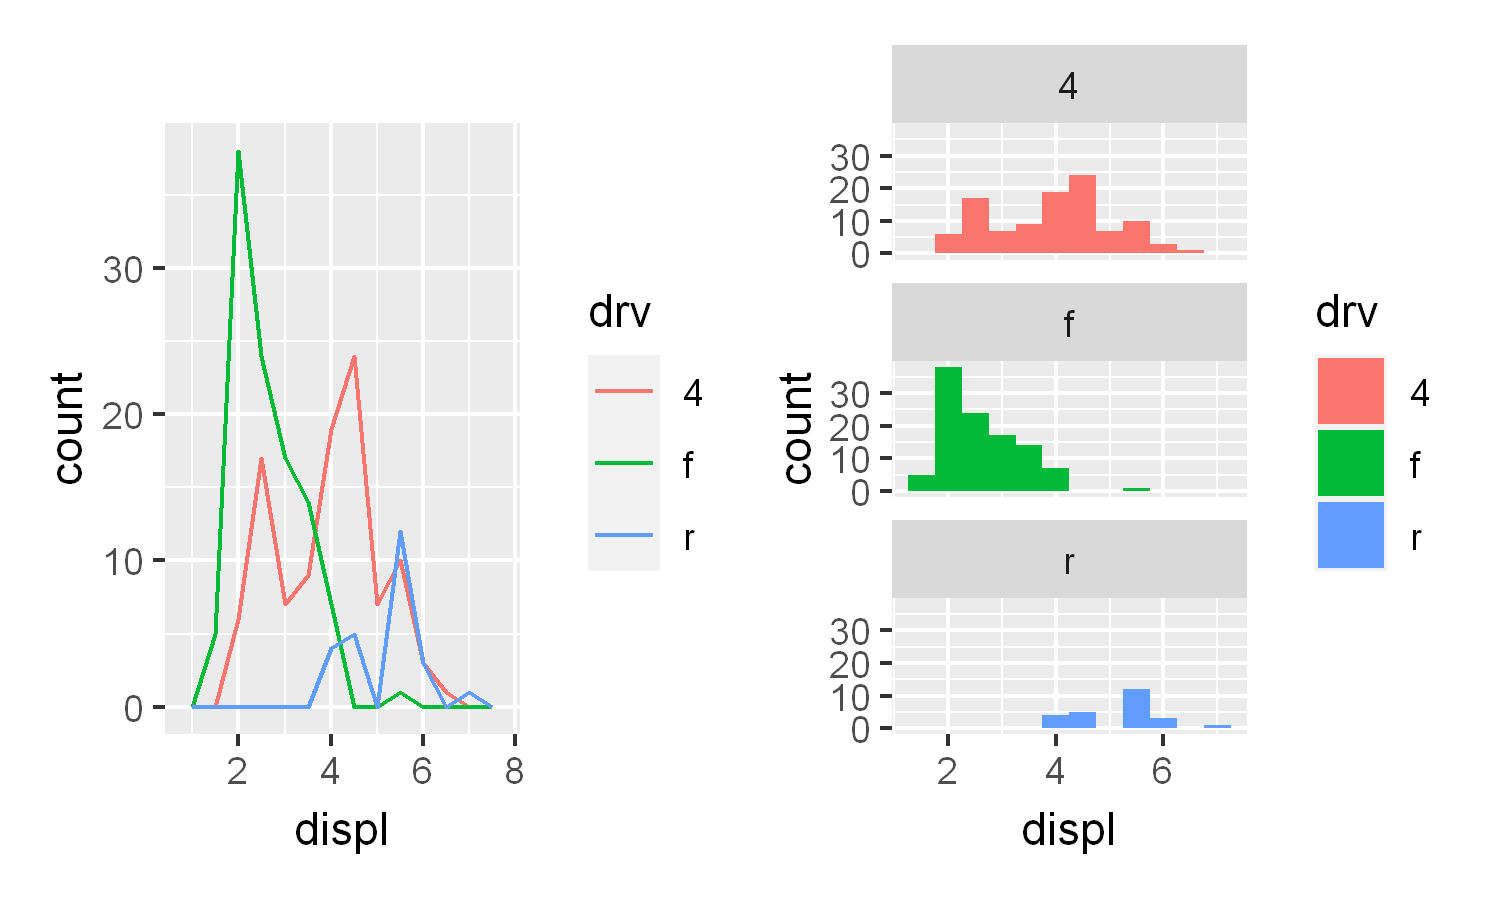

In [19]:
p1 = ggplot(mpg, aes(displ, colour = drv)) +
    geom_freqpoly(binwidth = 0.5)
p2 = ggplot(mpg, aes(displ, fill = drv)) +
    geom_histogram(binwidth = 0.5) +
    facet_wrap(~drv, ncol = 1)
p1+p2

In [20]:
# ggplot(drugs, aes(drug, effect)) + geom_bar(stat = "identity")

Time series with lineplot

    join points from left to right
    
    sorted by value in x-axis(usually time)
#### VS

Time series with pathplot
    
    in order of appearance in dataset
    
    show how 2 variables simultaneously change over time

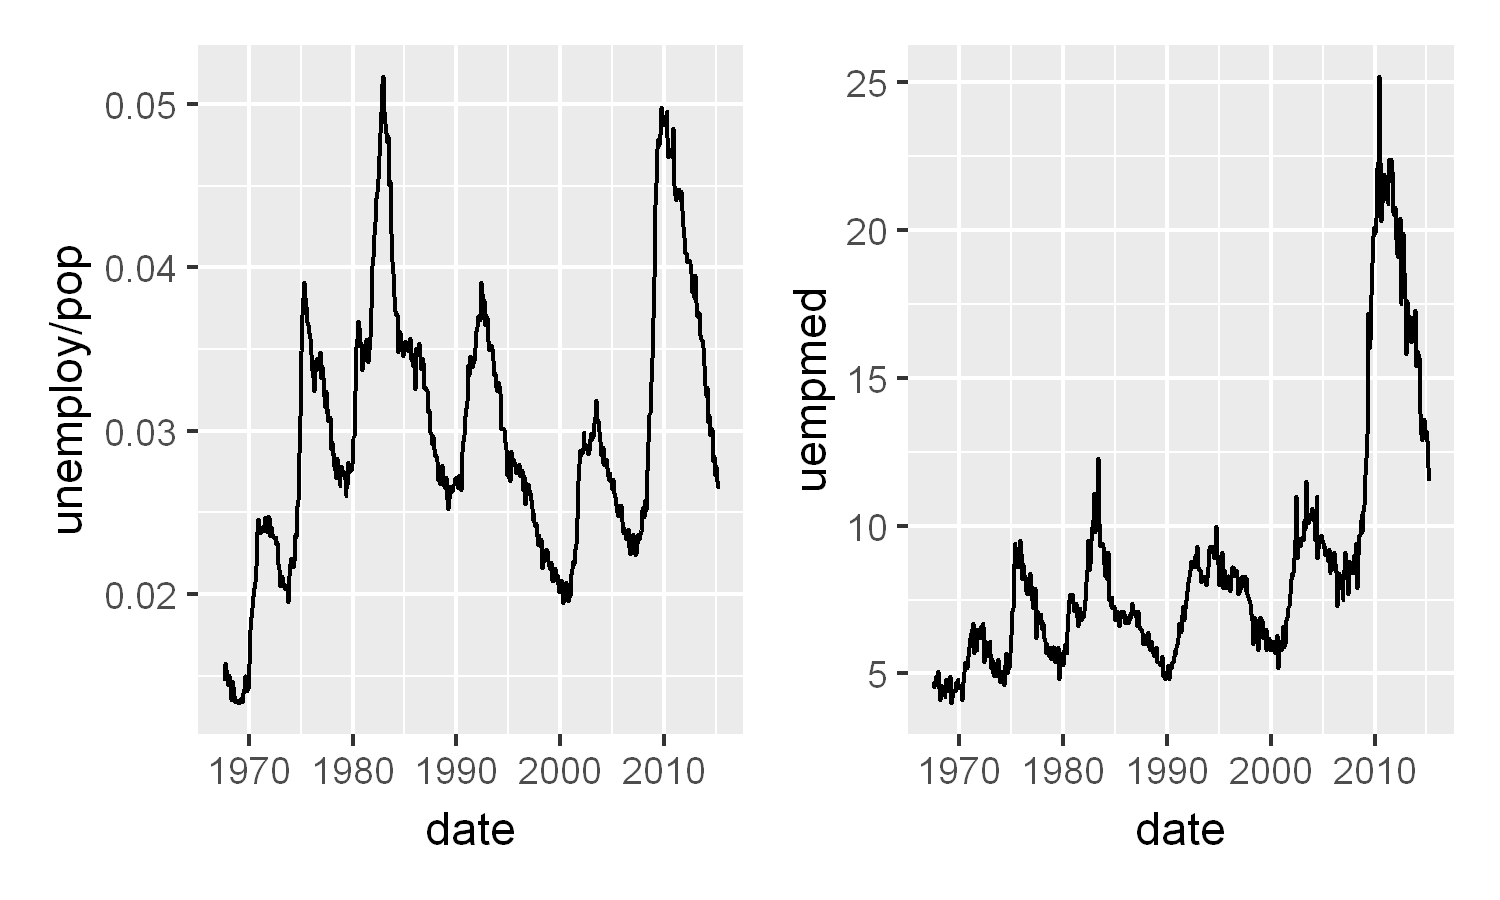

In [21]:
# multiple peaks 
# showing unemployment rate
p1 = ggplot(economics, aes(date, unemploy / pop)) + 
    geom_line()
# median no of weeks unemployed as lineplot sort by time
p2 = ggplot(economics, aes(date, uempmed)) + 
    geom_line()
p1+p2
# Percentage lower than previous peak, but length is high

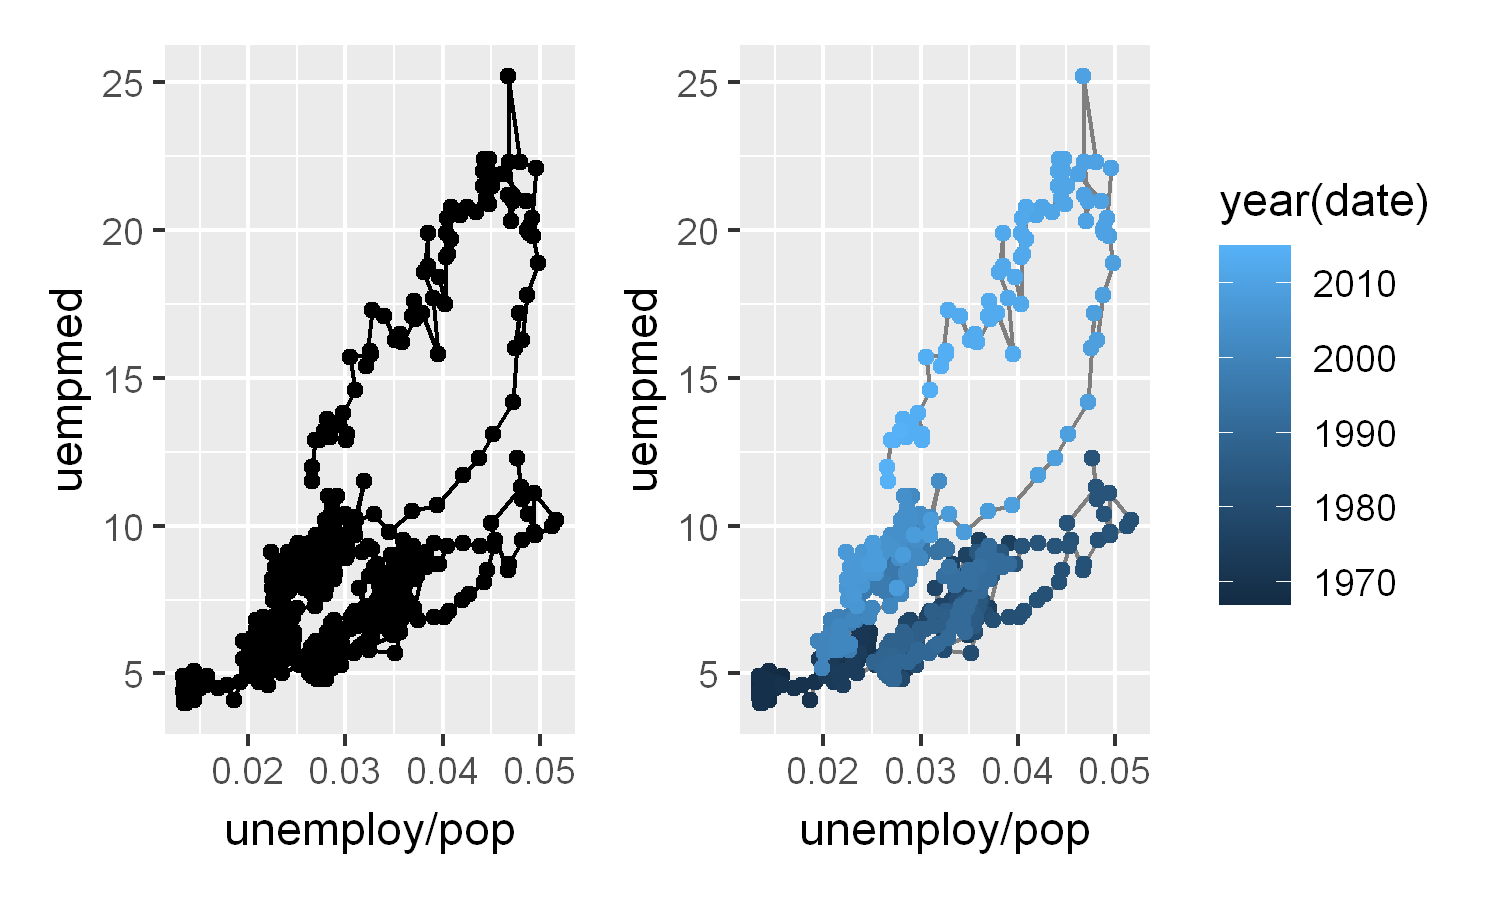

In [22]:
# unemployment rate verses length of unemployment 
# x/total against x 
p1=ggplot(economics, aes(unemploy / pop, uempmed)) +
    geom_path() +
    geom_point()
year <- function(x) as.POSIXlt(x)$year + 1900
p2 = ggplot(economics, aes(unemploy / pop, uempmed)) +
    geom_path(colour = "grey50") +
    geom_point(aes(colour = year(date))) #coloring showing direction in time
p1+p2

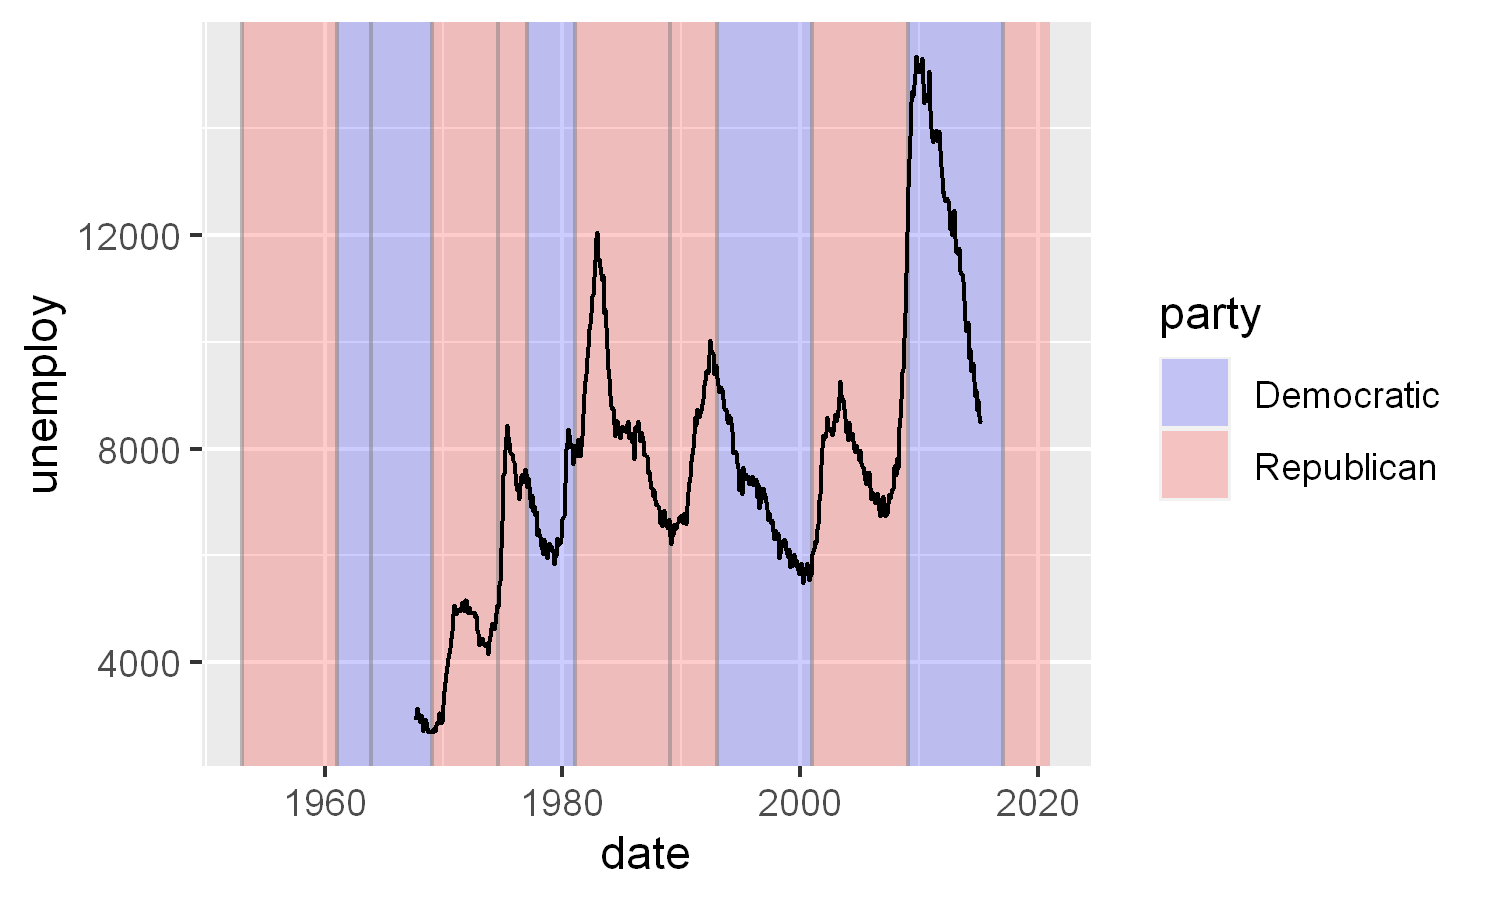

In [23]:
ggplot(economics) +
    geom_rect(
        aes(xmin = start, xmax = end, fill = party),
        ymin = -Inf, ymax = Inf, alpha = 0.2,
        data = presidential
    ) +
    geom_vline(
        aes(xintercept = as.numeric(start)),
        data = presidential,
        colour = "grey50", alpha = 0.5
    ) +
    # geom_text(aes(x = start, y = 2500, label = name),
        # data = presidential,
        # size = 5, vjust = 0, hjust = 0, nudge_x = 50
    # ) +
    geom_line(aes(date, unemploy)) +
        scale_fill_manual(values = c("blue", "red"))

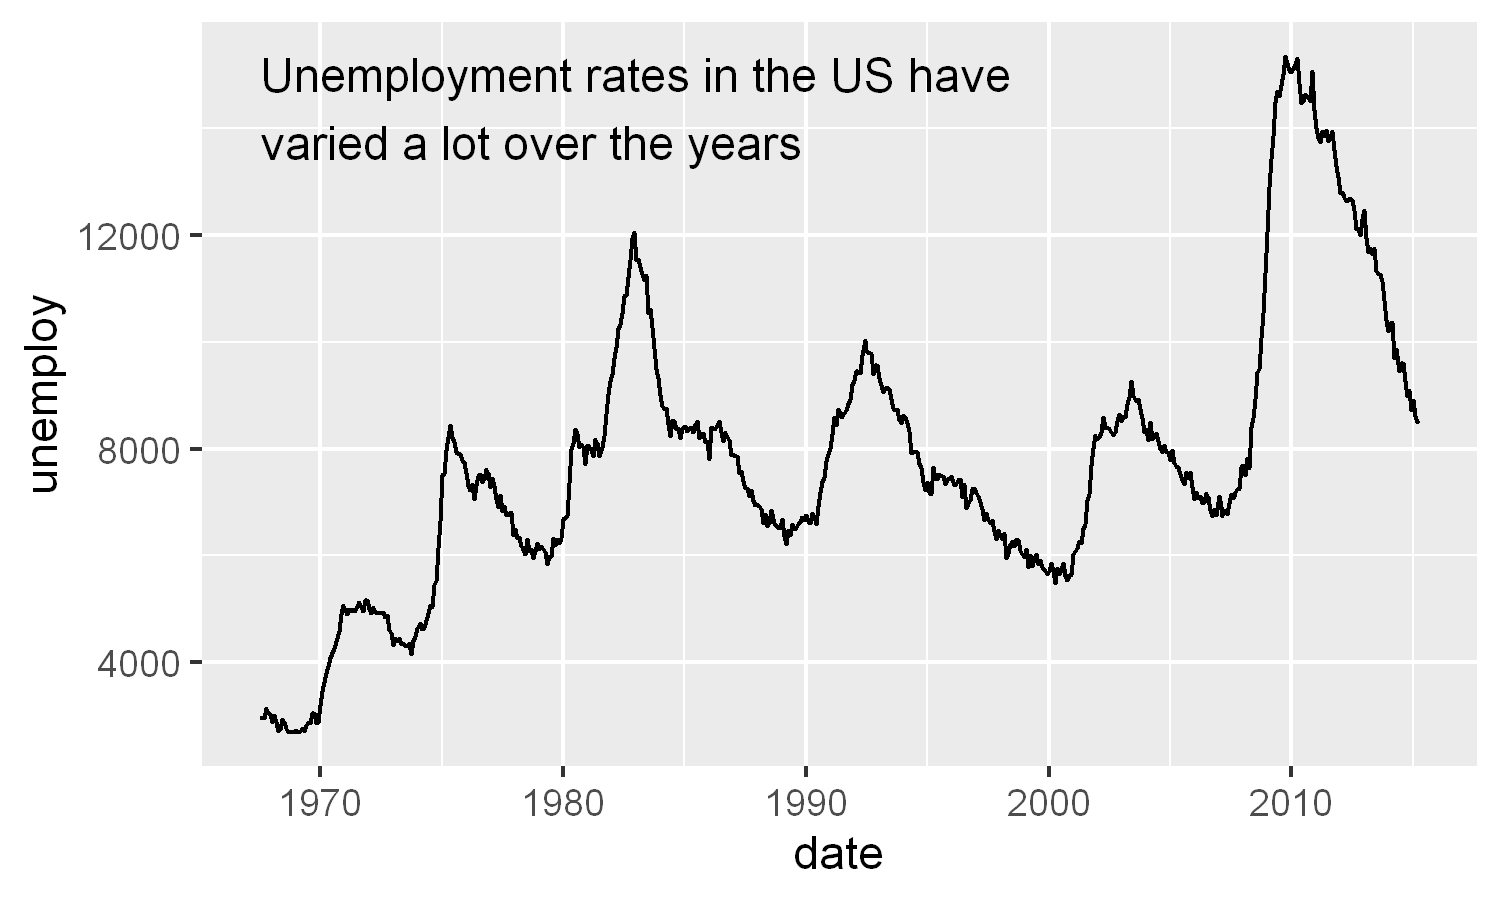

In [24]:
yrng <- range(economics$unemploy)
xrng <- range(economics$date)
caption <- paste(strwrap("Unemployment rates in the US have
varied a lot over the years", 40), collapse = "\n")

ggplot(economics, aes(date, unemploy)) +
geom_line() +
annotate("text", x = xrng[1], y = yrng[2], label = caption,
hjust = 0, vjust = 1, size = 4
)

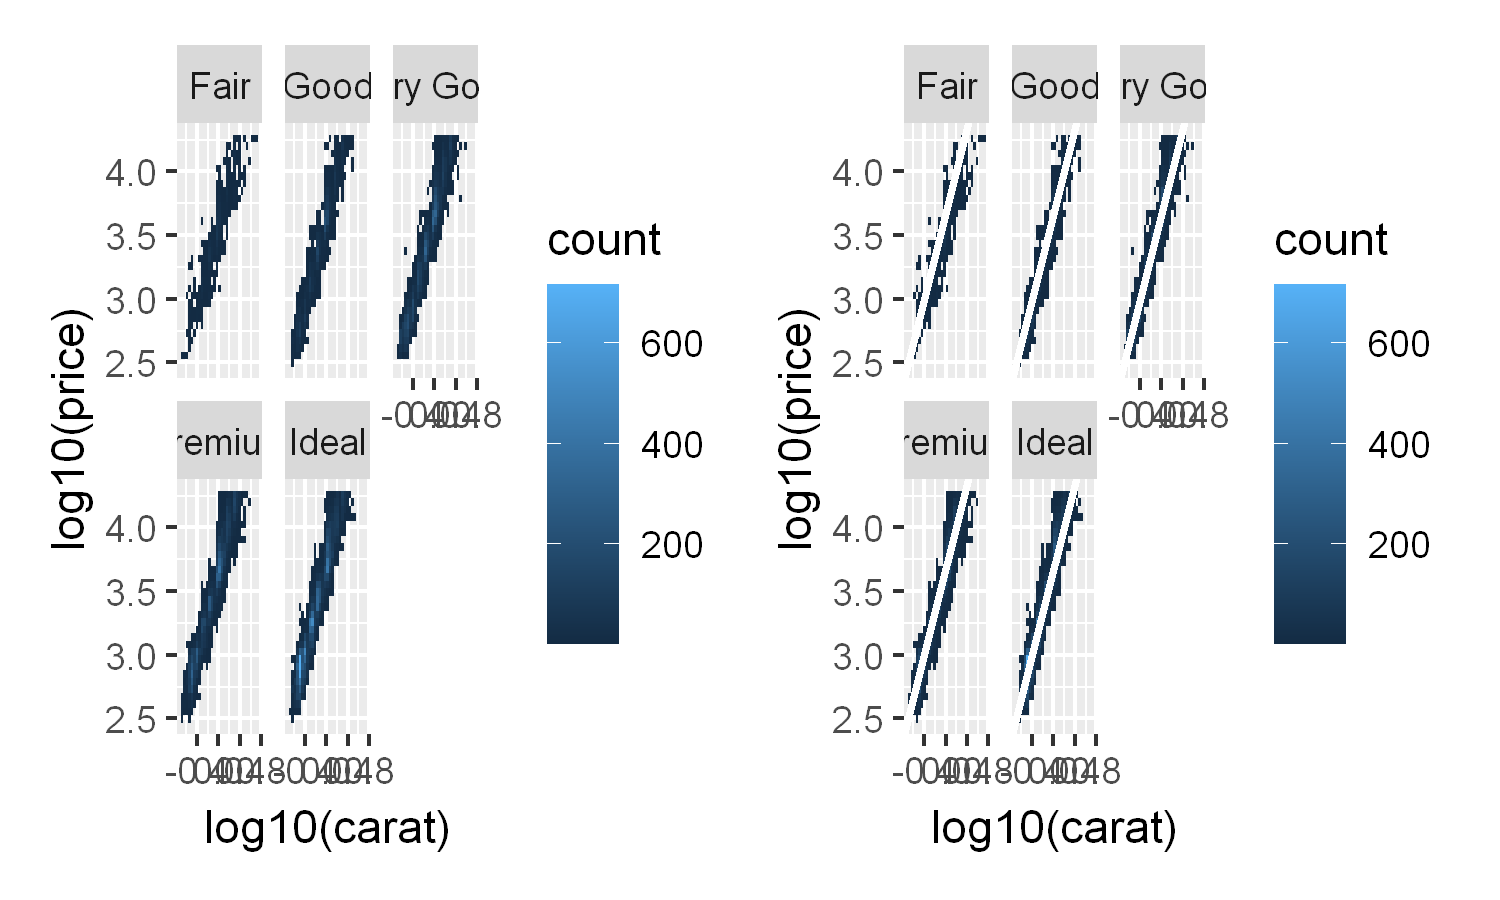

In [25]:
p1 = ggplot(diamonds, aes(log10(carat), log10(price))) +
geom_bin2d() +
facet_wrap(~cut, nrow = 2)

# reference lines
mod_coef <- coef(lm(log10(price) ~ log10(carat), data = diamonds))
p2 = ggplot(diamonds, aes(log10(carat), log10(price))) +
    geom_bin2d() +
    geom_abline(intercept = mod_coef[1], slope = mod_coef[2],
        colour = "white", size = 1) +
    facet_wrap(~cut, nrow = 2)
p1+p2

## groups
Grouping controls both the display of the geoms, and the operation of the stats: one statistical transformation is run for each group

set grouping in geom_line() so it applies only to the lines

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


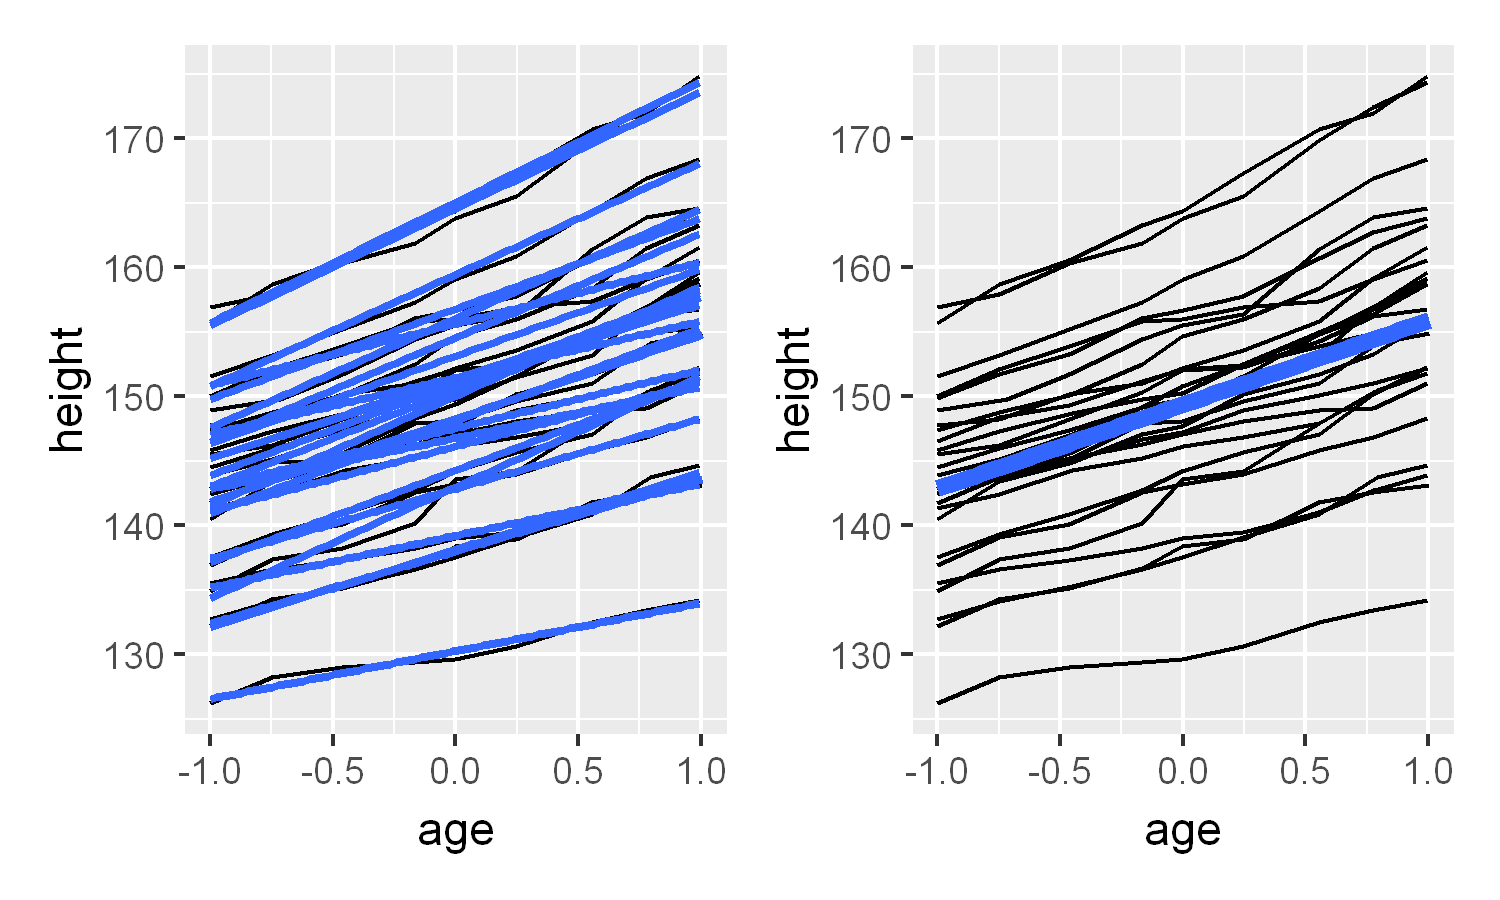

In [26]:
# Multiple groups, one aesthetic
data(Oxboys, package = "nlme")

p1 = ggplot(Oxboys, aes(age, height, group = Subject))+geom_line() +geom_smooth(method = "lm", se = FALSE)
p2 = ggplot(Oxboys, aes(age, height)) +
    geom_line(aes(group = Subject)) +
    geom_smooth(method = "lm", size = 2, se = FALSE)
p1+p2

Override default group

    overlay lines that connect each

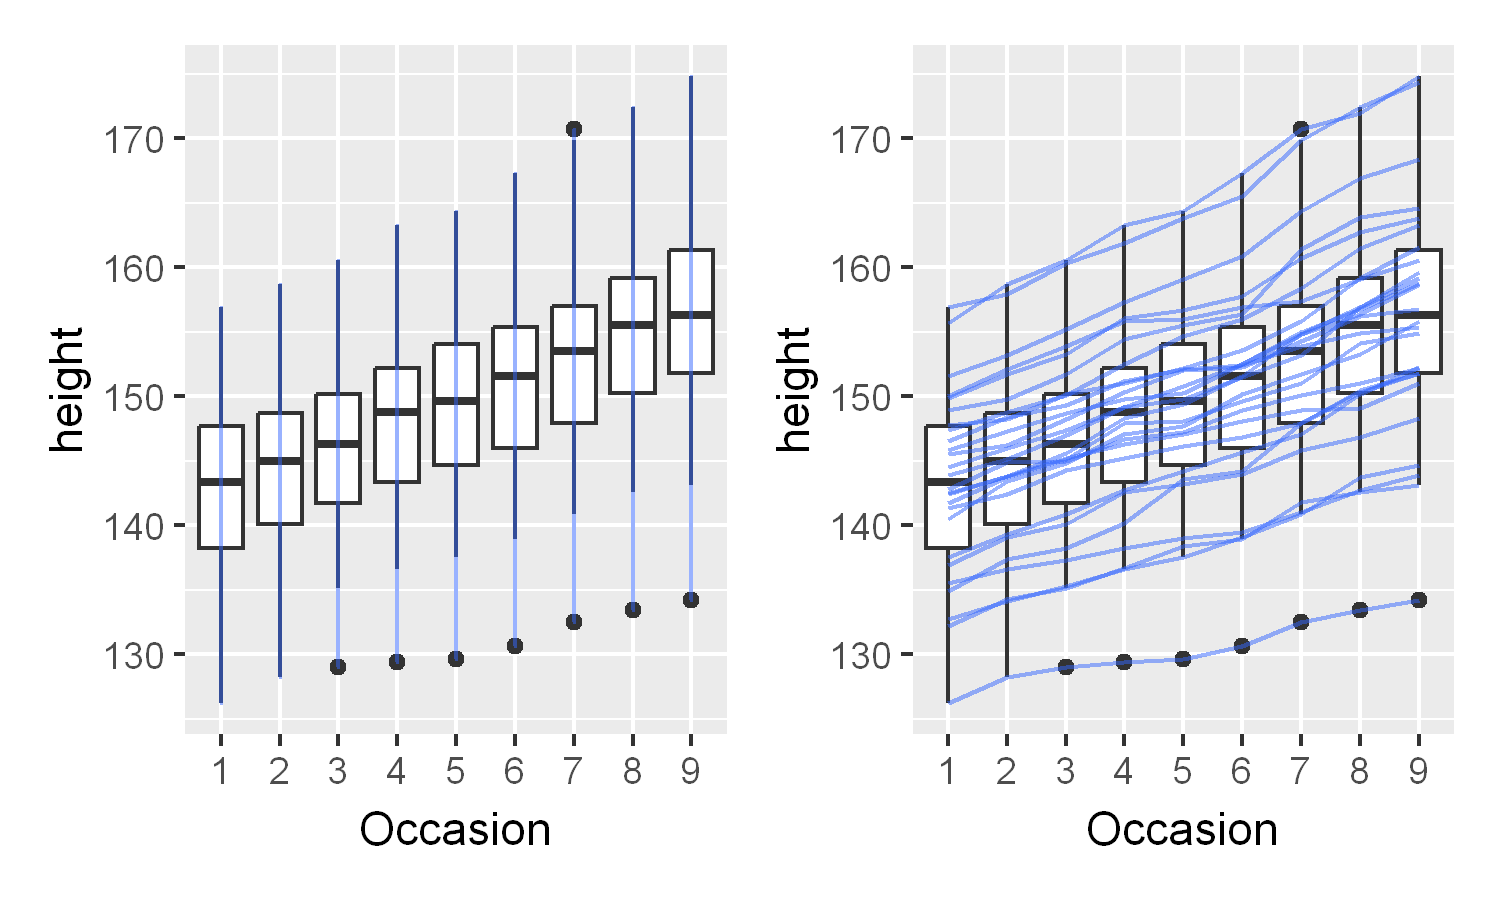

In [27]:
p1 = ggplot(Oxboys, aes(Occasion, height)) +geom_boxplot() +geom_line(colour = "#3366FF", alpha = 0.5)
p2 = ggplot(Oxboys, aes(Occasion, height)) + # one line per boy
    geom_boxplot() +
    geom_line(aes(group = Subject), colour = "#3366FF", alpha = 0.5)
p1+p2

## Matching aesthetics to graphic objects

Contour

Warning message:
"The dot-dot notation (`..level..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(level)` instead."


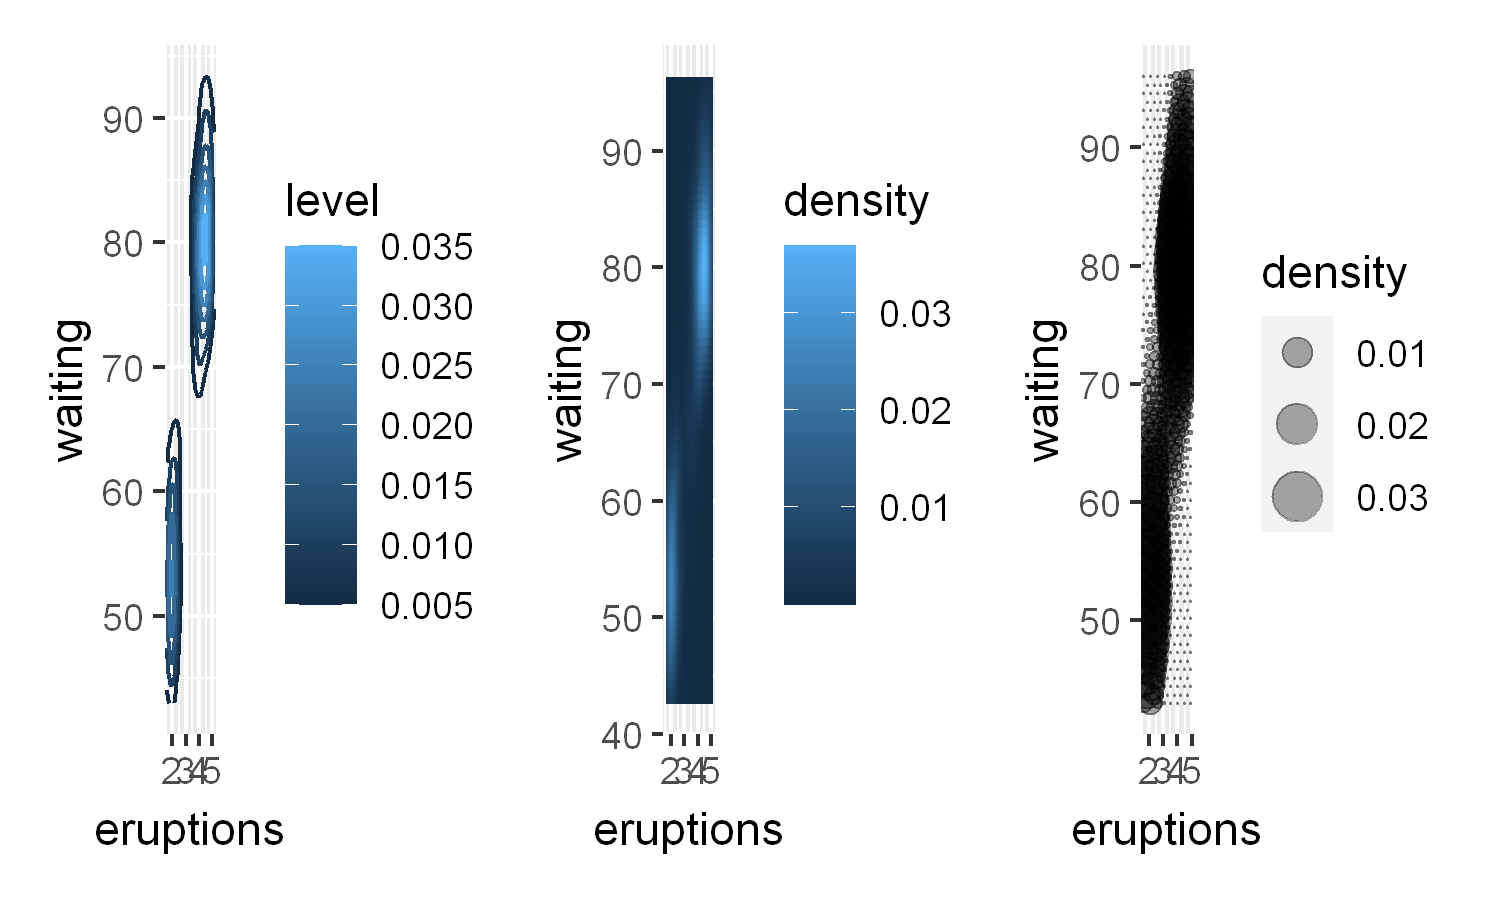

In [29]:
p1=ggplot(faithfuld, aes(eruptions, waiting)) +
    geom_contour(aes(z = density, colour = ..level..))
p2=ggplot(faithfuld, aes(eruptions, waiting)) +
    geom_raster(aes(fill = density))
small <- faithfuld[seq(1, nrow(faithfuld), by = 10), ]
p3=ggplot(small, aes(eruptions, waiting)) +
    geom_point(aes(size = density), alpha = 1/3) +
    scale_size_area()
p1+p2+p3

map 

    P60

# Aes
xlab/ ylab

xlim('f','r'), ylim(NA, 30) # only one limit

save a plot, then print plot later

    print(ggplot)


# Labels & annotation
text label alternative to legend
ggforce::geom_mark_ellipse(aes(label = cyl, group = cyl))


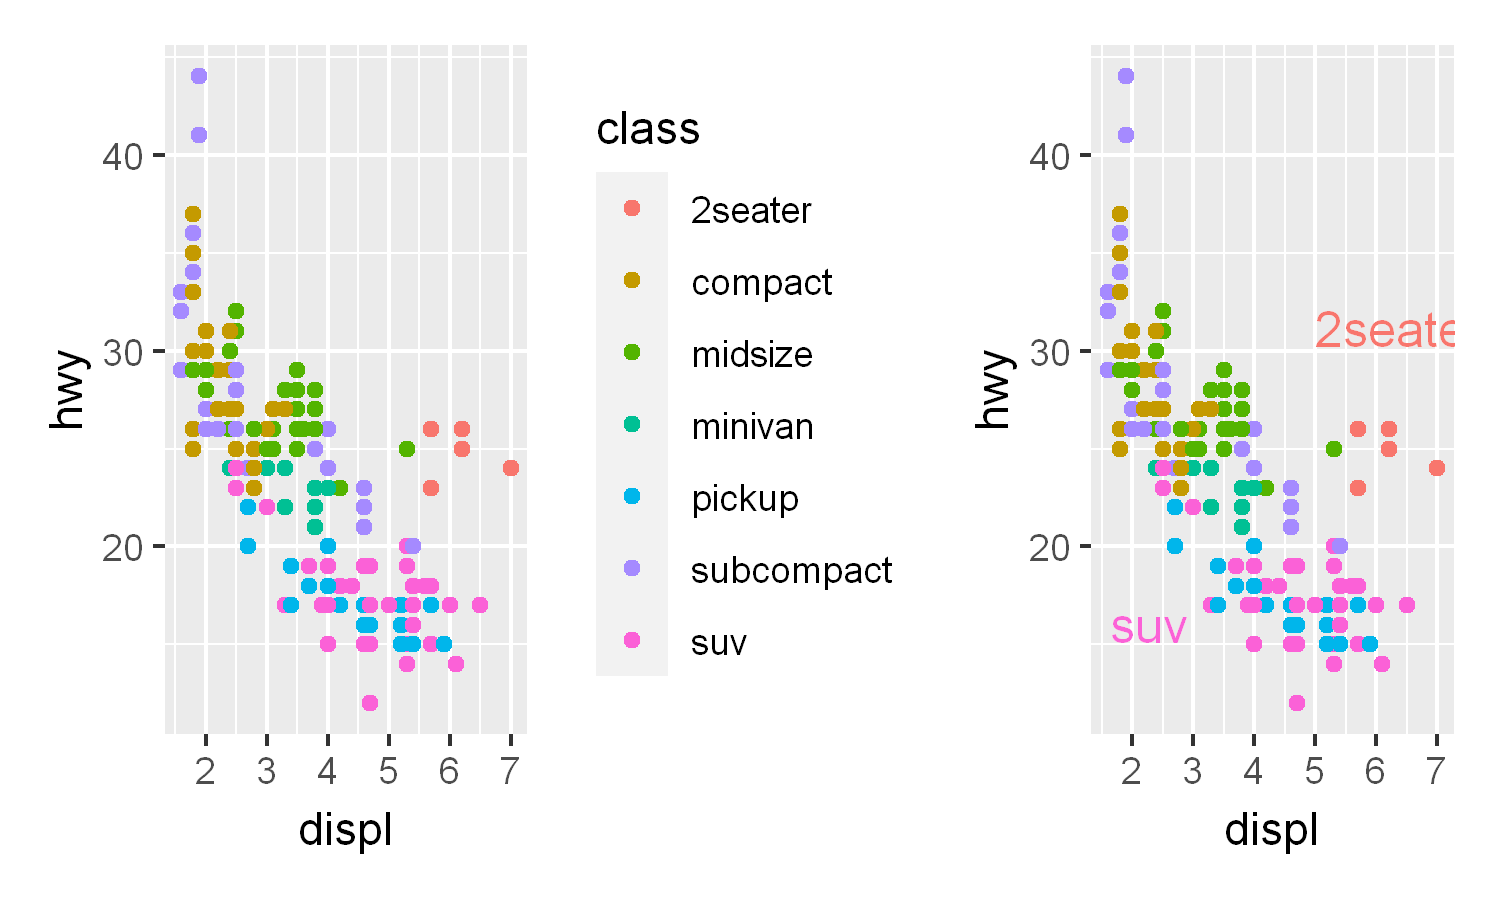

In [31]:
p1 = ggplot(mpg, aes(displ, hwy, colour = class)) +
    geom_point()
p2 = ggplot(mpg, aes(displ, hwy, colour = class)) +
    geom_point(show.legend = FALSE) +
    directlabels::geom_dl(aes(label = class), method = "smart.grid")
p1+p2

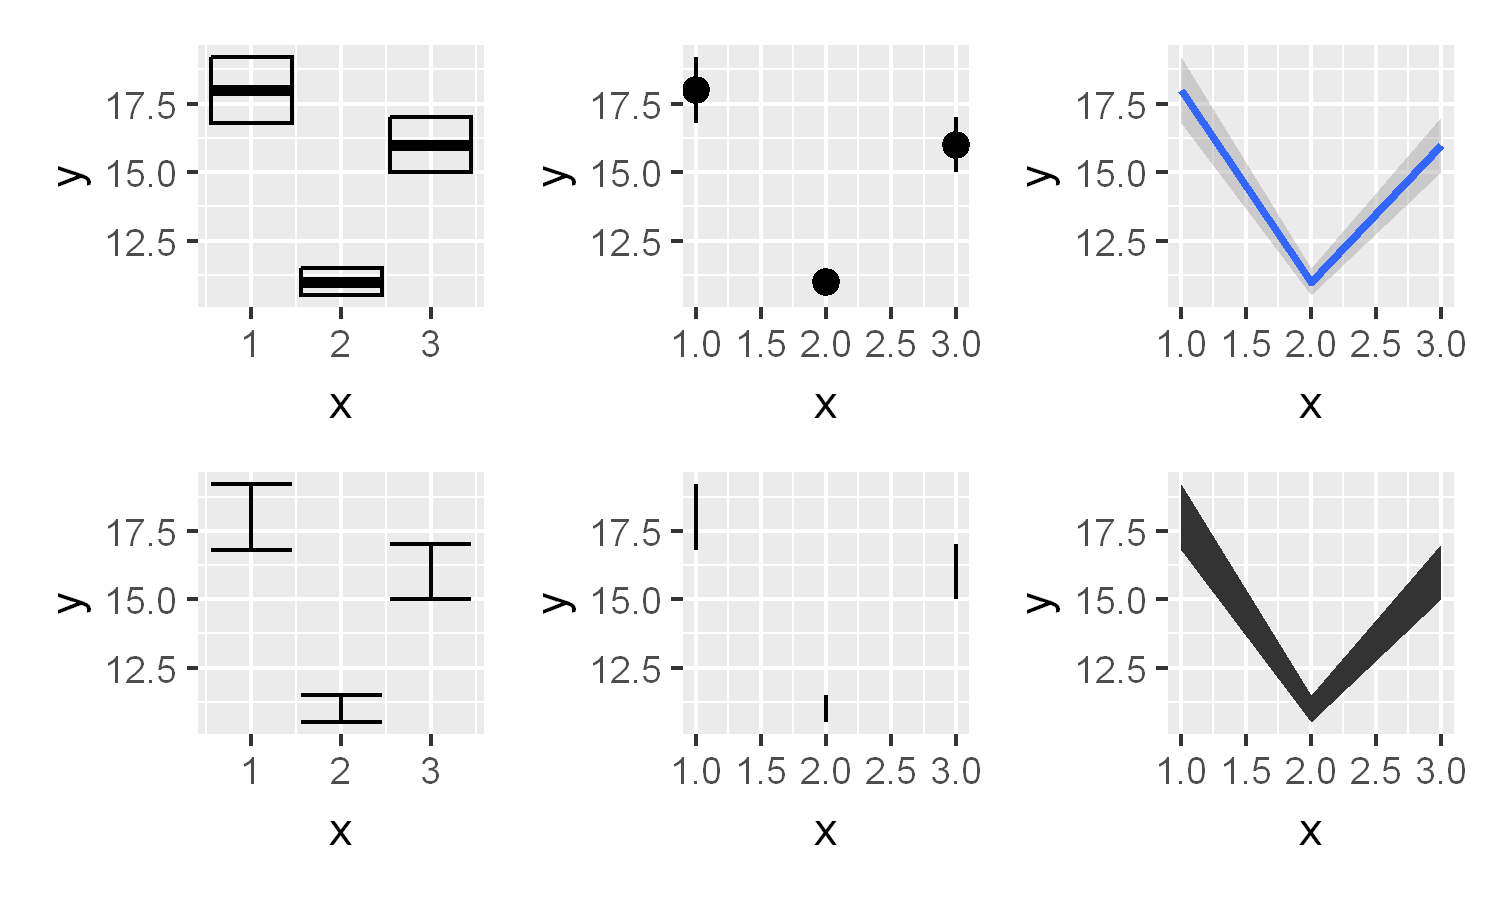

In [32]:
y <- c(18, 11, 16)
df <- data.frame(x = 1:3, y = y, se = c(1.2, 0.5, 1.0))
base <- ggplot(df, aes(x, y, ymin = y - se, ymax = y + se))
base + geom_crossbar()+ # discrete x, range and center
    base + geom_pointrange() + 
    base + geom_smooth(stat = "identity") + # cts x,range & center
    base + geom_errorbar() + # discrete x, without center
    base + geom_linerange() + 
    base + geom_ribbon() # cts x, range


`geom_smooth()` using formula = 'y ~ x'


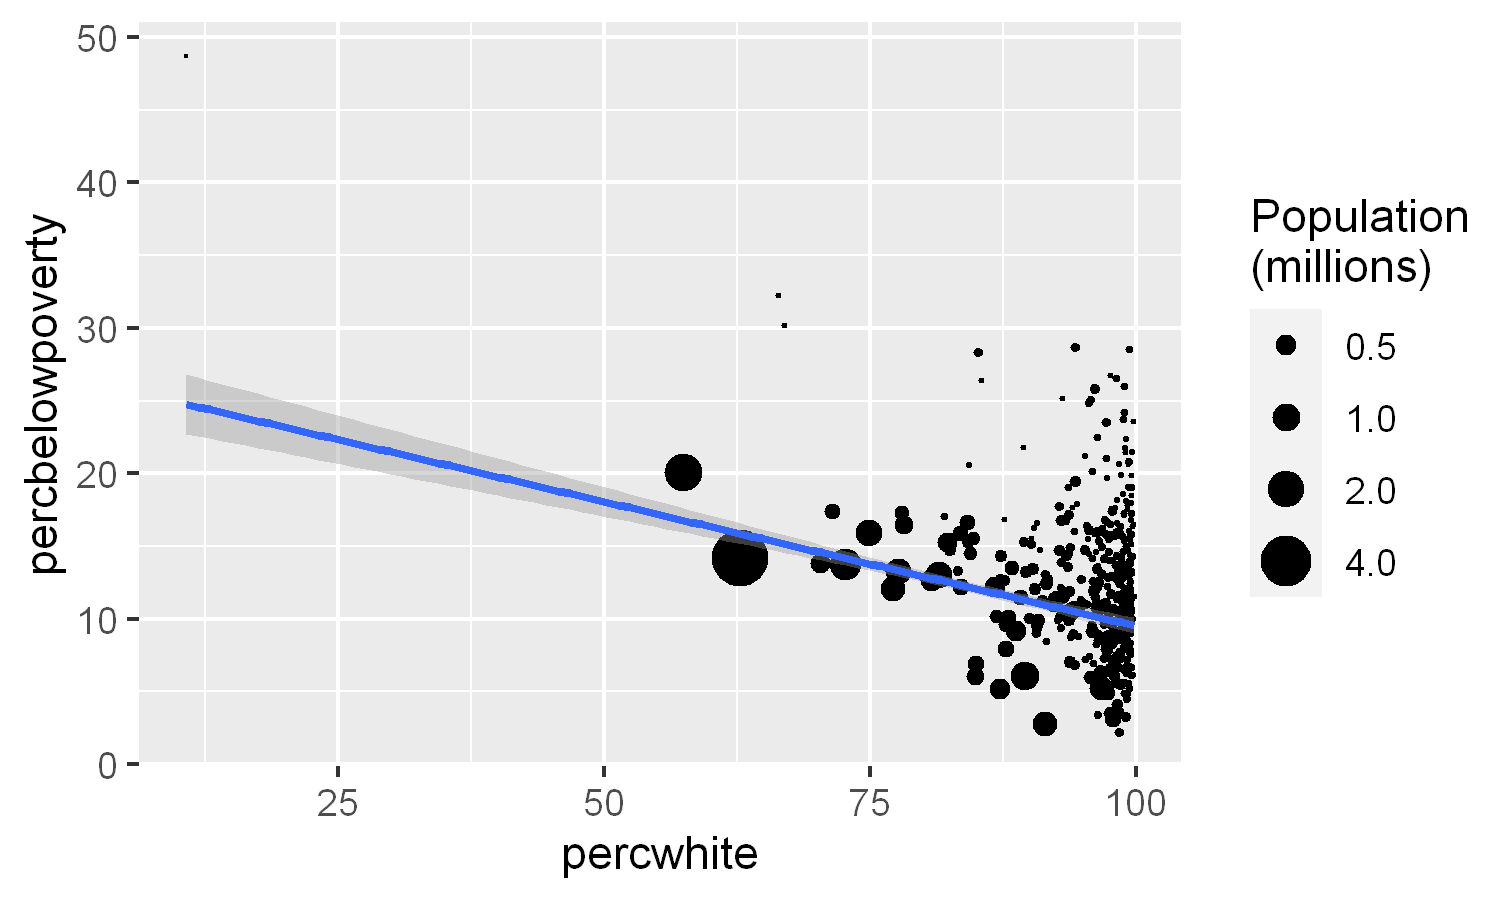

In [33]:
# Weight by population
ggplot(midwest, aes(percwhite, percbelowpoverty)) +
    geom_point(aes(size = poptotal / 1e6)) +
    geom_smooth(aes(weight = poptotal), method = lm, size = 1) +
    scale_size_area("Population\n(millions)", breaks = c(0.5, 1, 2, 4))

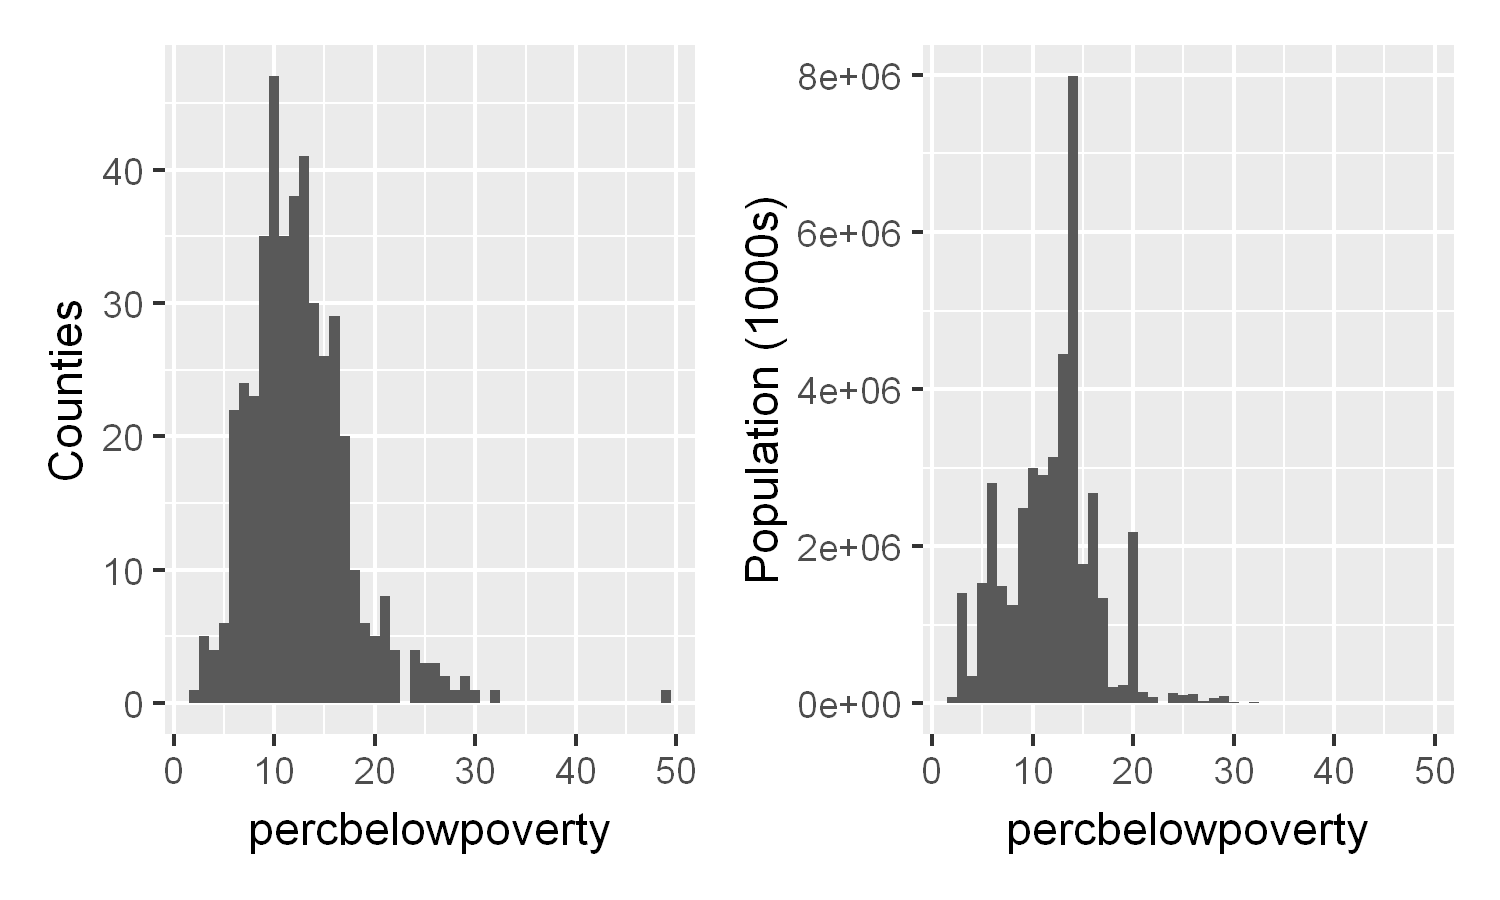

In [34]:
# change way of looking dist of no of countries to distribution of no of prople
p1 =ggplot(midwest, aes(percbelowpoverty)) +
    geom_histogram(binwidth = 1) +
    ylab("Counties")
p2=ggplot(midwest, aes(percbelowpoverty)) +
    geom_histogram(aes(weight = poptotal), binwidth = 1) +
    ylab("Population (1000s)")
p1+p2

bin-based visualisation is a density estimate.

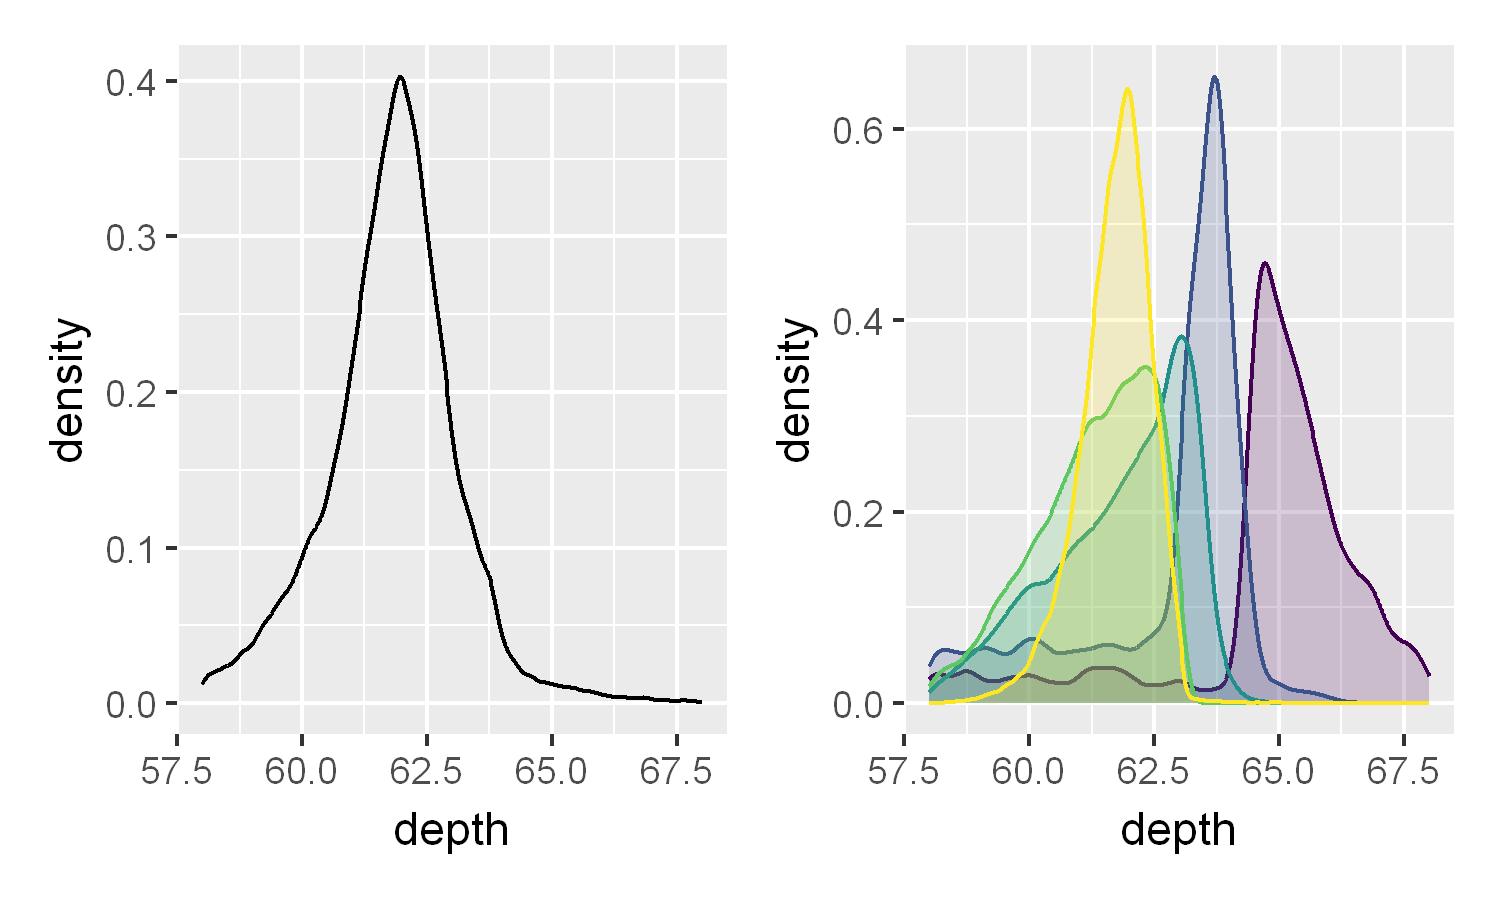

In [35]:
p1 = ggplot(diamonds, aes(depth)) +
    geom_density(na.rm = TRUE) +xlim(58, 68) +
    theme(legend.position = "none")
p2 = ggplot(diamonds, aes(depth, fill = cut, colour = cut)) +
    geom_density(alpha = 0.2, na.rm = TRUE) +
    xlim(58, 68) +
    theme(legend.position = "none")
p1+p2

Warning message:
"Removed 997 rows containing non-finite values (`stat_ydensity()`)."


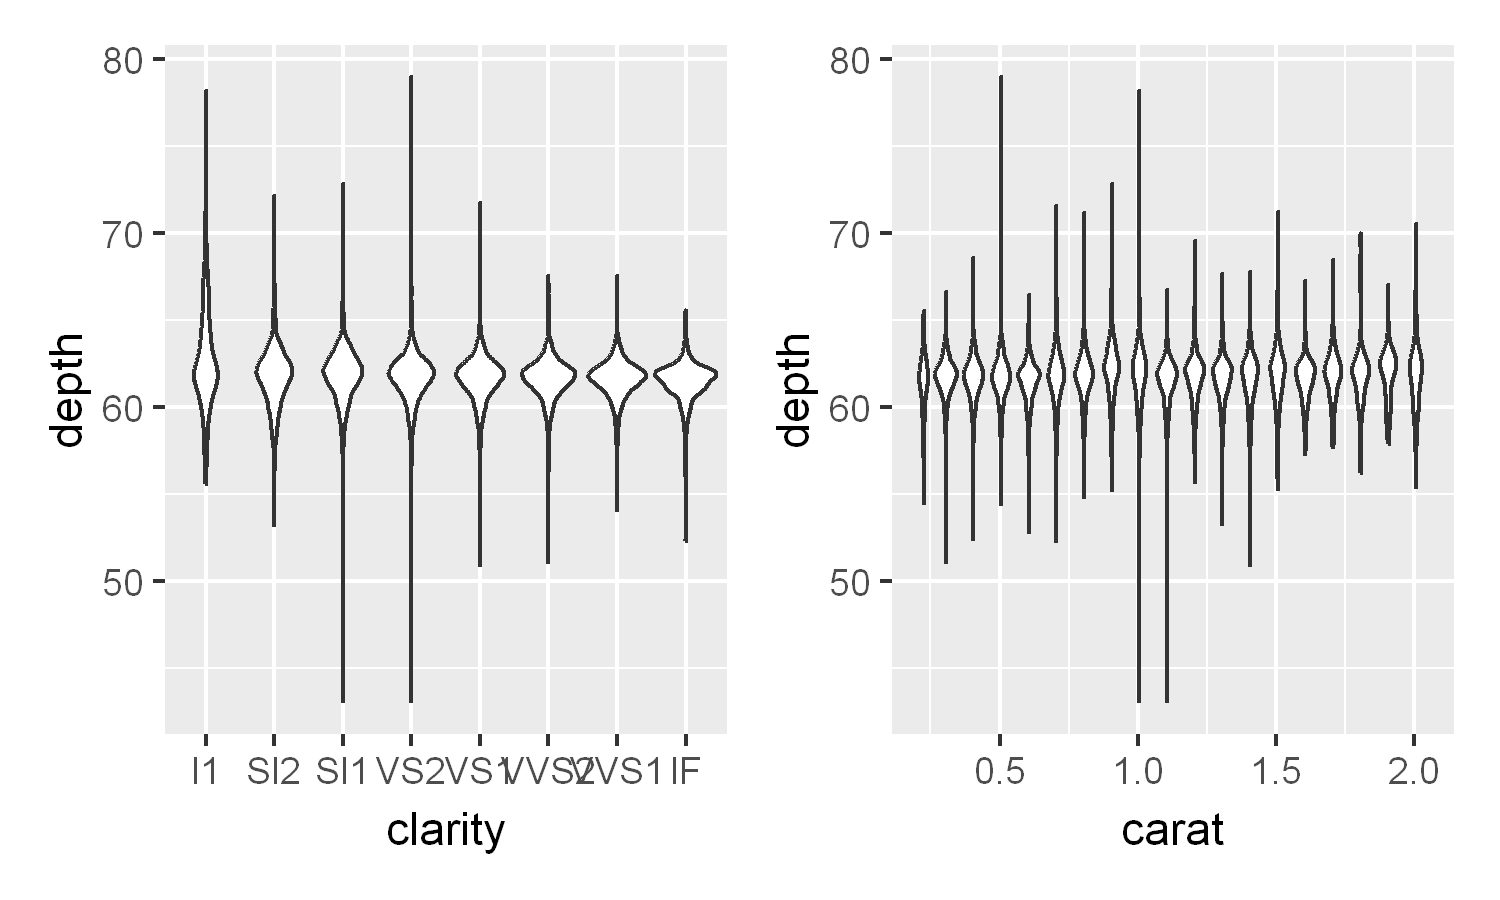

In [36]:
p1 = ggplot(diamonds, aes(clarity, depth)) + # compact version of density plot
    geom_violin()
p2= ggplot(diamonds, aes(carat, depth)) +
    geom_violin(aes(group = cut_width(carat, 0.1))) +
    xlim(NA, 2.05)
p1+p2

## Transparancy (alpha)
Larger datasets with more overplotting

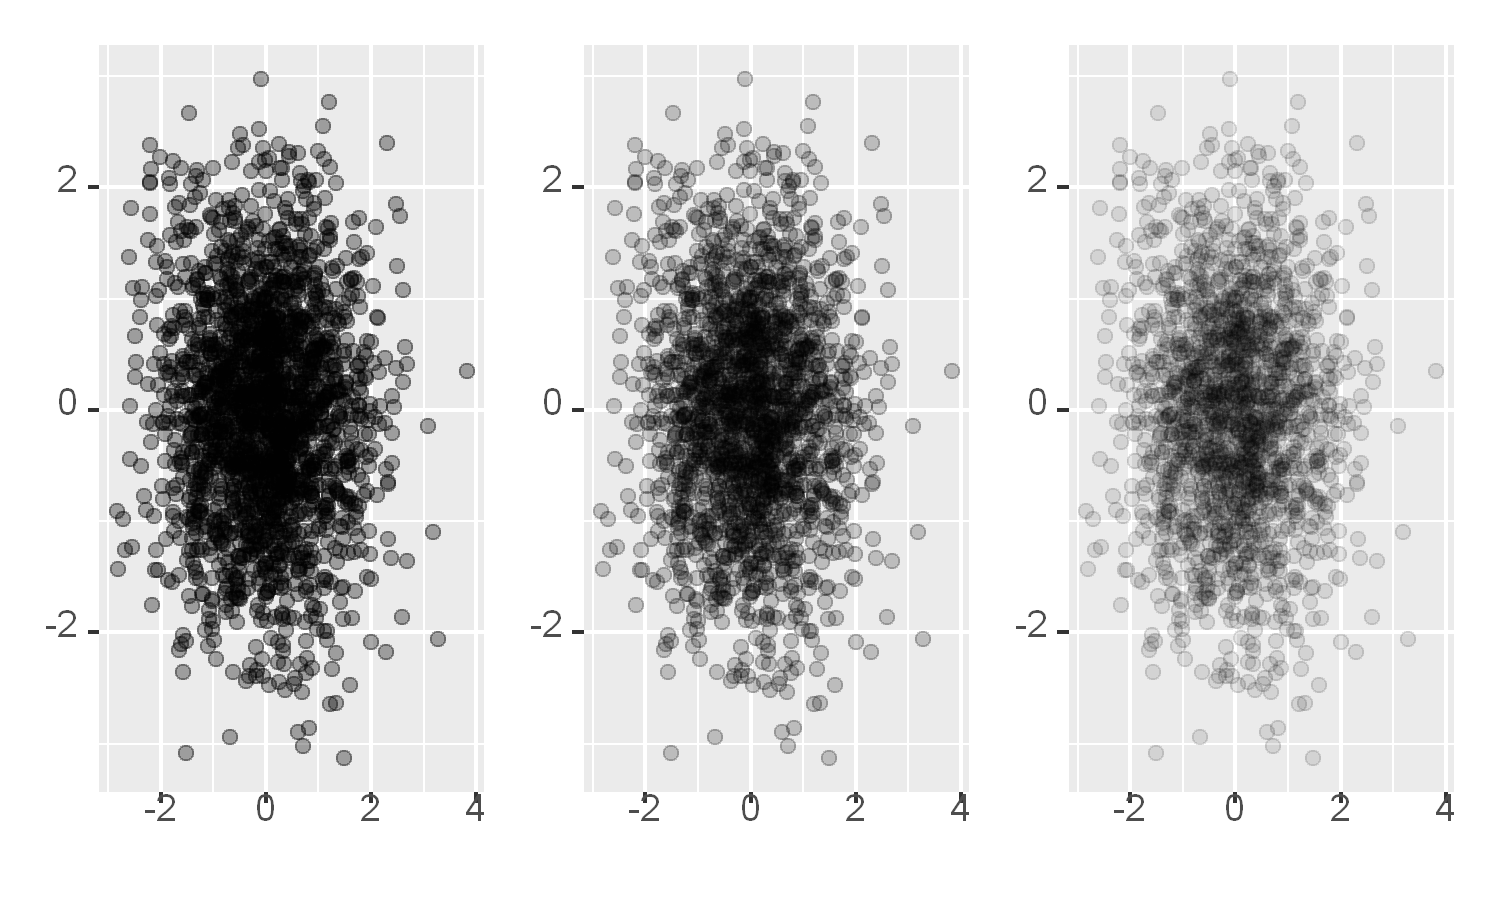

In [37]:
df <- data.frame(x = rnorm(2000), y = rnorm(2000))
norm <- ggplot(df, aes(x, y)) + xlab(NULL) + ylab(NULL)
p1 = norm + geom_point(alpha = 1 / 3)
p2 = norm + geom_point(alpha = 1 / 5)
p3 = norm + geom_point(alpha = 1 / 10)
p1+p2+p3

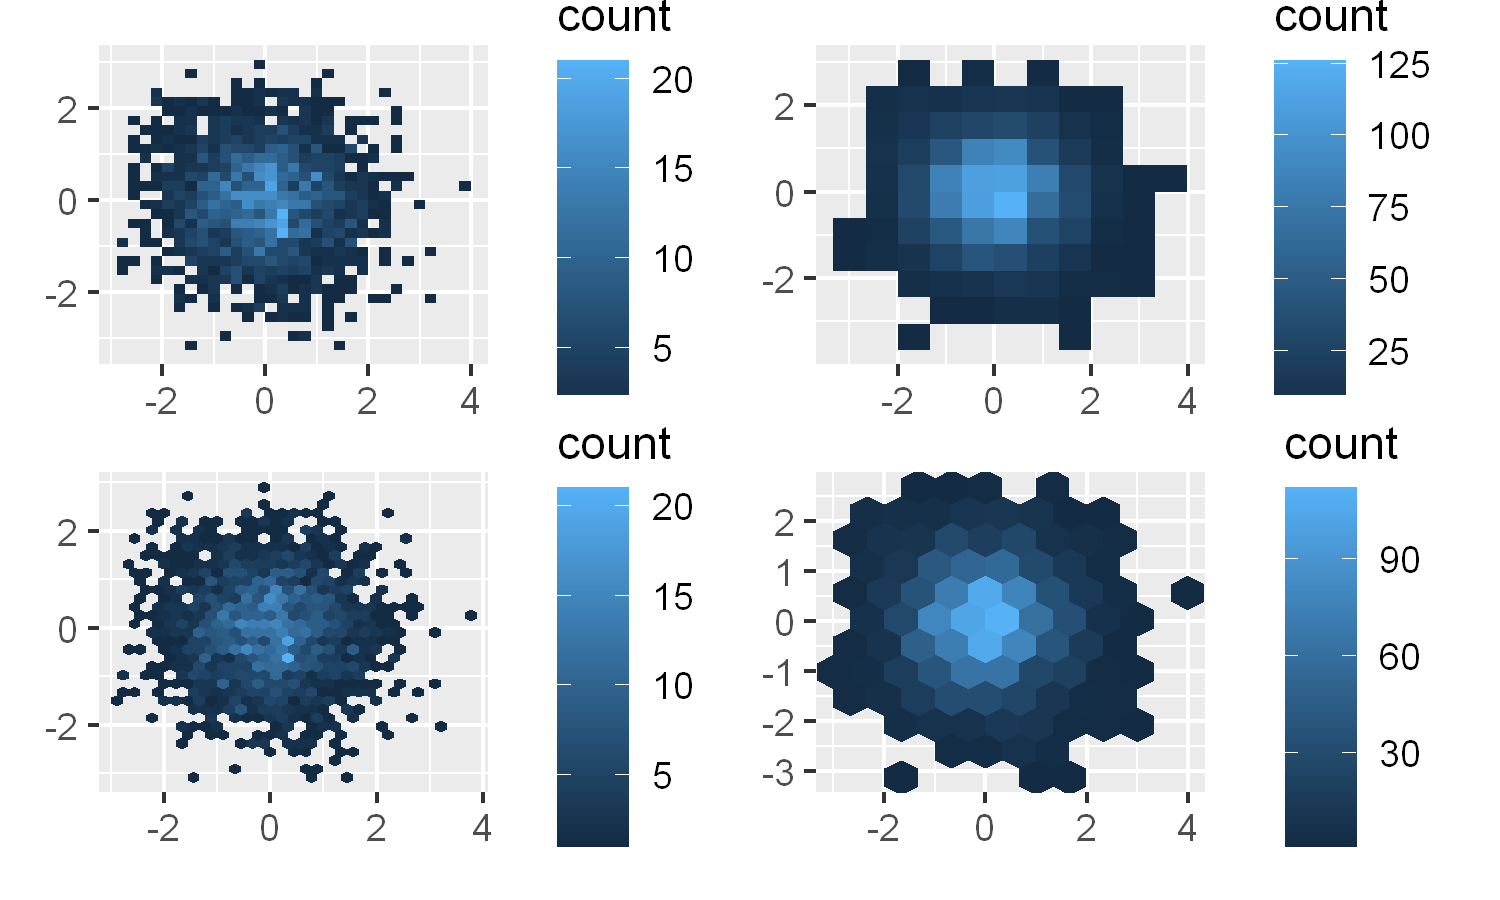

In [48]:
# Hexa_bin in the points and count the number in each bin
norm + geom_bin2d()+
norm+ geom_bin2d(bins=10)+
norm + geom_hex() + 
norm + geom_hex(bins = 10)

Warning message in geom_bar(stat = "summary_bin", fun.y = mean):
"Ignoring unknown parameters: `fun.y`"
No summary function supplied, defaulting to `mean_se()`
No summary function supplied, defaulting to `mean_se()`
No summary function supplied, defaulting to `mean_se()`
No summary function supplied, defaulting to `mean_se()`
No summary function supplied, defaulting to `mean_se()`
No summary function supplied, defaulting to `mean_se()`
No summary function supplied, defaulting to `mean_se()`
Warning message:
"Raster pixels are placed at uneven horizontal intervals and will be shifted
ℹ Consider using `geom_tile()` instead."
Warning message:
"Raster pixels are placed at uneven horizontal intervals and will be shifted
ℹ Consider using `geom_tile()` instead."


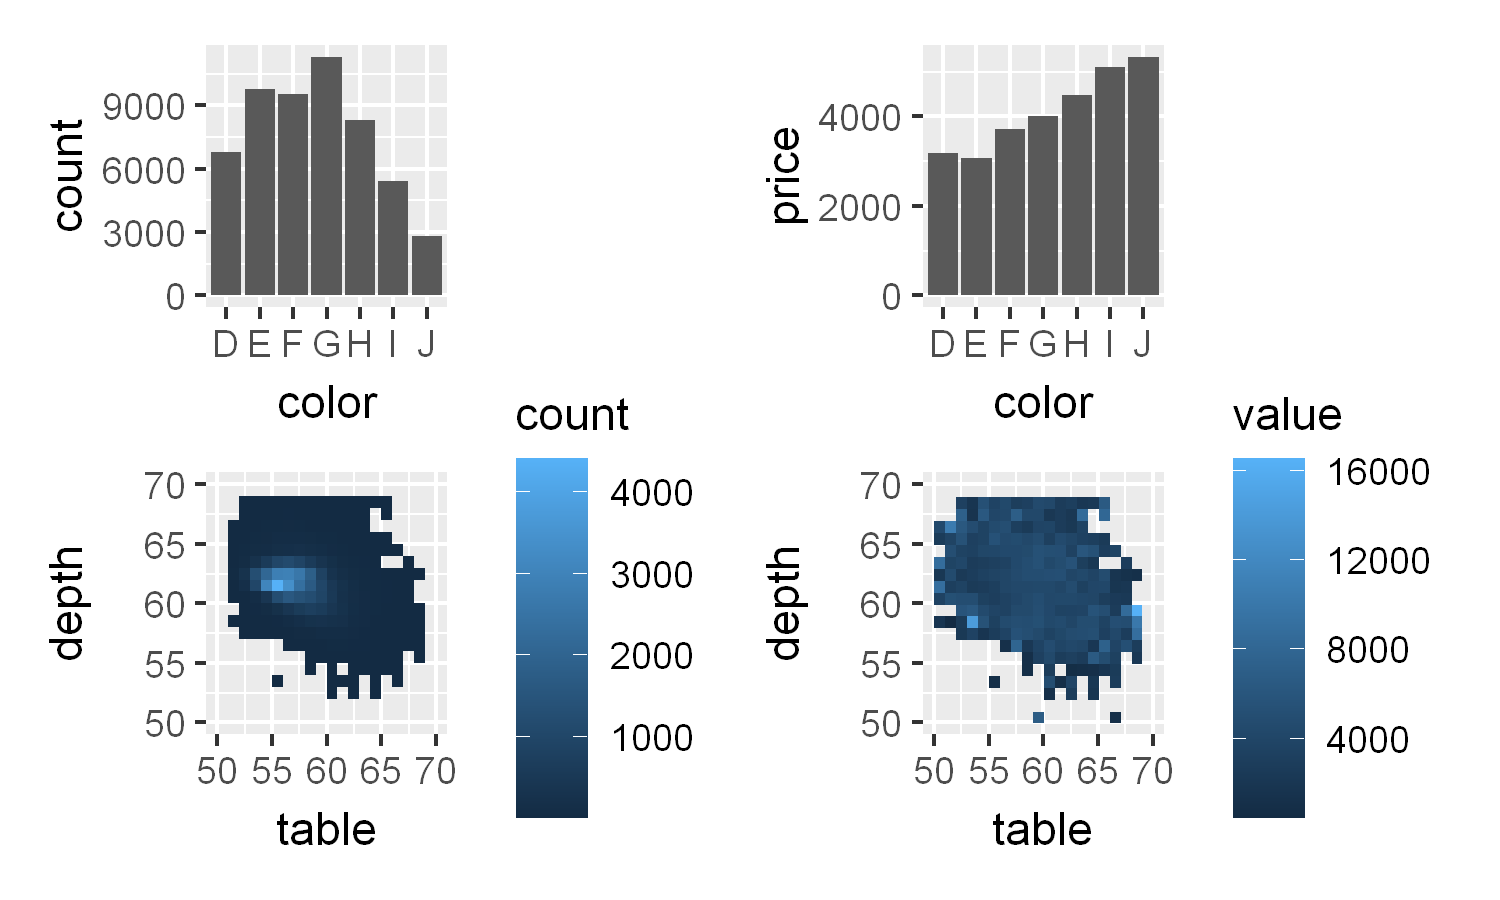

In [49]:
# summary stat inside plot( ~ mutate new col)
ggplot(diamonds, aes(color)) +
    geom_bar()+
ggplot(diamonds, aes(color, price)) +
    geom_bar(stat = "summary_bin", fun.y = mean) +
ggplot(diamonds, aes(table, depth)) +
    geom_bin2d(binwidth = 1, na.rm = TRUE) +
    xlim(50, 70) +
    ylim(50, 70)+
ggplot(diamonds, aes(table, depth, z = price)) +
    geom_raster(binwidth = 1, stat = "summary_2d", fun = mean,
    na.rm = TRUE) +
    xlim(50, 70) +
    ylim(50, 70)

## gghighlight

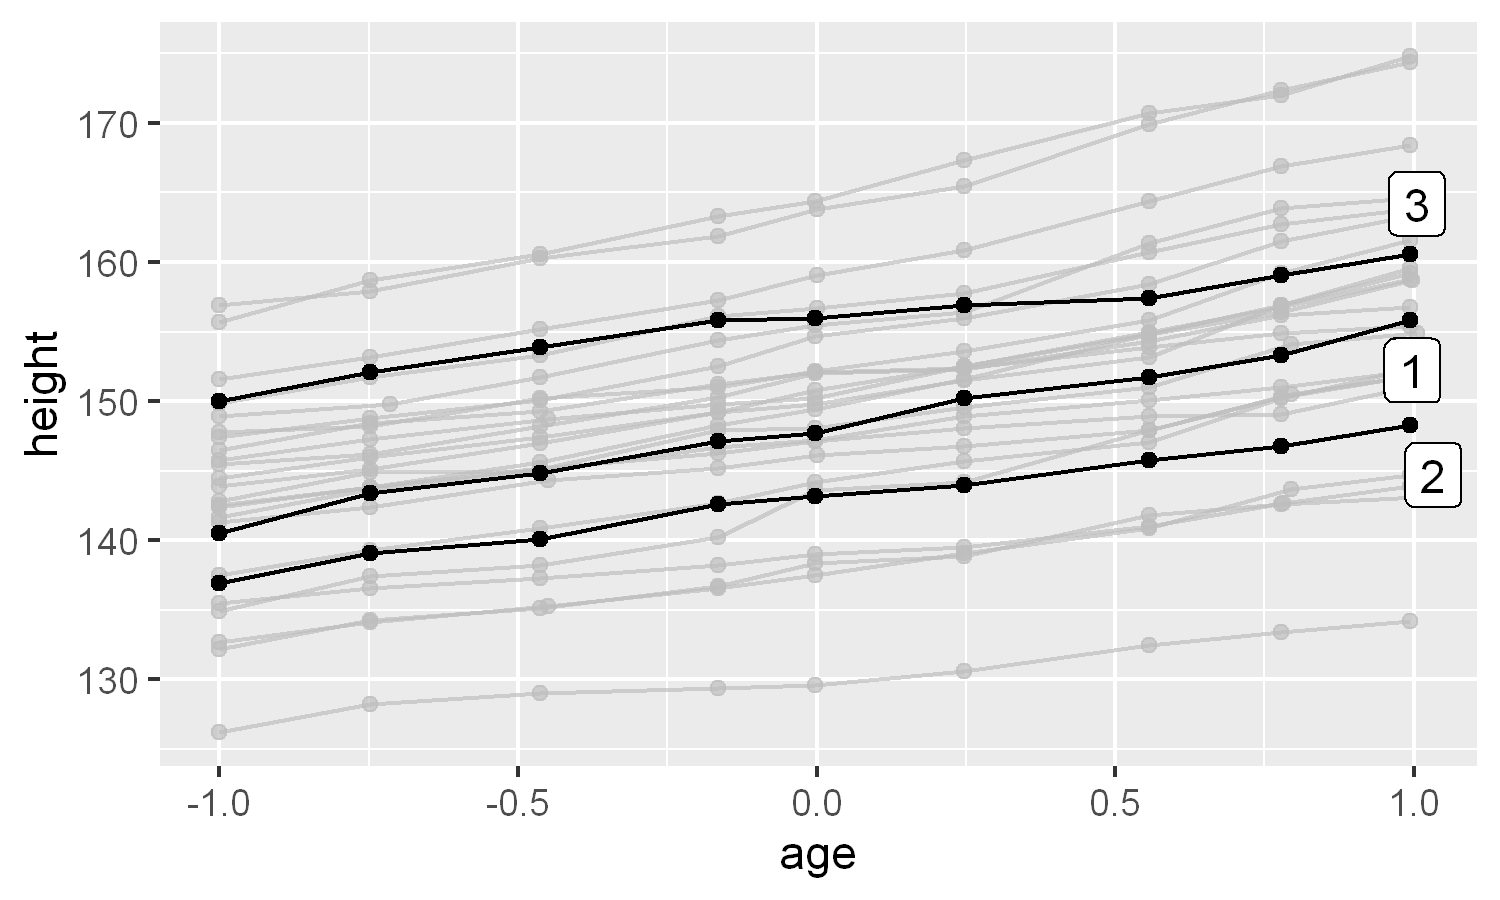

In [50]:
data(Oxboys, package = "nlme")
suppressMessages(suppressWarnings({
    ggplot(Oxboys, aes(age, height, group = Subject)) + geom_line() + geom_point() +
        gghighlight::gghighlight(Subject %in% 1:3)
}))

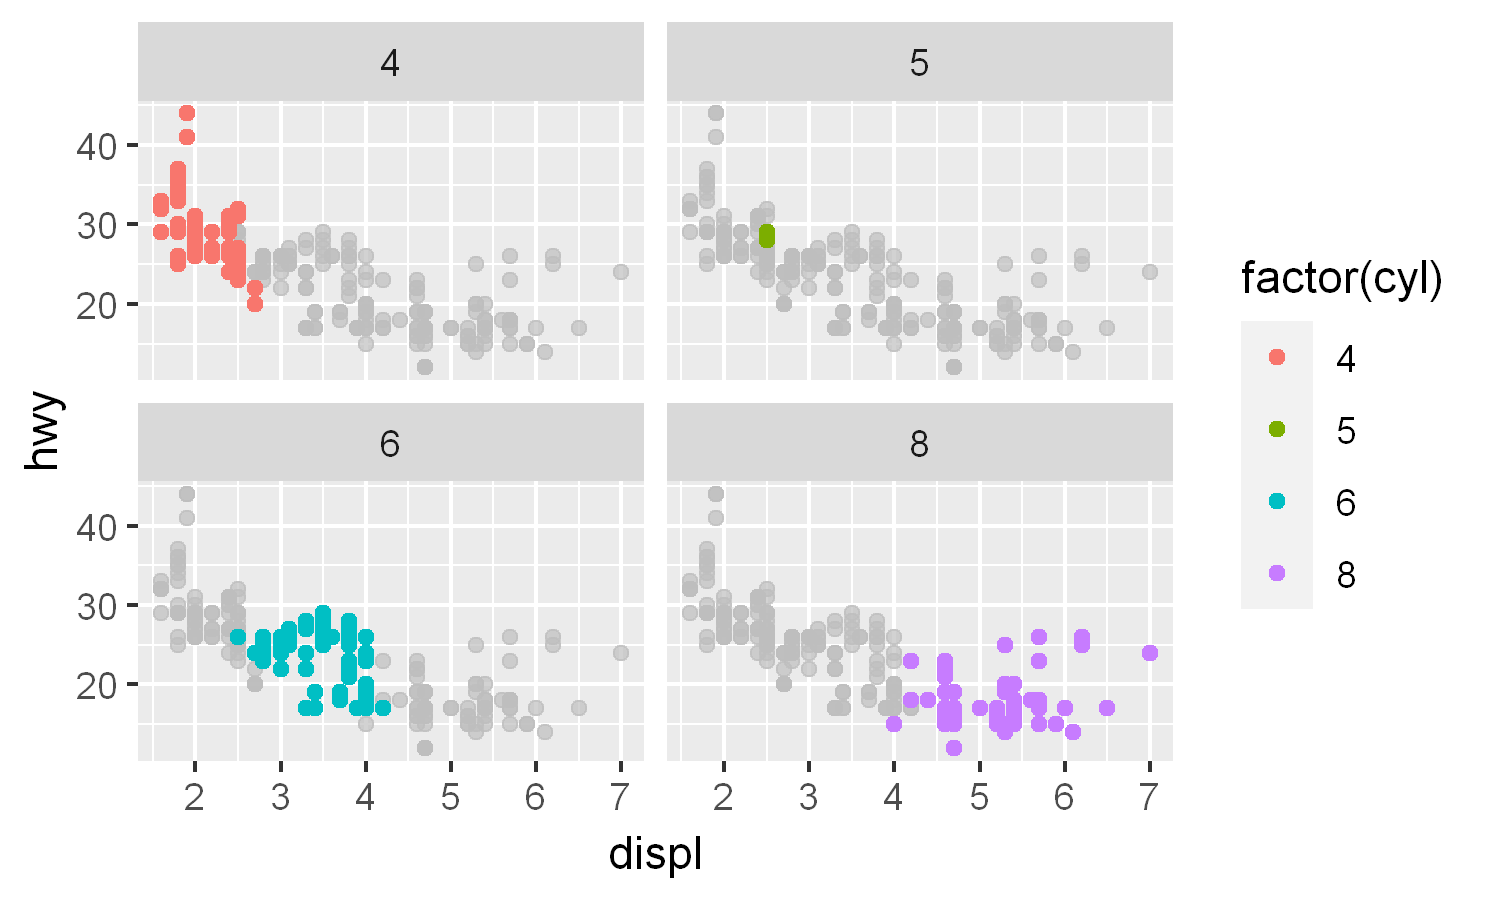

In [51]:
ggplot(mpg, aes(displ, hwy, colour = factor(cyl))) +
  geom_point() + 
  gghighlight::gghighlight() + 
  facet_wrap(vars(cyl))

# Grammar
Aes- mapped to a variable/single point 
    
    position/ size/ color/ shape
geoms-type of the plot
stats-statistical transformation
scales
facetting


## -> Graphical language
scaling


`geom_smooth()` using formula = 'y ~ x'


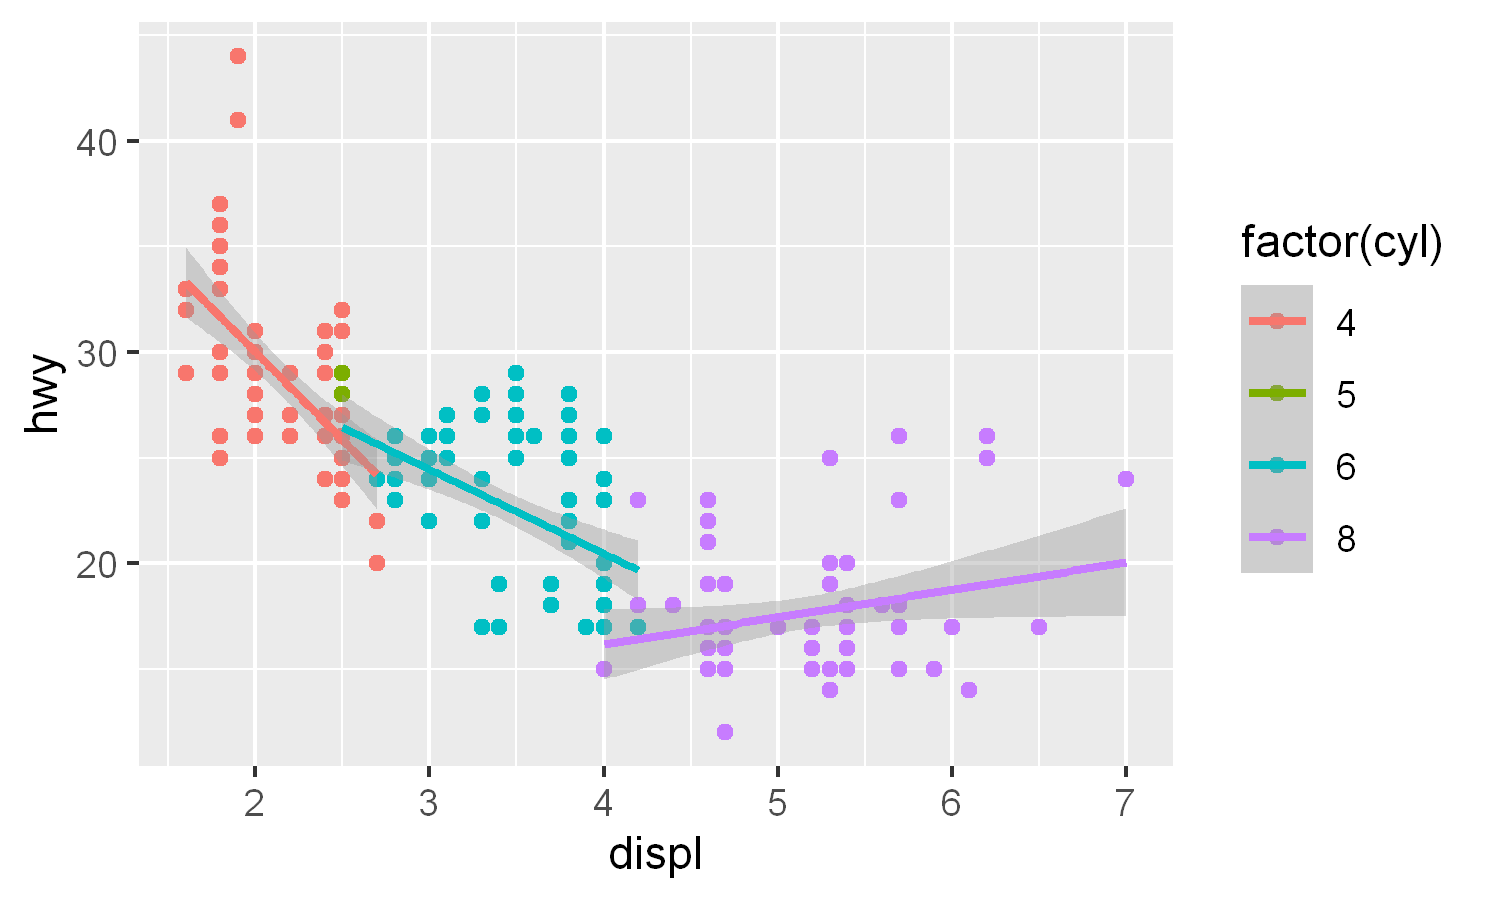

In [52]:
ggplot(mpg, aes(displ, hwy, colour = factor(cyl))) +
    geom_point() +
    geom_smooth(method = "lm")

# Layer

geom_point(mapping, data, ...) <=> layer(mapping, data, geom = "point", ...)

p + layer(
mapping = NULL,
data = NULL,
geom = "point", geom_params = list(),
stat = "identity", stat_params = list(),
position = "identity"
)

## layer with different group

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


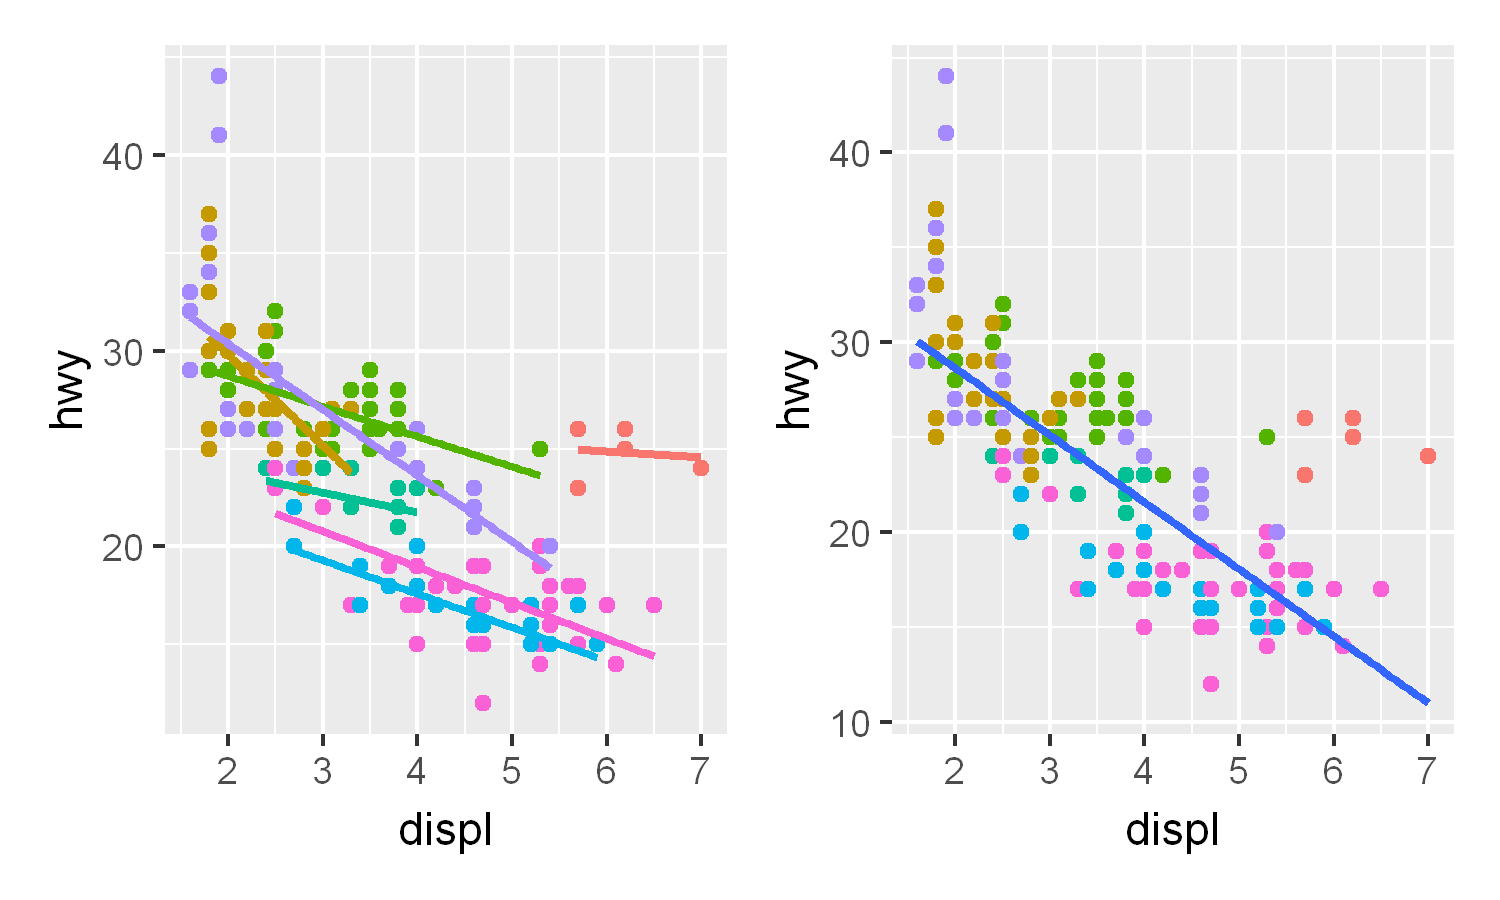

In [117]:
ggplot(mpg, aes(displ, hwy)) +
    geom_point(aes(colour = class)) +
    geom_smooth(aes(colour = class),method = "lm", se = FALSE) +
    theme(legend.position = "none") +
ggplot(mpg, aes(displ, hwy)) +
    geom_point(aes(colour = class)) +
    geom_smooth(method = "lm", se = FALSE) +
    theme(legend.position = "none")

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


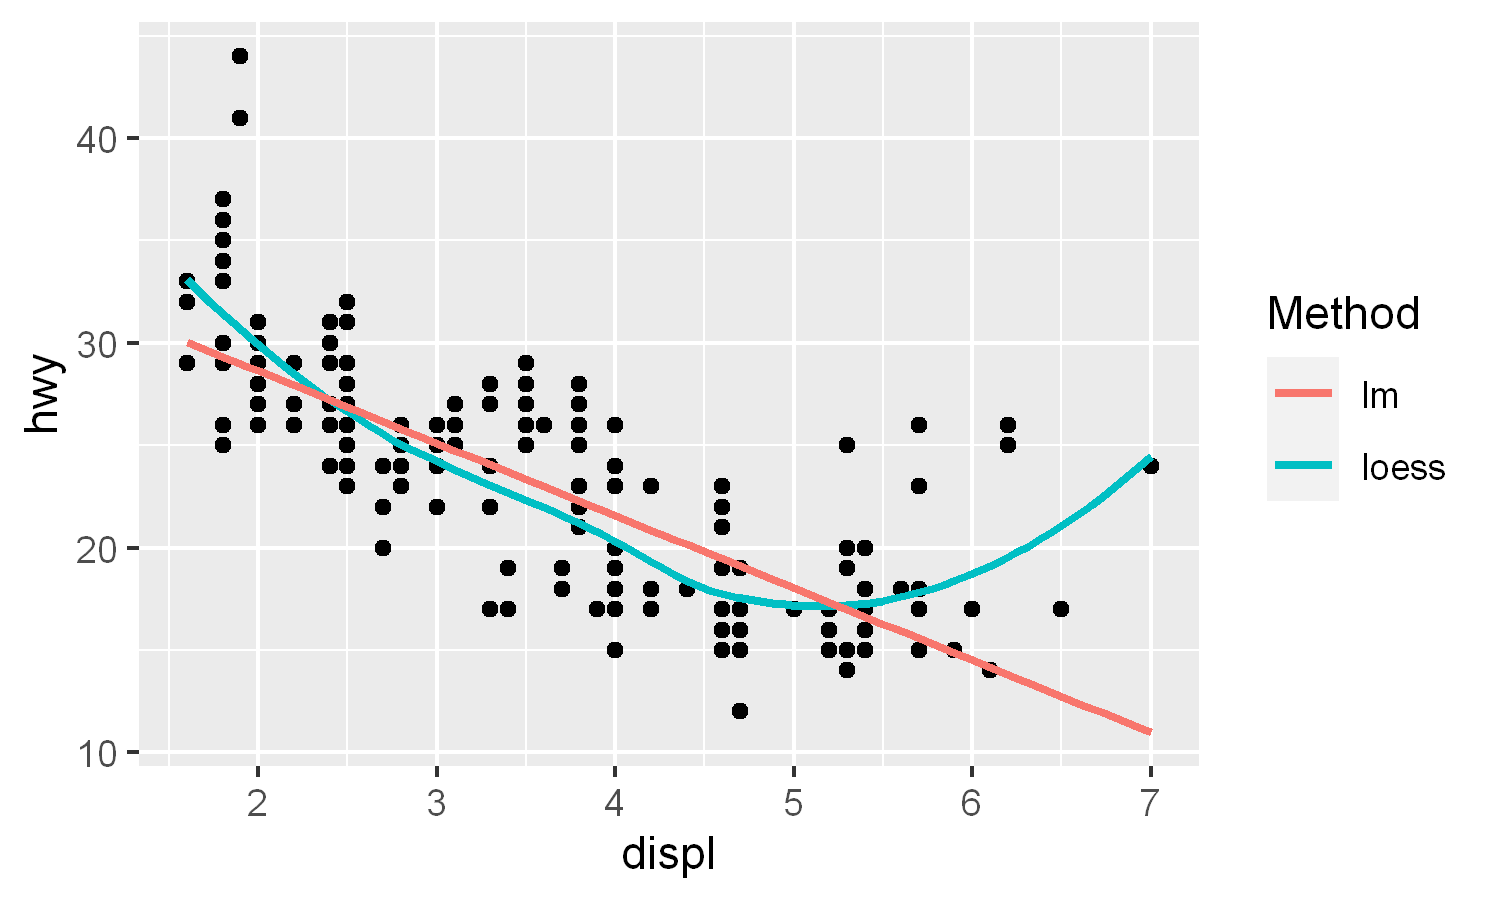

In [118]:
# Naming of layer
ggplot(mpg, aes(displ, hwy)) +
    geom_point() +
    geom_smooth(aes(colour = "loess"), method = "loess", se = FALSE) +
    geom_smooth(aes(colour = "lm"), method = "lm", se = FALSE) +
    labs(colour = "Method") # else legend display as color

Warning message in geom_point(stat = "summary", fun.y = "mean", colour = "red", :
"Ignoring unknown parameters: `fun.y`"
No summary function supplied, defaulting to `mean_se()`


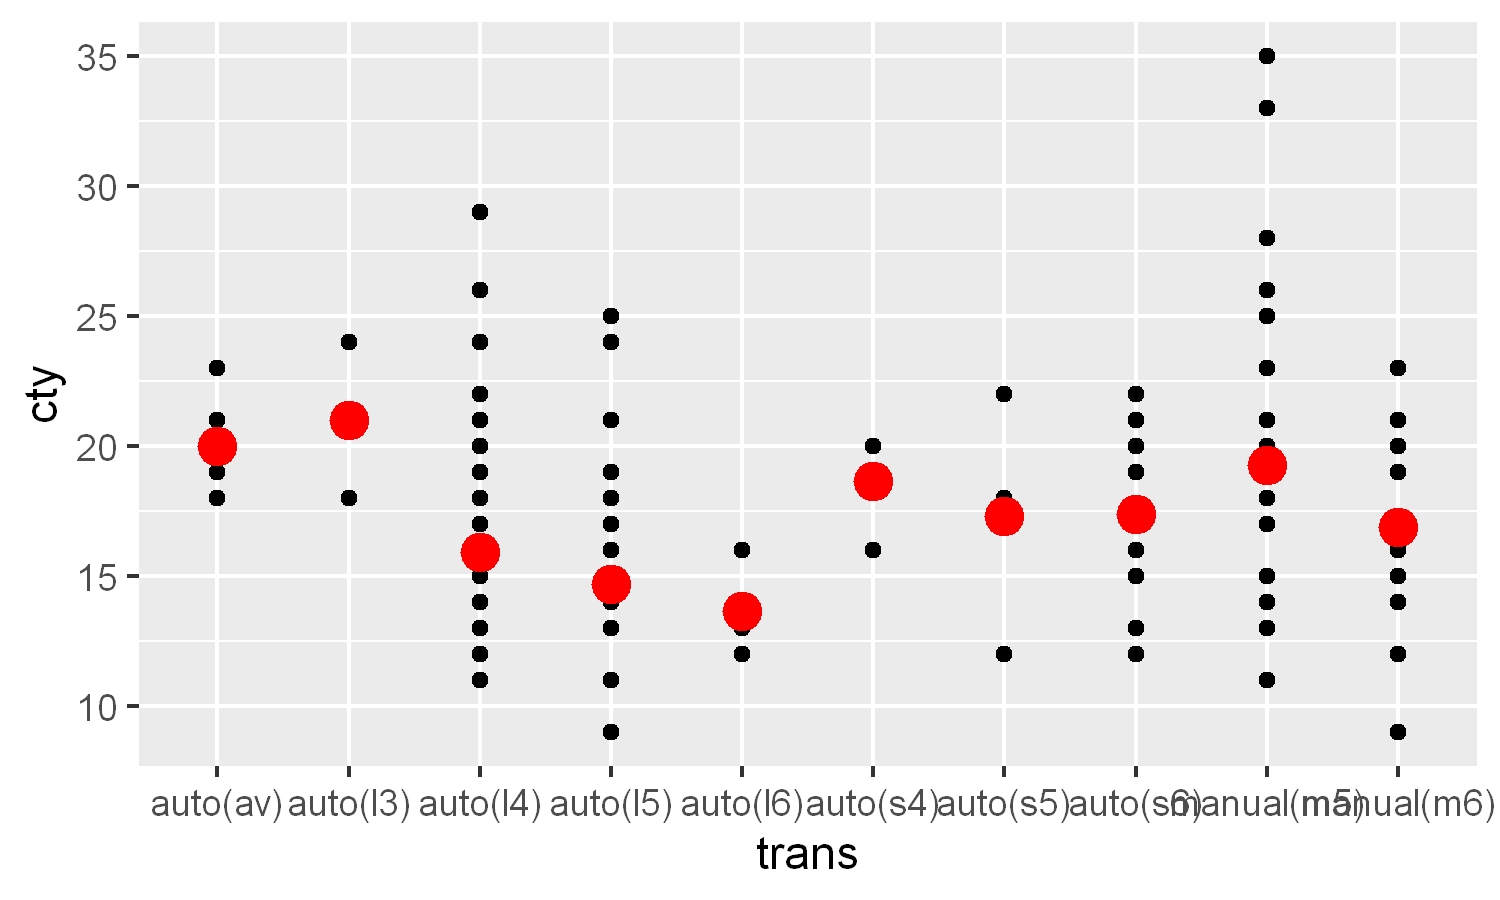

In [119]:
# use stat summary
ggplot(mpg, aes(trans, cty)) +
geom_point() +
geom_point(stat = "summary", fun.y = "mean", colour = "red", size = 4);

## generate new variable using stat
stat_bin- count, density, center of bin-> y=density

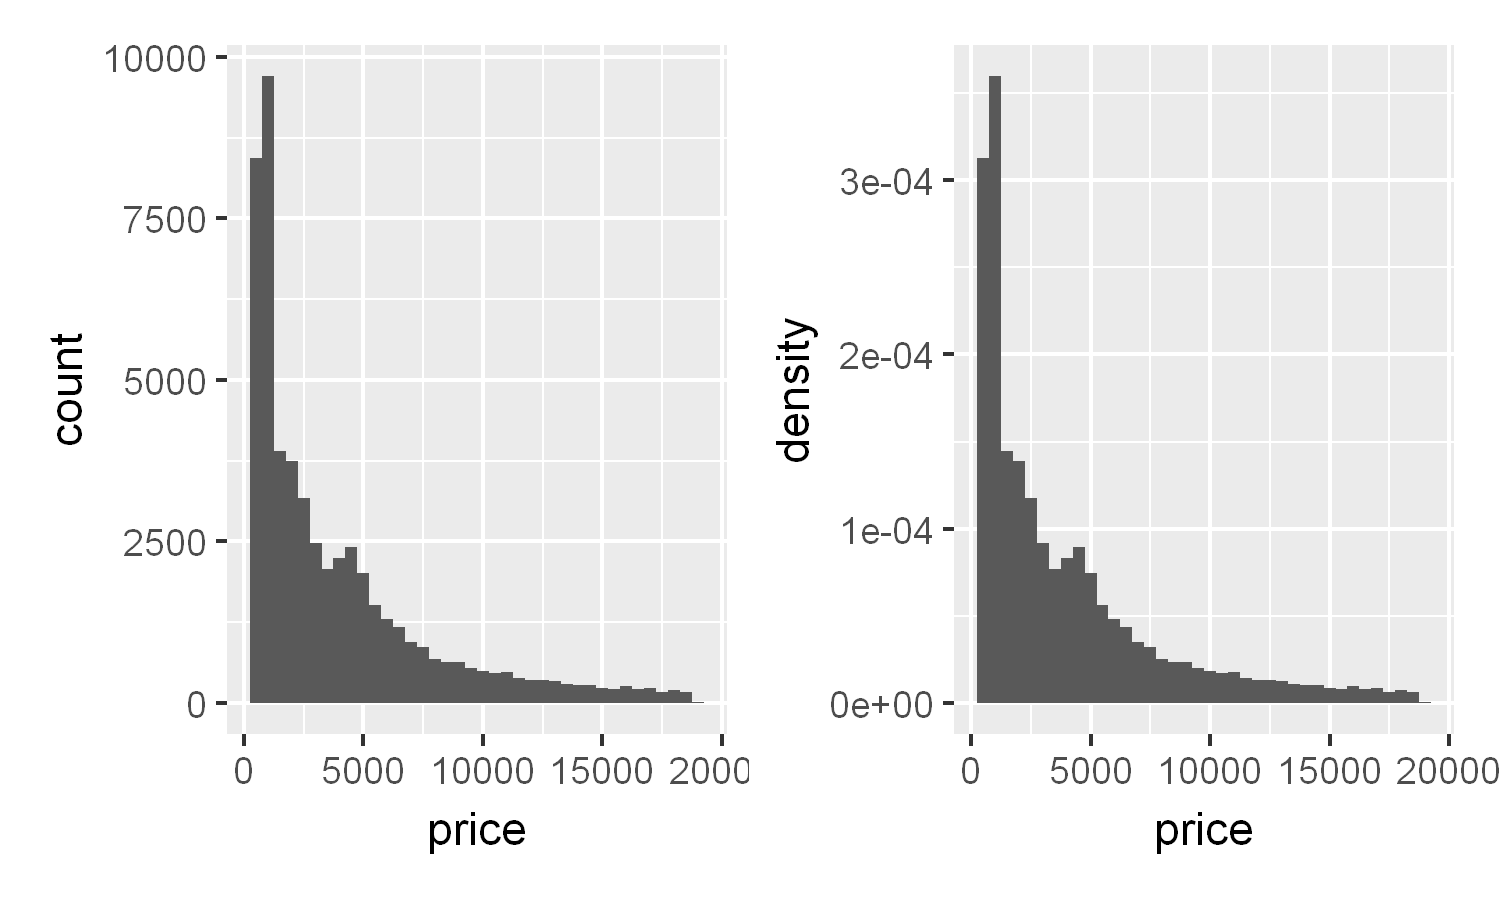

In [87]:
# standardization -> comparable between groups of different magnitude
ggplot(diamonds, aes(price)) + # y-axis diff
    geom_histogram(binwidth = 500) +
ggplot(diamonds, aes(price)) +
    geom_histogram(aes(y = ..density..), binwidth = 500)

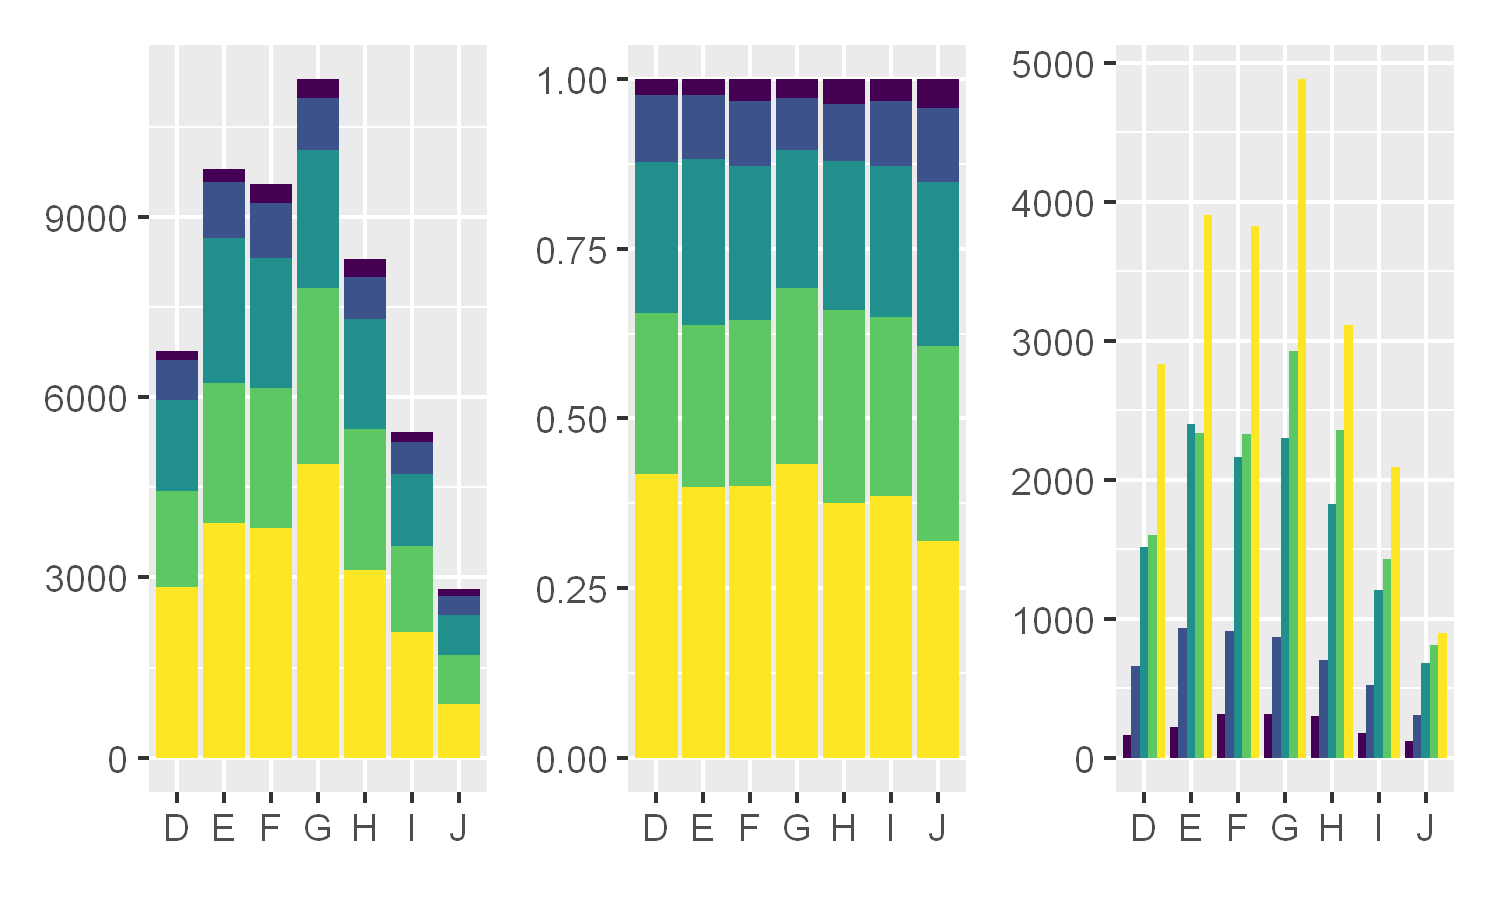

In [88]:
## Adjust position
dplot <- ggplot(diamonds, aes(color, fill = cut)) +
xlab(NULL) + ylab(NULL) + theme(legend.position = "none")
dplot + geom_bar(position = "stack")+
dplot + geom_bar(position = "fill")+
dplot + geom_bar(position = "dodge")

## scale
1. breaks
1. labels
1. Transformation
1. Daytime position scale

### breaks 
    scales::breaks_extended() creates automatic breaks for numeric axes. 
    scales::breaks_log() creates breaks appropriate for log axes.

    scales::breaks_pretty() creates “pretty” breaks for date/times.

    scales::breaks_width() creates equally spaced breaks.

Continuous position scales used to map integer, numeric, and date/time
data to x and y positio
Colour scales, used to map continuous and discrete data to colours
    scale_y_continuous(trans = "reciprocal")
    scale_x_date(date_labels = "%y", date_breaks = "5 years")

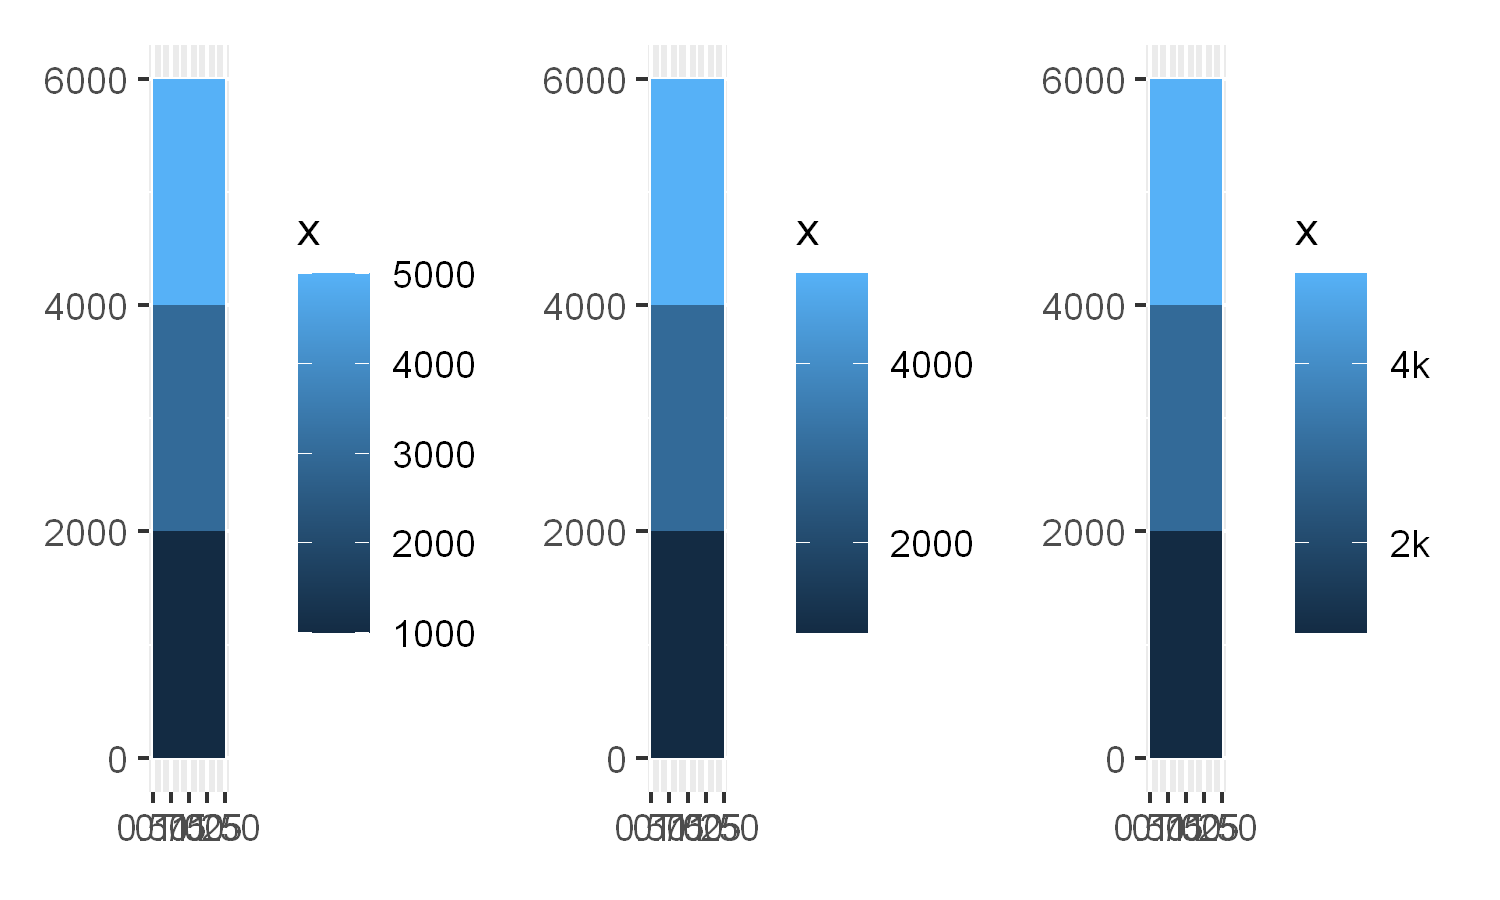

In [89]:
# scale_colour_discrete("Drive\ntrain") # x_continuous('Label')
df <- data.frame(x = c(1, 3, 5) * 1000, y = 1)
leg <- ggplot(df, aes(y, x, fill = x)) +
    geom_tile() +
    labs(x = NULL, y = NULL)
leg+ # scale in legend
leg + scale_fill_continuous(breaks = c(2000, 4000))+
leg + scale_fill_continuous(breaks = c(2000, 4000), labels = c("2k", "4k"))

### Labels

In [98]:
toy <- data.frame(
  const = 1, 
  up = 1:4,
  txt = letters[1:4], 
  big = (1:4)*1000,
  log = c(2, 5, 10, 2000)
)

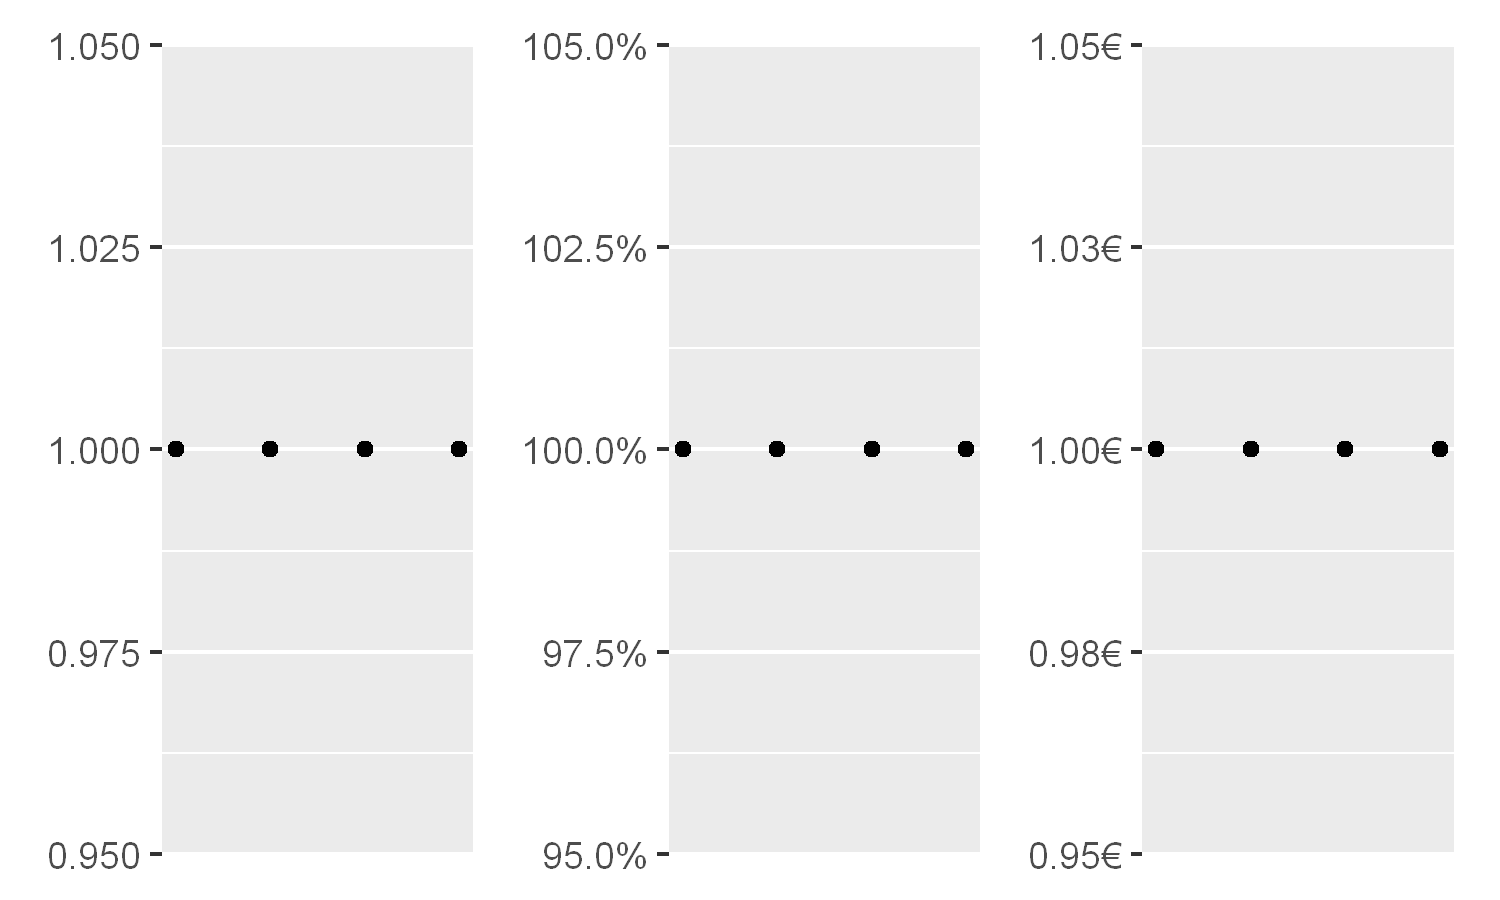

In [99]:
base <- ggplot(toy, aes(big, const)) + 
  geom_point() + 
  labs(x = NULL, y = NULL) +
  scale_x_continuous(breaks = NULL)

base+
base + scale_y_continuous(labels = scales::label_percent())+
base + scale_y_continuous(
  labels = scales::label_dollar(prefix = "", suffix = "€")
)

### Transformation


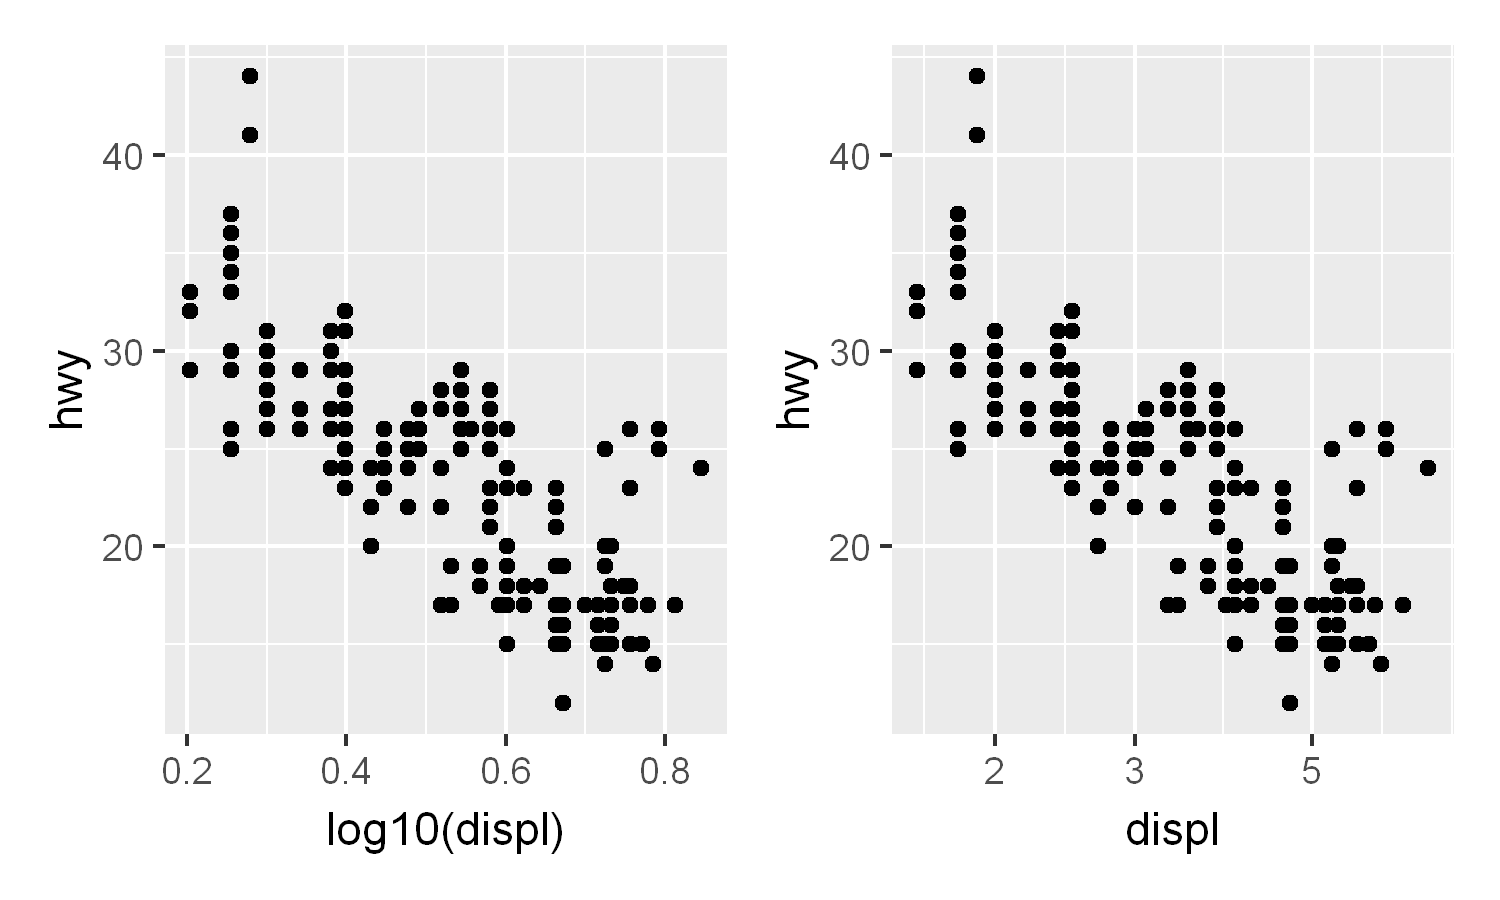

In [100]:
ggplot(mpg, aes(log10(displ), hwy)) + 
  geom_point()+
ggplot(mpg, aes(displ, hwy)) + 
  geom_point() + 
  scale_x_log10()

### color scale Color Section


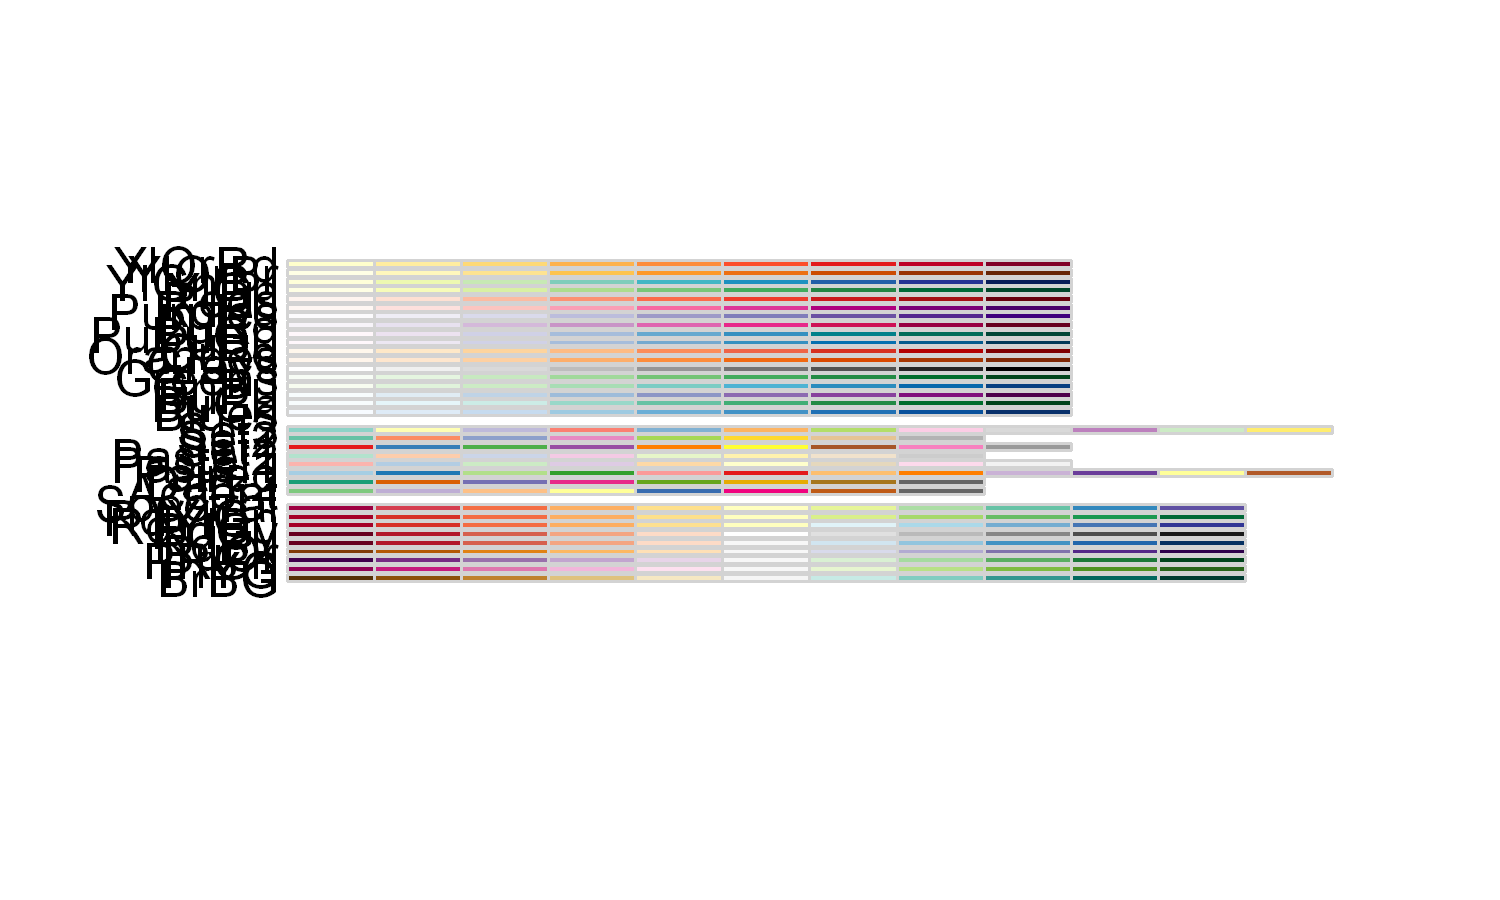

In [101]:
RColorBrewer::display.brewer.all()

### Other
1. size scale
1. radius size scale(scale_radius)
1. binned size scale
1. scale_shape
1. keywidth, keyheight, reverse and override.aes

axis.colour, axis.linewidth and axis.arrow are used to control the guide axis that is displayed alongside the legend keys

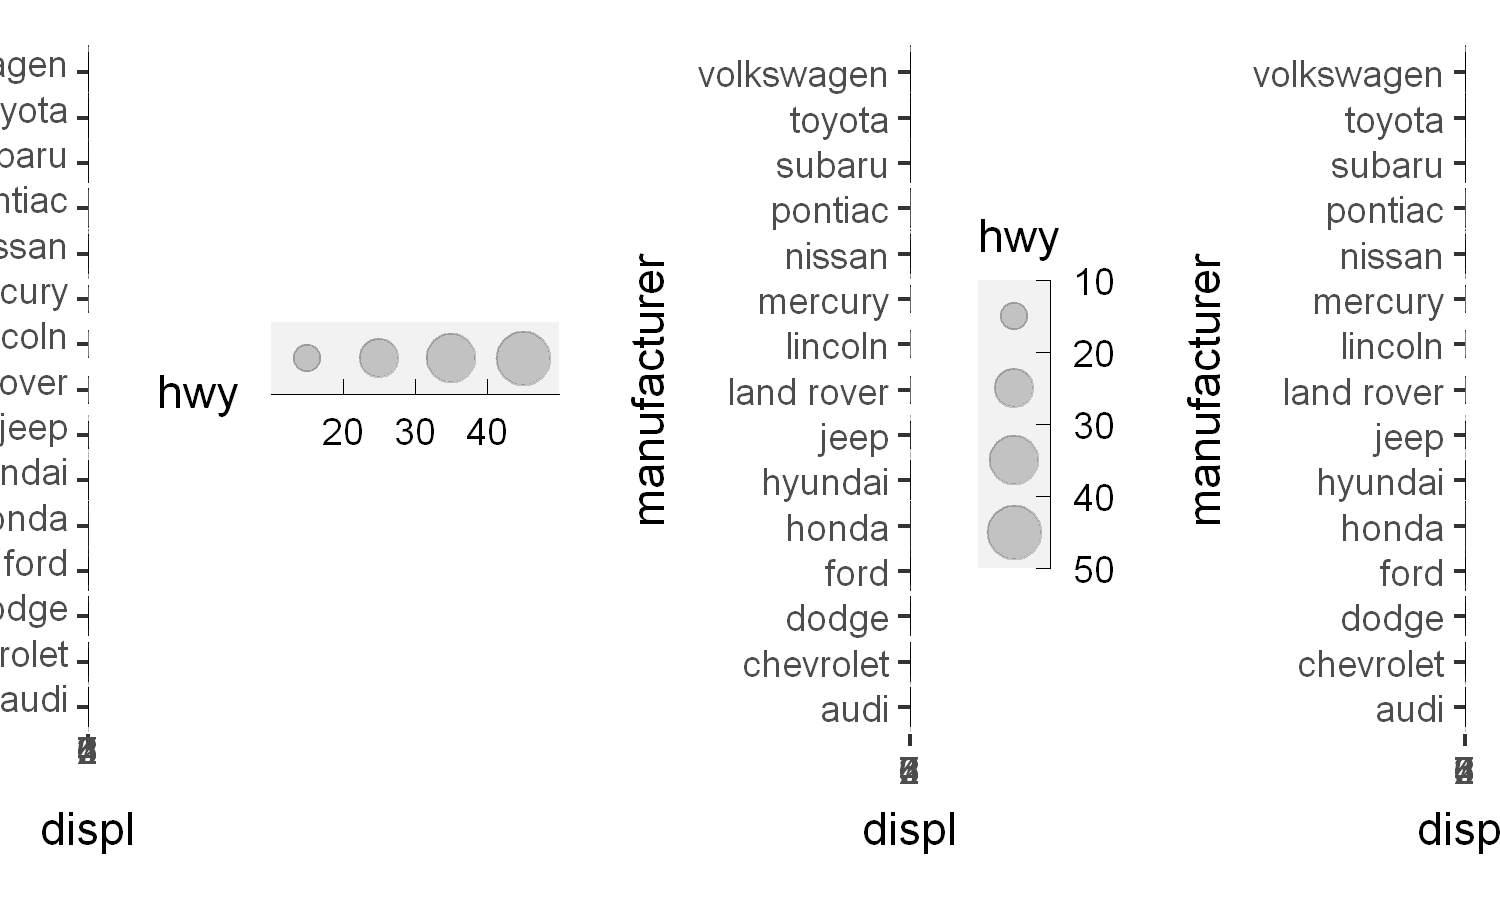

In [102]:
base <- ggplot(mpg, aes(displ, manufacturer, size = hwy)) +
  geom_point(alpha = .2) +
  scale_size_binned()

base  + guides(size = guide_bins(direction = "horizontal")) + 
base + guides(size = guide_bins(show.limits = TRUE)) +
base + guides(
  size = guide_bins(
    axis.colour = "red",
    axis.arrow = arrow(
      length = unit(.1, "inches"), 
      ends = "first", 
      type = "closed"
    )
  )
)

#### scale shape

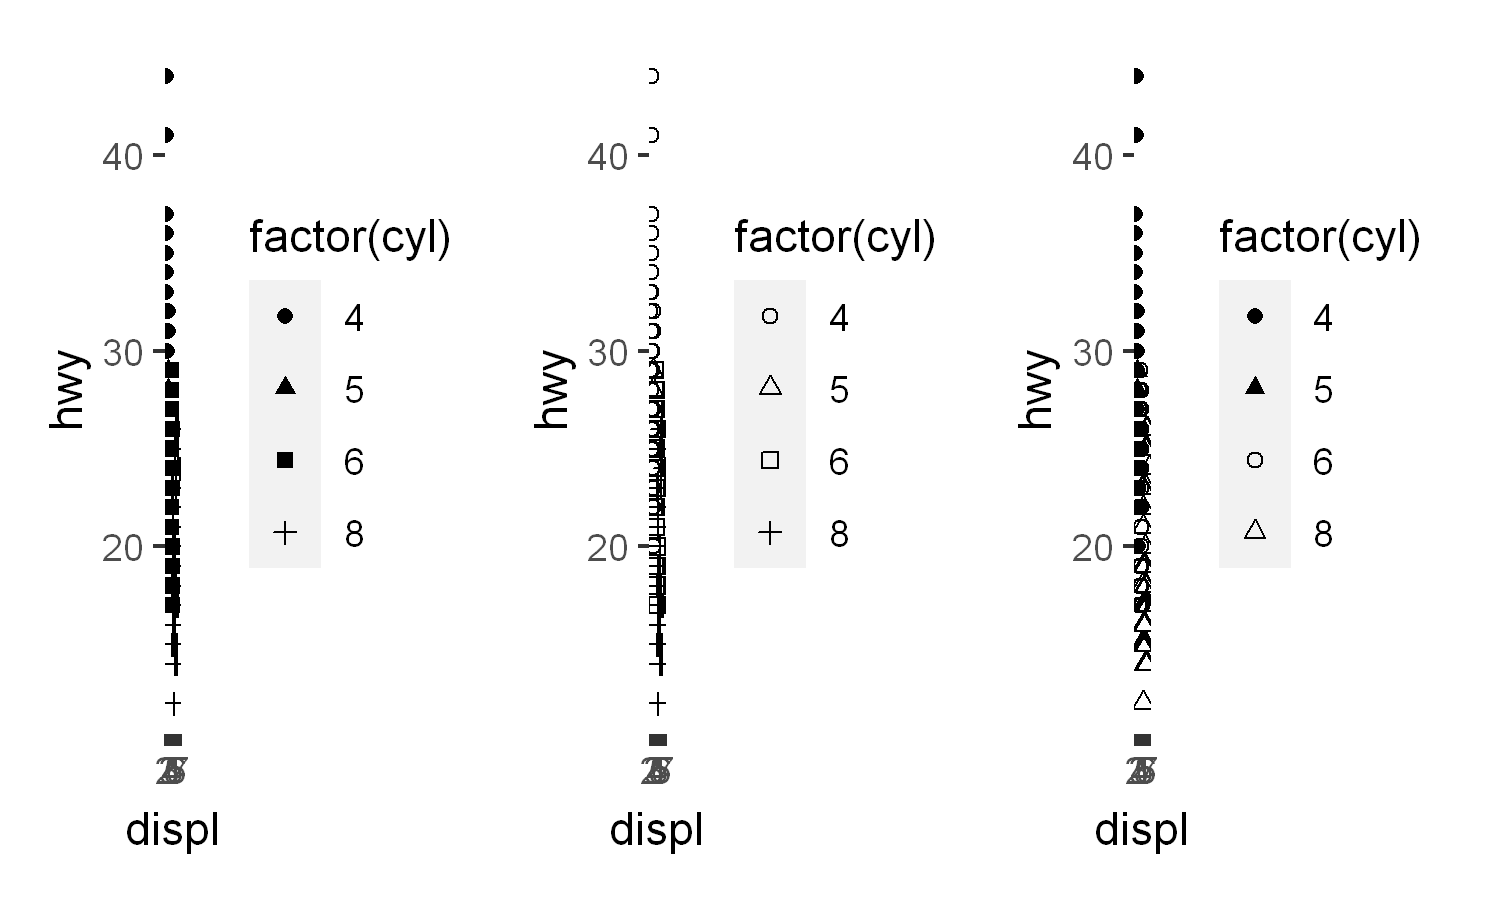

In [103]:
base <- ggplot(mpg, aes(displ, hwy, shape = factor(cyl))) + 
  geom_point()

base +
base + scale_shape(solid = FALSE)+
base + 
  scale_shape_manual(
    values = c("4" = 16, "5" = 17, "6" = 1 , "8" = 2)
  )

#### scale linewidth and line type
set linewidth as a fixed parameter
mapped onto data values -> aesthetics

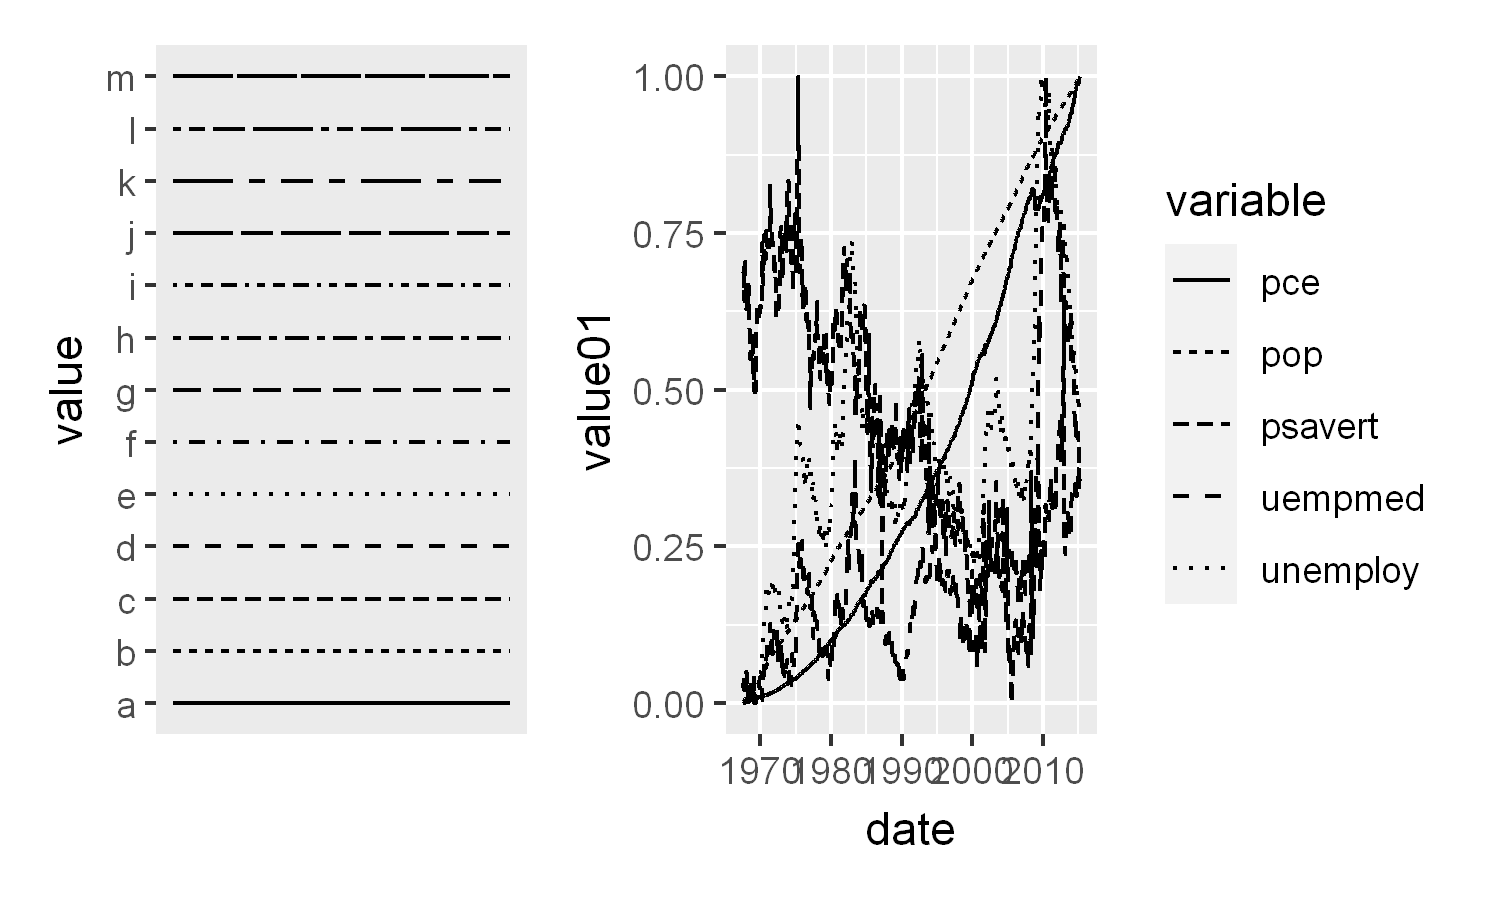

In [104]:
df <- data.frame(value = letters[1:13])
base <- ggplot(df, aes(linetype = value)) +
  geom_segment(
    mapping = aes(x = 0, xend = 1, y = value, yend = value),
    show.legend = FALSE
  ) +
  theme(panel.grid = element_blank()) +
  scale_x_continuous(NULL, NULL) 

base+
ggplot(economics_long, aes(date, value01, linetype = variable)) +
  geom_line()

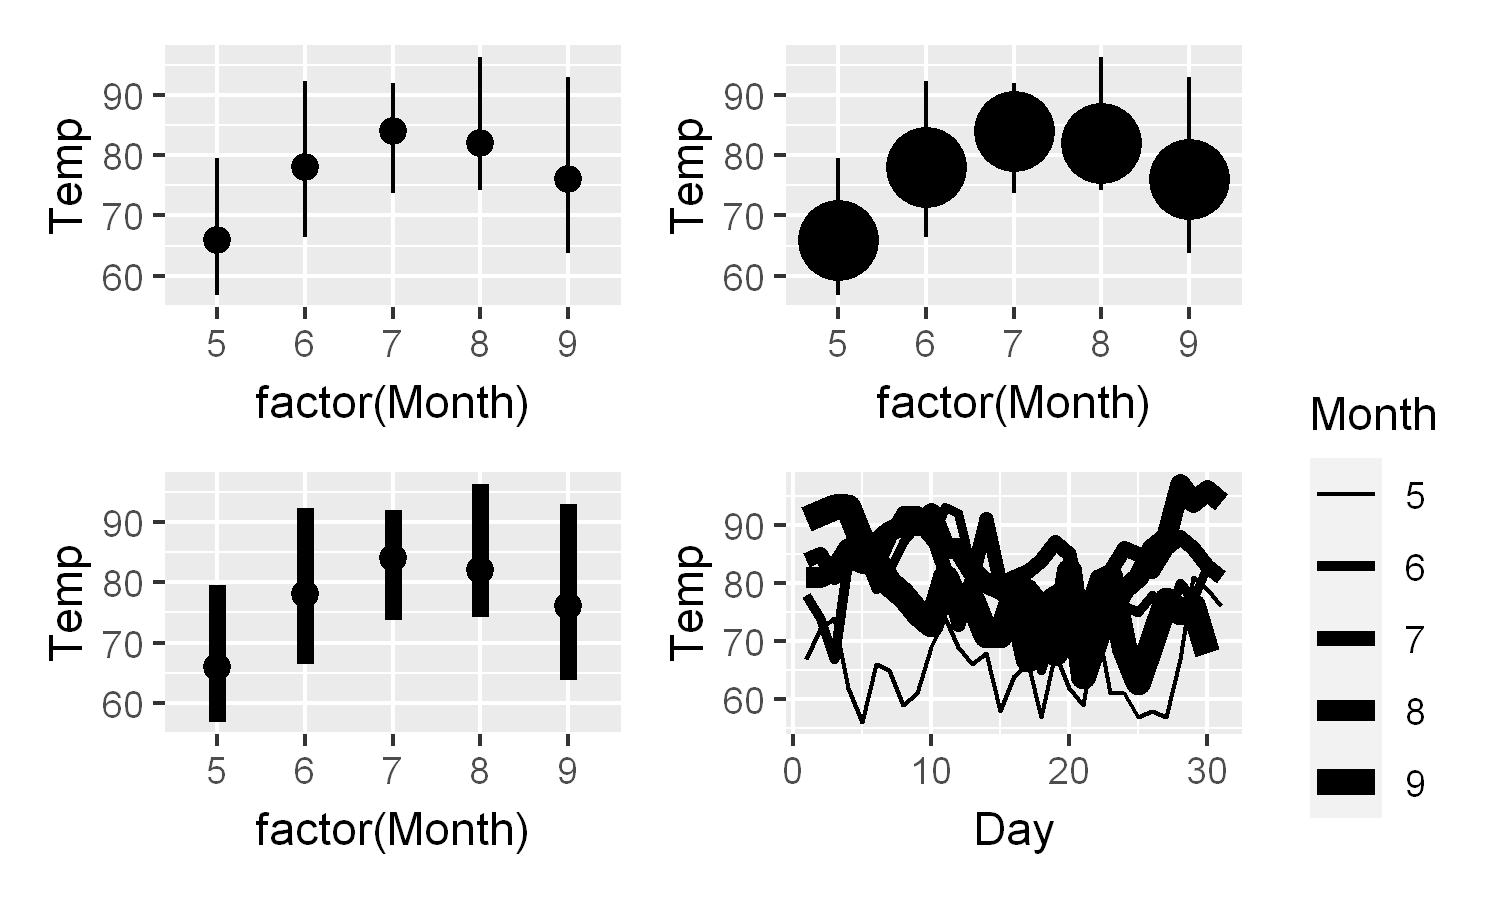

In [105]:
base <- ggplot(airquality, aes(x = factor(Month), y = Temp))

base + geom_pointrange(stat = "summary", fun.data = "median_hilow")+
base + geom_pointrange(
  stat = "summary", 
  fun.data = "median_hilow", 
  size = 2
)+
base + geom_pointrange(
  stat = "summary", 
  fun.data = "median_hilow", 
  linewidth = 2
)+
ggplot(airquality, aes(Day, Temp, group = Month)) + 
  geom_line(aes(linewidth = Month)) + 
  scale_linewidth(range = c(0.5, 3))

In [ ]:
# @ change legend for type
huron <- data.frame(year = 1875:1972, level = as.numeric(LakeHuron))
ggplot(huron, aes(year)) +
  geom_line(aes(y = level + 5, colour = "above")) +
  geom_line(aes(y = level - 5, colour = "below")) +
  scale_colour_manual("Direction",
    values = c("above" = "red", "below" = "blue")
  )


### Auxil
scales::label_wrap()

## Legends

### guides(colour = guide_legend(override.aes = list(alpha = 1)))
1. guides(fill = guide_legend(ncol = 2, byrow = TRUE)) # for discrete

    guides(fill = guide_colorbar(barheight = unit(4, "cm"))) # for continuous
2. override.aes: override some of the aesthetic settings derived from each
layer
3. keywidth and keyheight - size of keys with grid units e.g.unit(1,"cm")

4. guides
    1. +guides()
    
        x=guide_axis(n,dodge=3)
        
        colour = guide_colourbar(reverse = TRUE, barheight = unit(2, "cm"), direction = "horizontal")
    2.  scale_colour_continuous(guide = guide_colourbar(reverse = TRUE))

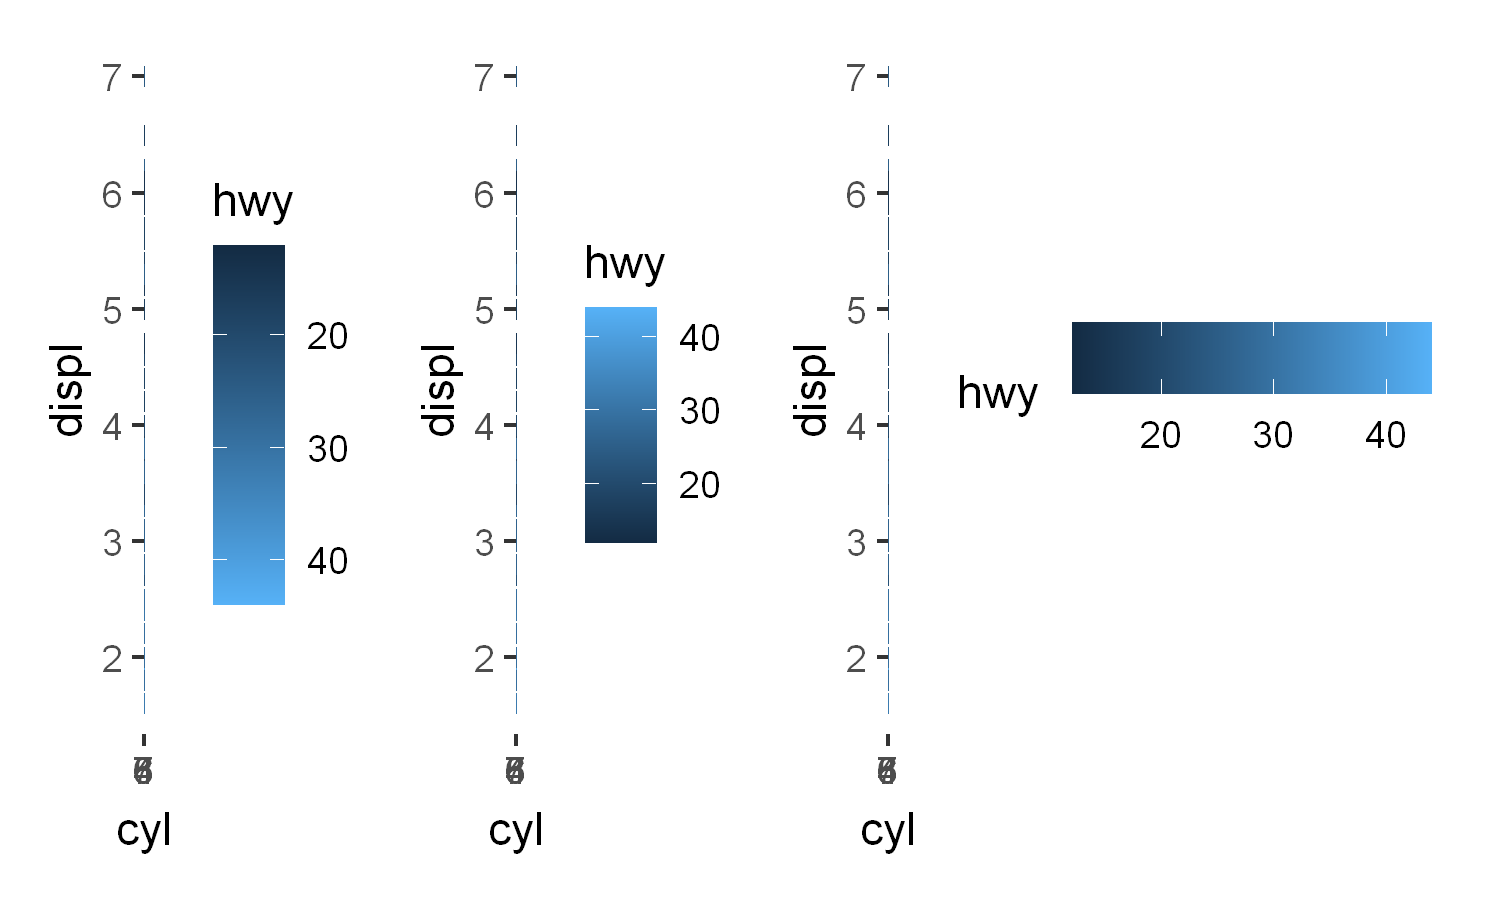

In [91]:
base <- ggplot(mpg, aes(cyl, displ, colour = hwy)) +
  geom_point(size = 2)
base + guides(colour = guide_colourbar(reverse = TRUE))+
base + guides(colour = guide_colourbar(barheight = unit(2, "cm")))+
base + guides(colour = guide_colourbar(direction = "horizontal"))

### Type
1. Discrete - guide_legend(ncol = 2, byrow = TRUE)
2. Continuous
      +scale_colour_date(date_breaks = "142 months", date_labels = "%b %Y")
    guides(colour = guide_coloursteps(show.limits = TRUE)) # for continuous
3. for date time

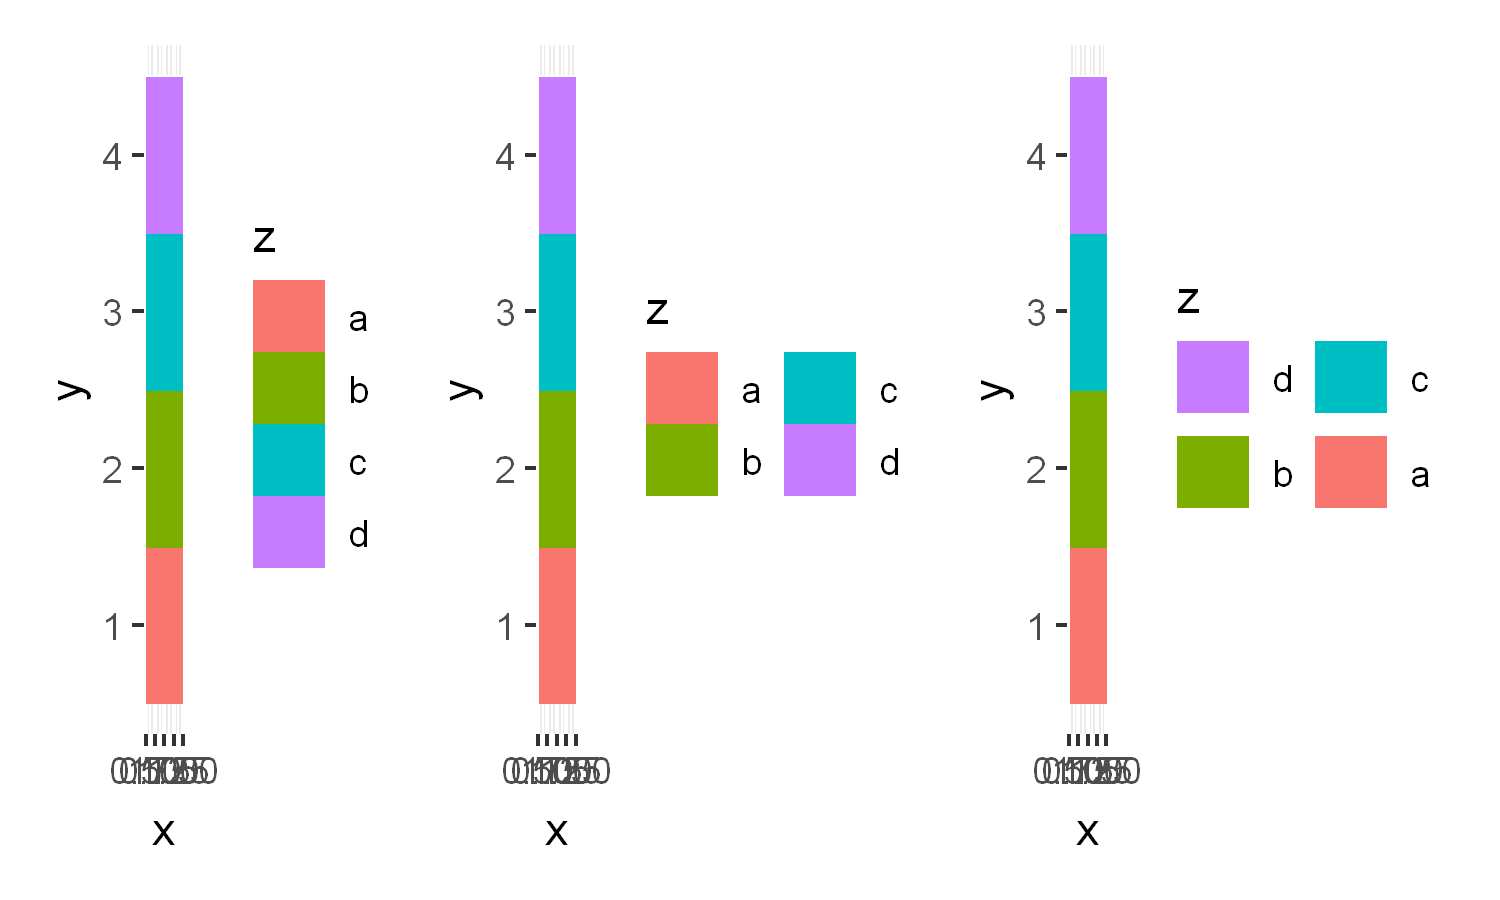

In [92]:
df <- data.frame(x = 1, y = 1:4, z = letters[1:4])
p <- ggplot(df, aes(x, y)) + geom_raster(aes(fill = z))
p+
p + guides(fill = guide_legend(ncol = 2))+
p + guides(fill = guide_legend(ncol = 2, byrow = TRUE, reverse=TRUE))


### Legend location
+ theme(legend.position = 'right'/c(0,1)-top leftc(1,0) bottom right)
    
    legend.direction/legend.box = 'horizontal', legend.box.just='top/b/l/r')
    
    legend.margin = unit(0, "mm")

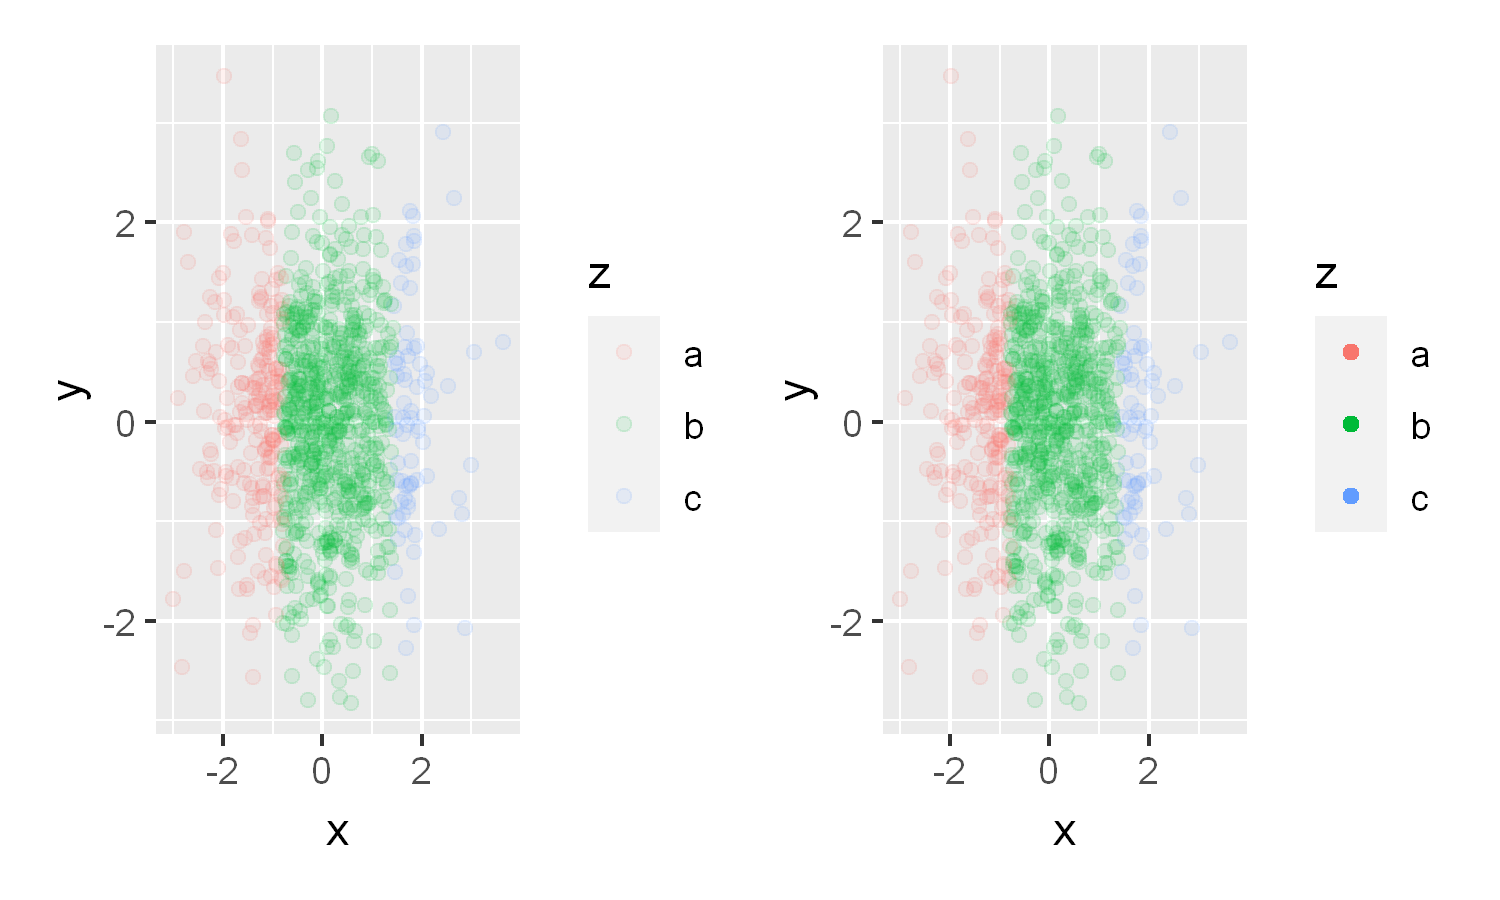

In [93]:
norm <- data.frame(x = rnorm(1000), y = rnorm(1000))
norm$z <- cut(norm$x, 3, labels = c("a", "b", "c"))
ggplot(norm, aes(x, y)) +
    geom_point(aes(colour = z), alpha = 0.1) +
ggplot(norm, aes(x, y)) +
    geom_point(aes(colour = z), alpha = 0.1) +

guides(colour = guide_legend(override.aes = list(alpha = 1)))

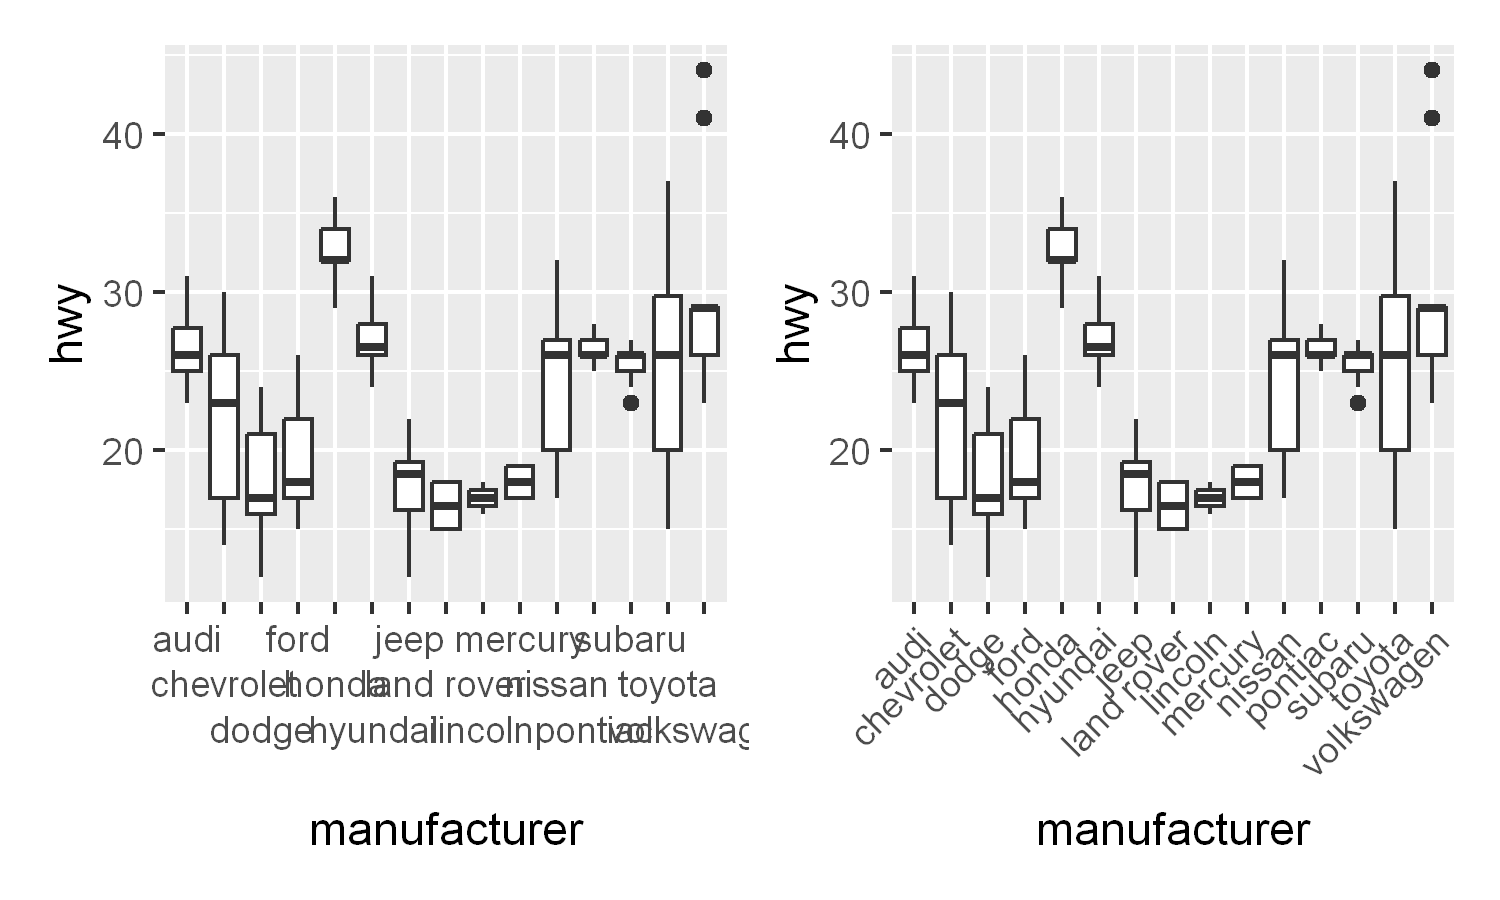

In [94]:
base <- ggplot(mpg, aes(manufacturer, hwy)) + geom_boxplot() 
base + guides(x = guide_axis(n.dodge = 3))+
base + guides(x = guide_axis(angle = 45))

### legend merging/ splitting

#### joining

[1] "\nshow.legend: FALSE to prevent a layer from ever appearing in \nthe legend; TRUE forces it to appear when it otherwise wouldn’t\nELSE overridden by new\nGGplot use the fewest number of legends to accurately convey the aesthetics\n"

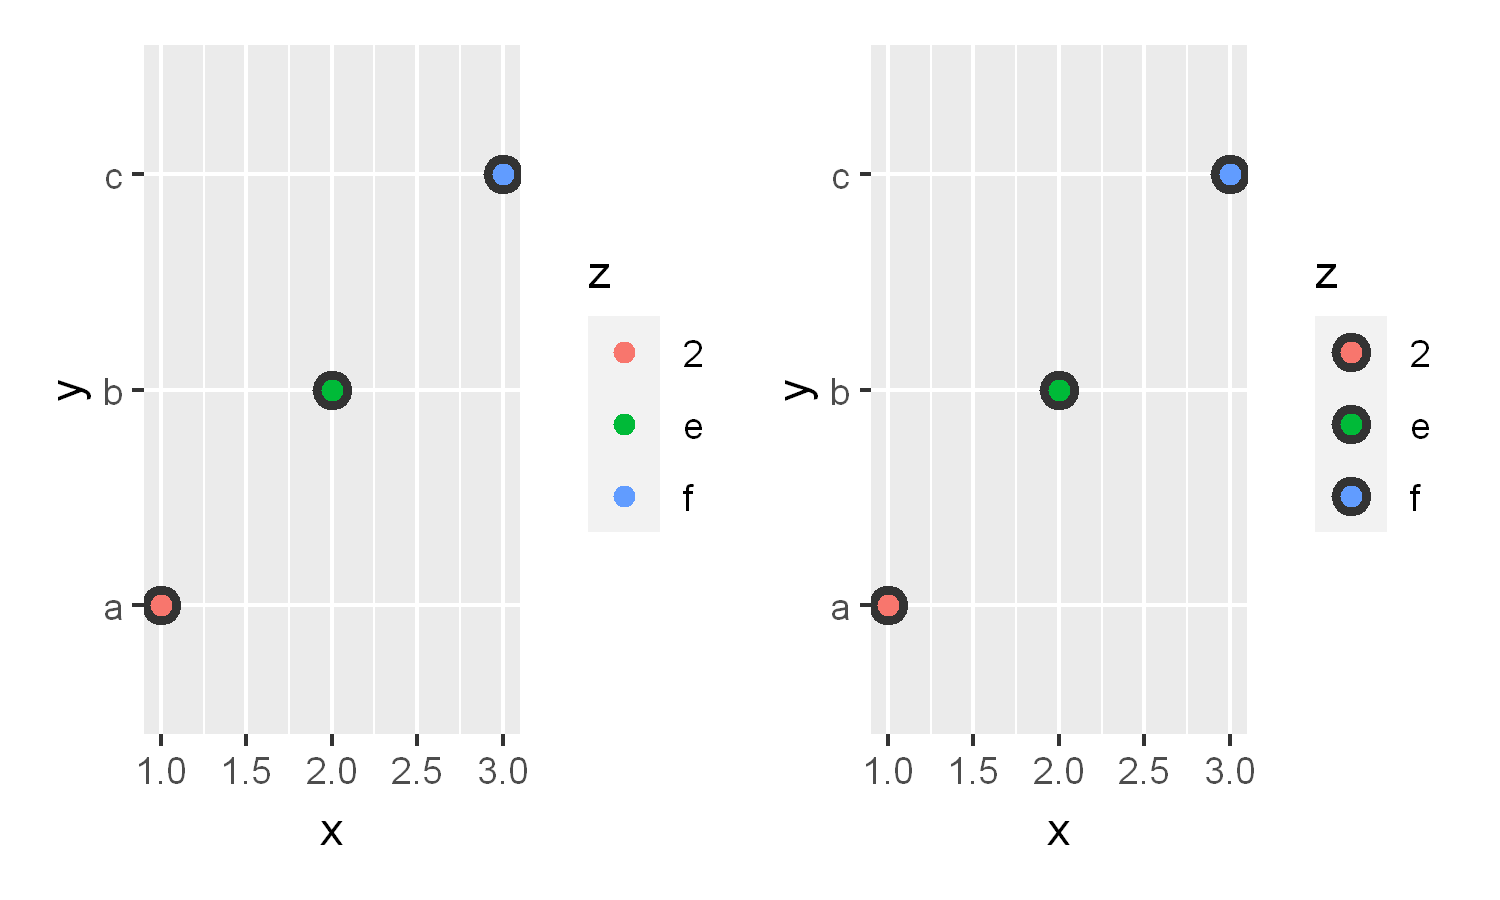

In [106]:
"
show.legend: FALSE to prevent a layer from ever appearing in 
the legend; TRUE forces it to appear when it otherwise wouldn’t
ELSE overridden by new
GGplot use the fewest number of legends to accurately convey the aesthetics
"
df <- data.frame(x = 1:3, y = c("a", "b", "c"),z=c('2','e','f'))
ggplot(df, aes(x, y)) +
    geom_point(size = 4, colour = "grey20") +
    geom_point(aes(colour = z), size = 2) +
ggplot(df, aes(x, y)) +
    geom_point(size = 4, colour = "grey20", show.legend = TRUE) +
    geom_point(aes(colour = z), size = 2)

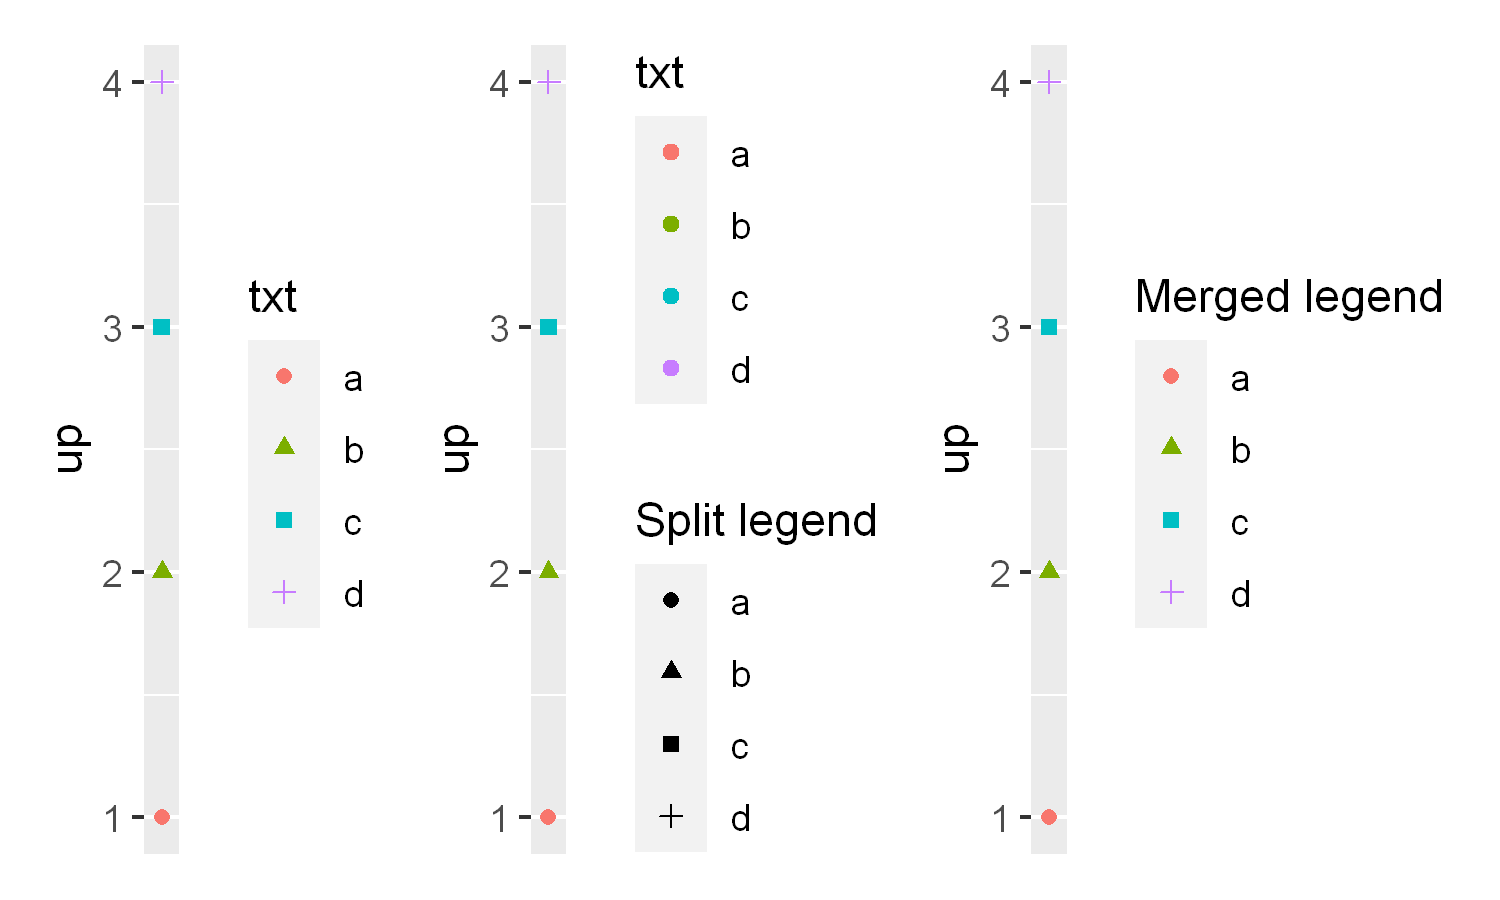

In [107]:
base <- ggplot(toy, aes(const, up)) + 
  geom_point(aes(shape = txt, colour = txt)) + 
  scale_x_continuous(NULL, breaks = NULL)

base+
base + labs(shape = "Split legend")+
base + labs(shape = "Merged legend", colour = "Merged legend")

#### splitting
ggnewscale::new_scale_colour() initialise a new colour scale:

Warning message:
"package 'ggnewscale' was built under R version 4.3.1"


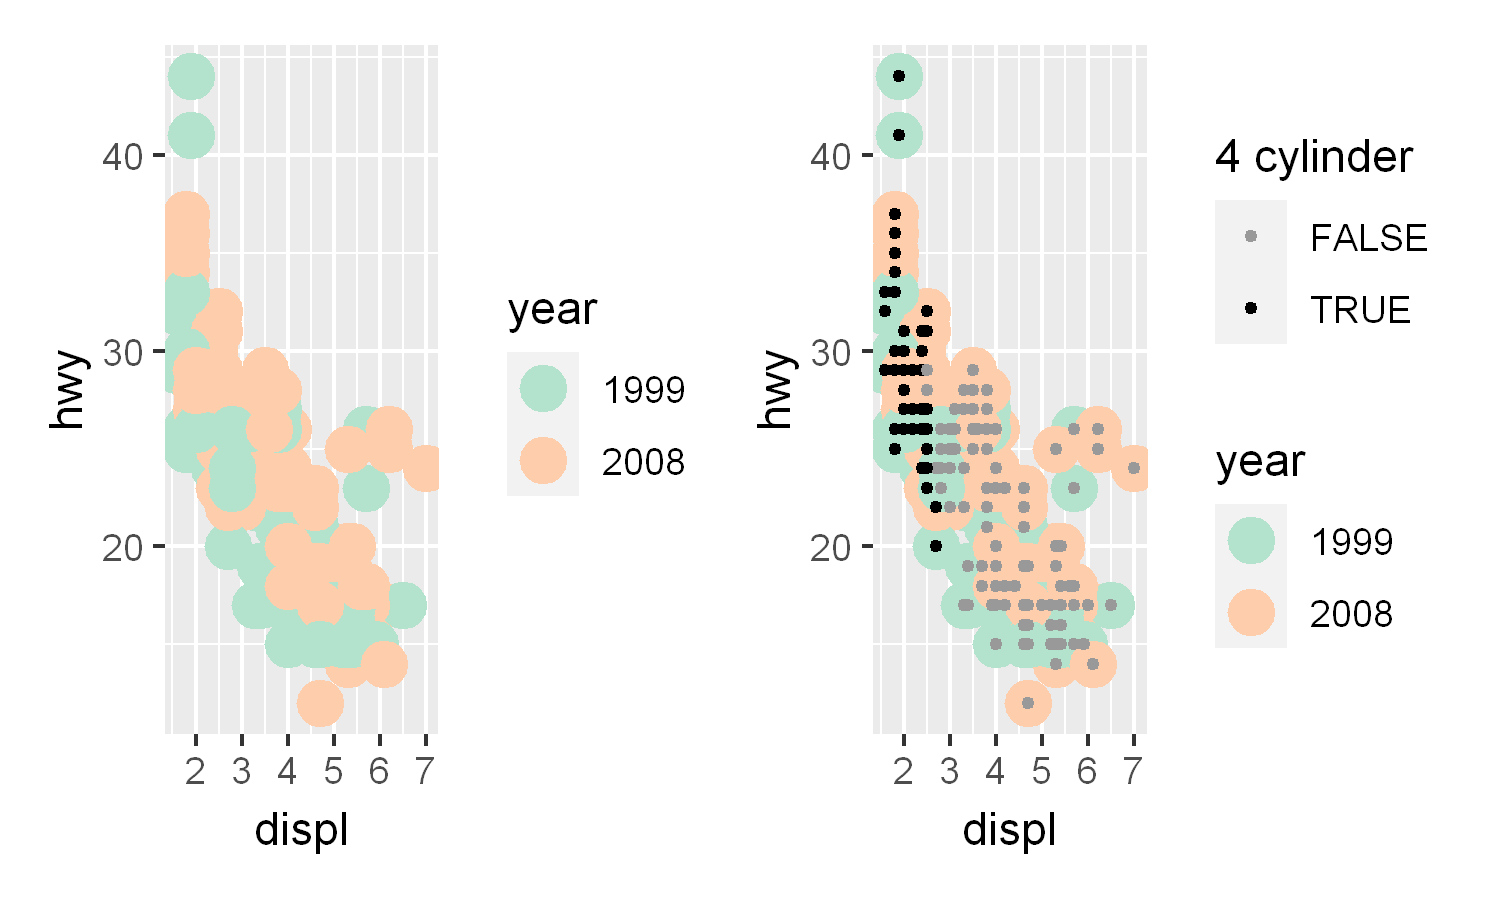

In [108]:
library(ggnewscale)
base <- ggplot(mpg, aes(displ, hwy)) + 
  geom_point(aes(colour = factor(year)), size = 5) + 
  scale_colour_brewer("year", type = "qual", palette = 5) 

base+
base + 
  ggnewscale::new_scale_colour() + 
  geom_point(aes(colour = cyl == 4), size = 1, fill = NA) + 
  scale_colour_manual("4 cylinder", values = c("grey60", "black"))

### Legend key glyphs


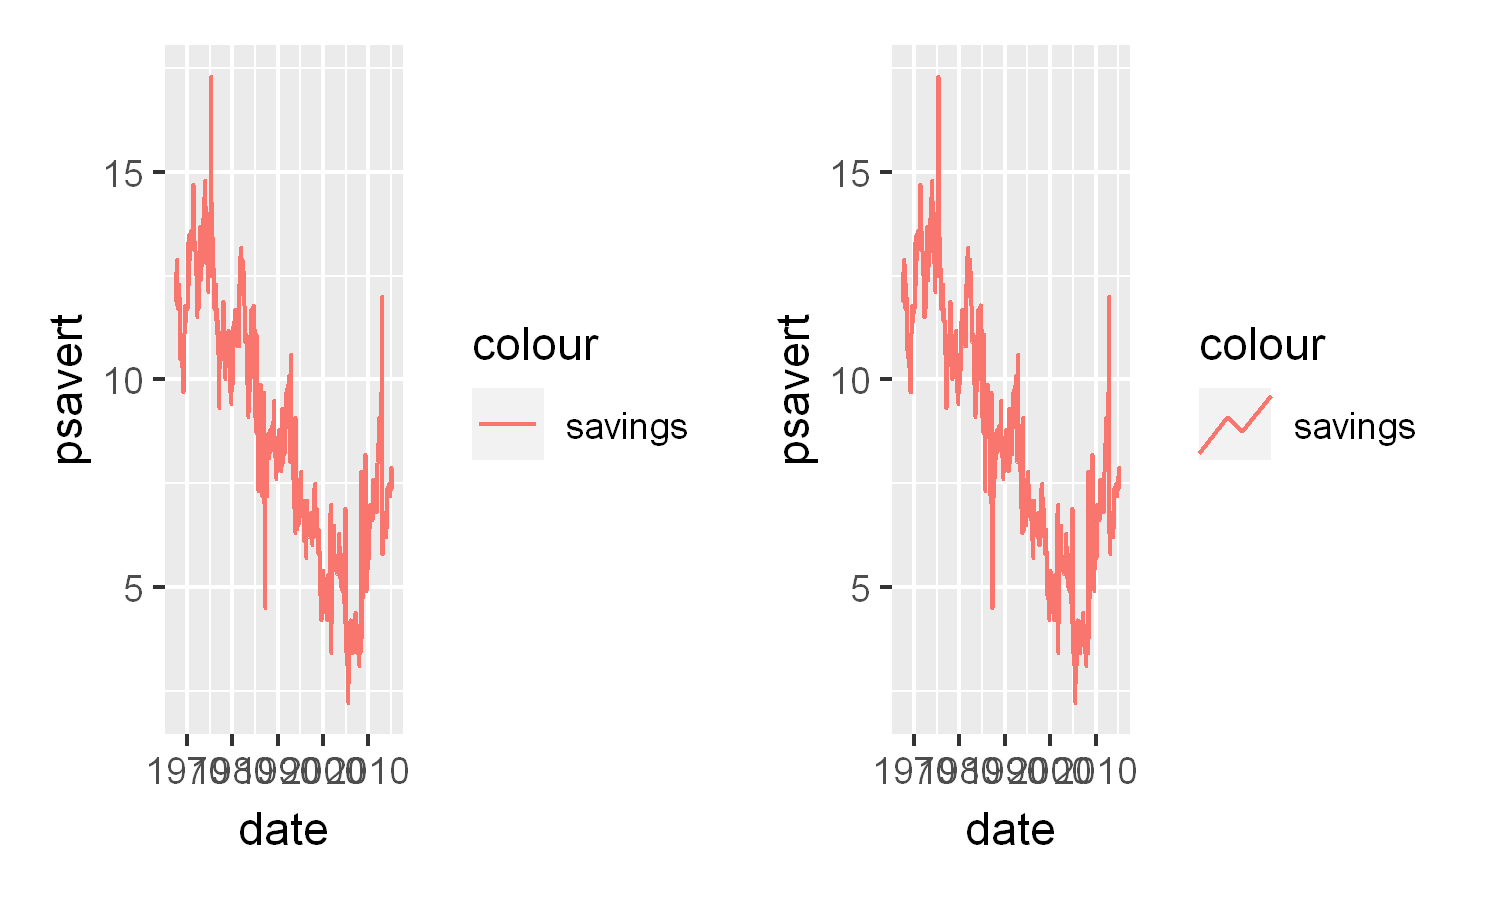

In [109]:
base <- ggplot(economics, aes(date, psavert, color = "savings"))

base + geom_line()+
base + geom_line(key_glyph = "timeseries")
# OR base + geom_line(key_glyph = draw_key_timeseries)

# Color
HCL- colour space, which has three components of hue, chroma and luminance:
1. continuous colour scales you want to keep hue constant, and
vary chroma and luminance

    1. Hue is a number between 0 and 360 (an angle) which gives the “colour”
    of the colour: like blue, red, orange, etc.
    2. Chroma is the purity of a colour. A chroma of 0 is grey, and the maximum
    value of chroma varies with luminance.
    3. Luminance is the lightness of the colour. A luminance of 0 produces black,
    and a luminance of 1 produces white.
2. color choice

    bright colours work well for points, but are overwhelming on bars. Subtle colours
    work well for bars, but are hard to see on points
    
    For categorical data, the palettes most of interest are ‘Set1’ and ‘Dark2’ for
    points and ‘Set2’, ‘Pastel1’, ‘Pastel2’ and ‘Accent’ for areas. Use RCol-
    orBrewer::display.brewer.all() to list all palettes


1. Scale type 	->                                   Default guide type
    1. continuous scales for colour/fill aesthetics ->	colourbar
    1. binned scales for colour/fill aesthetics ->	coloursteps
    1. position scales (continuous, binned and discrete) ->	axis
    1. discrete scales (except position scales) ->	legend
    1. binned scales (except position/colour/fill scales) ->	bins
    
    
    guide_colourbar()/ 
    guide_coloursteps() /
    guide_axis() /
    guide_legend() /
    guide_bins()/


1. scale_colour_gradient() and scale_fill_gradient()

    limits=c(1,3) -> NA
    
    oob = scales::squish -> same as highest / lowest
    
    a two-colour gradient, low-high (light blue-dark blue)
2. scale_colour_gradient2() and scale_fill_gradient2()
    
    three-colour gradient, low-med-high (red-white-blue)

scale_color_discrete

continuous colour scales you want to keep hue constant, and
vary chroma and luminance

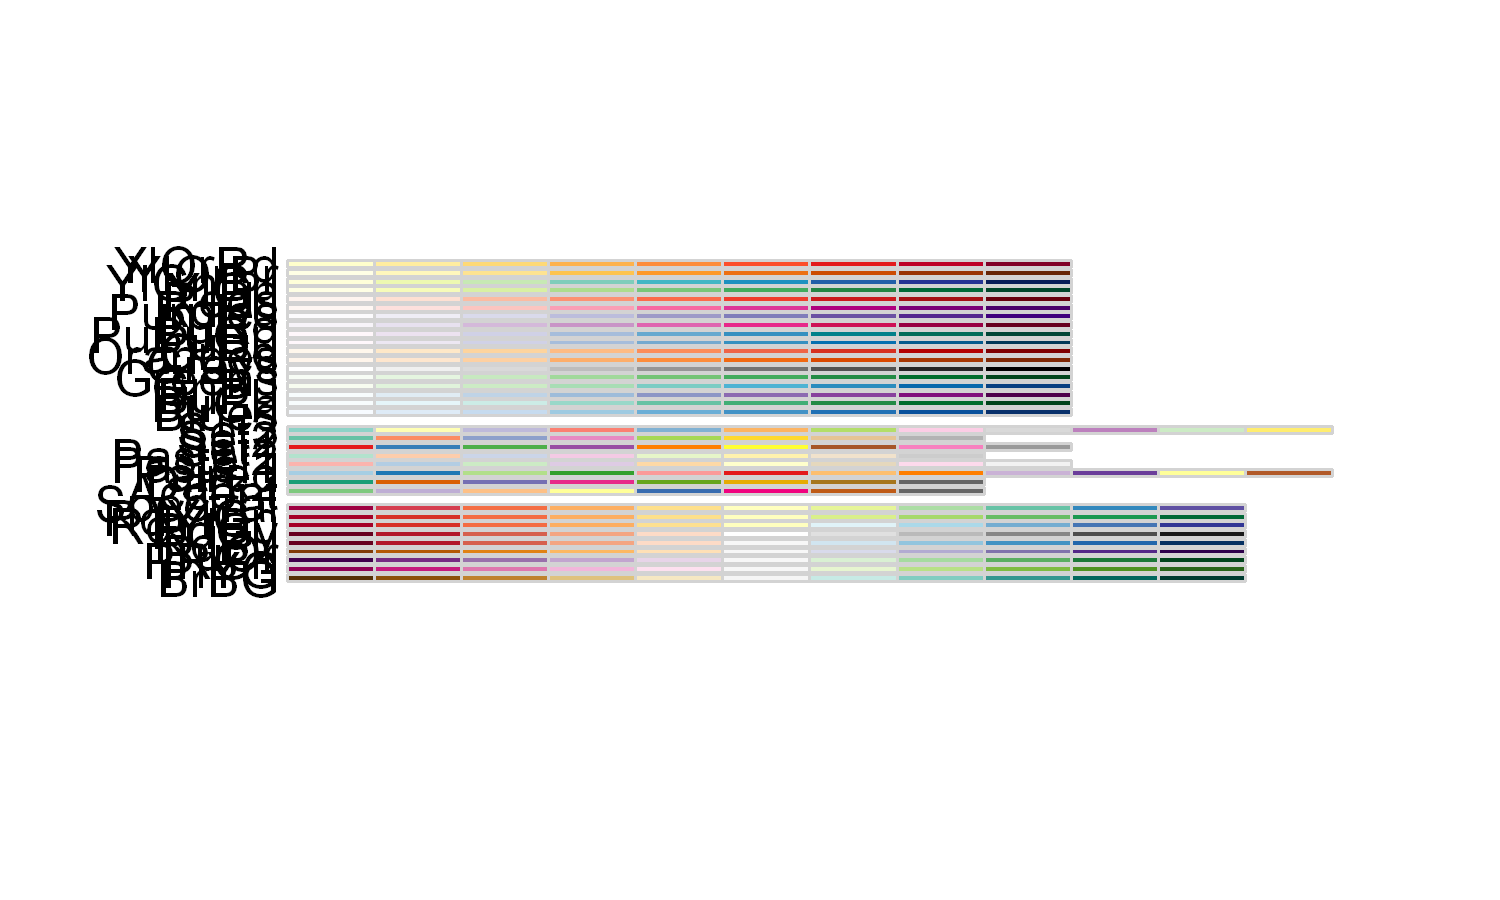

In [111]:
RColorBrewer::display.brewer.all()

## binned color scale
scale_fill_binned()
scale_fill_steps(n.breaks = 8)

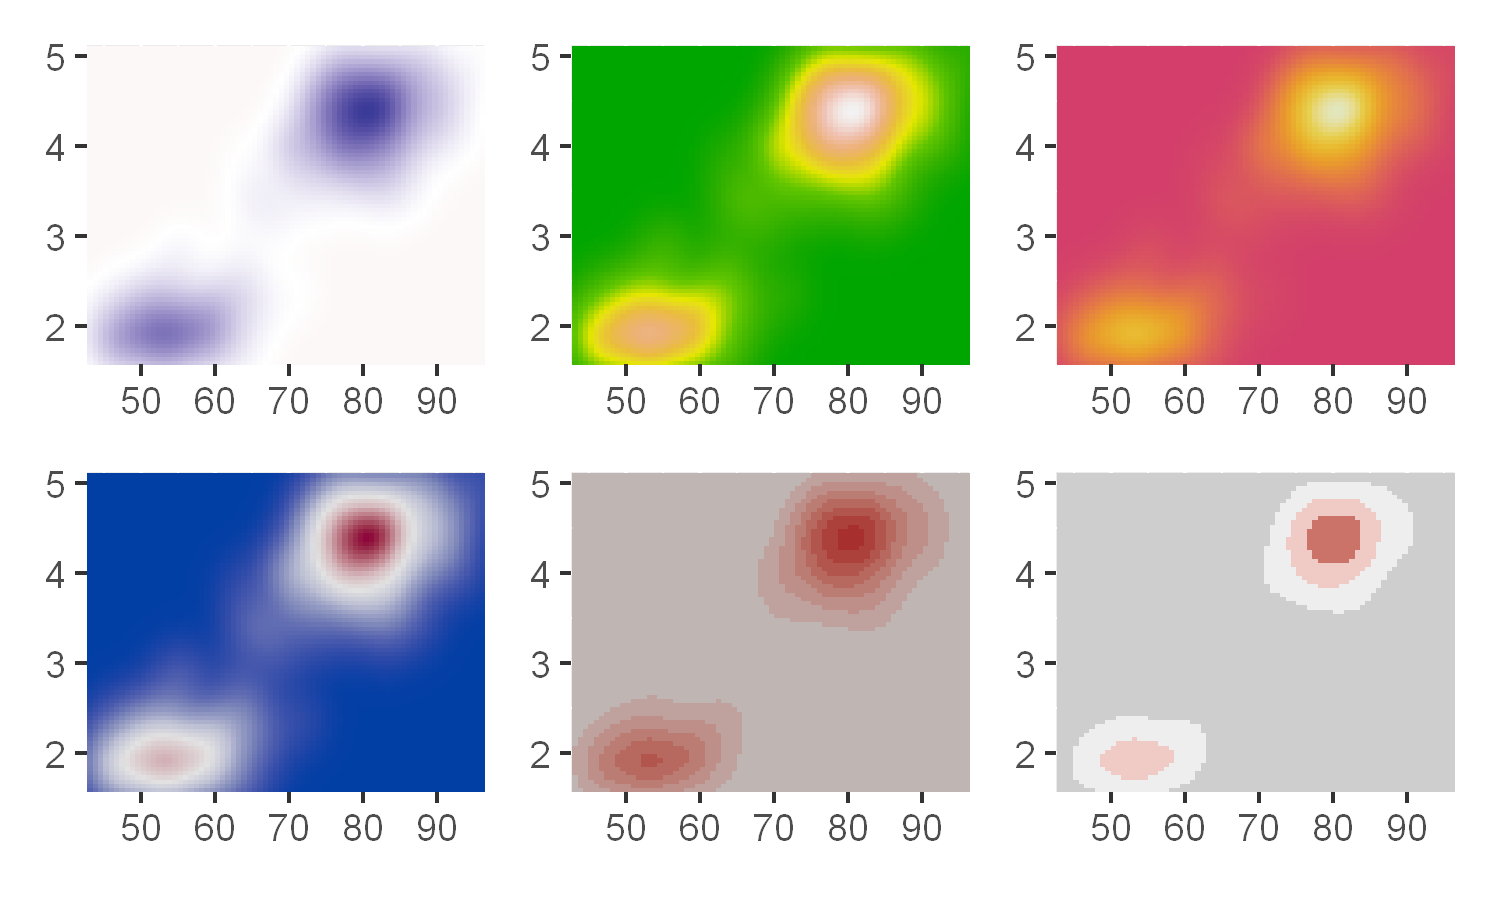

In [56]:
erupt <- ggplot(faithfuld, aes(waiting, eruptions, fill = density)) +
    geom_raster() +
    scale_x_continuous(NULL, expand = c(0, 0)) +
    scale_y_continuous(NULL, expand = c(0, 0)) +
    theme(legend.position = "none")
mid <- median(faithfuld$density)
erupt + scale_fill_gradient2(midpoint = mid)+
erupt + scale_fill_gradientn(colours = terrain.colors(7))+
erupt + scale_fill_gradientn(colours = colorspace::heat_hcl(7))+
erupt + scale_fill_gradientn(colours = colorspace::diverge_hcl(7))+
erupt + scale_fill_steps(low = "grey", high = "brown", n.breaks = 9)+
erupt + 
  scale_fill_steps2(
    low = "grey", 
    mid = "white", 
    high = "brown", 
    midpoint = .02
  )

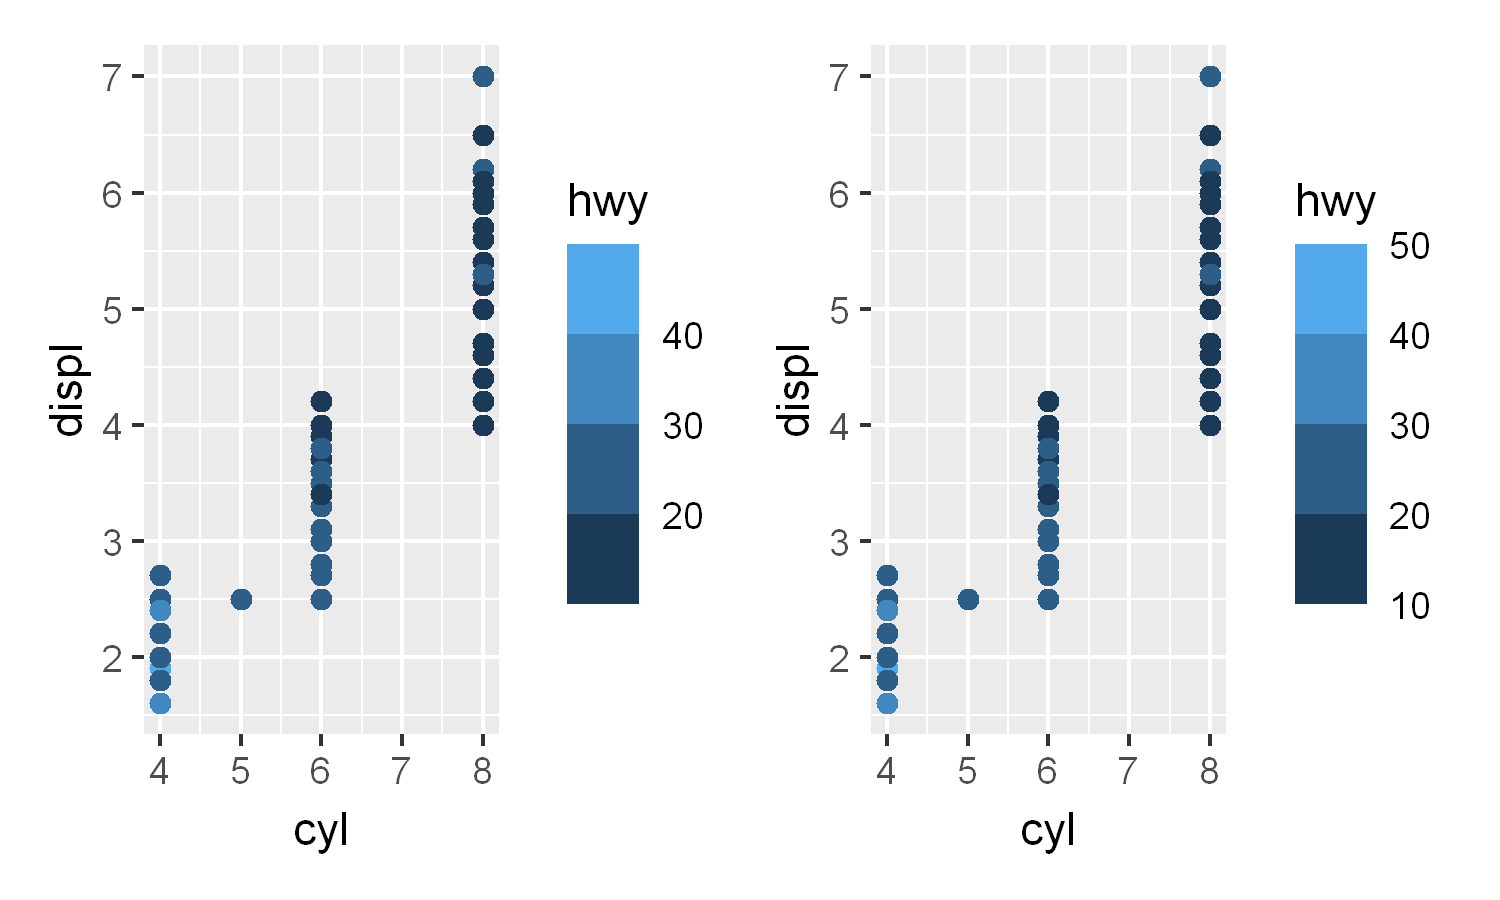

In [57]:
base <- ggplot(mpg, aes(cyl, displ, colour = hwy)) +
  geom_point(size = 2) +
  scale_color_binned()

base+ 
base + guides(colour = guide_coloursteps(show.limits = TRUE))

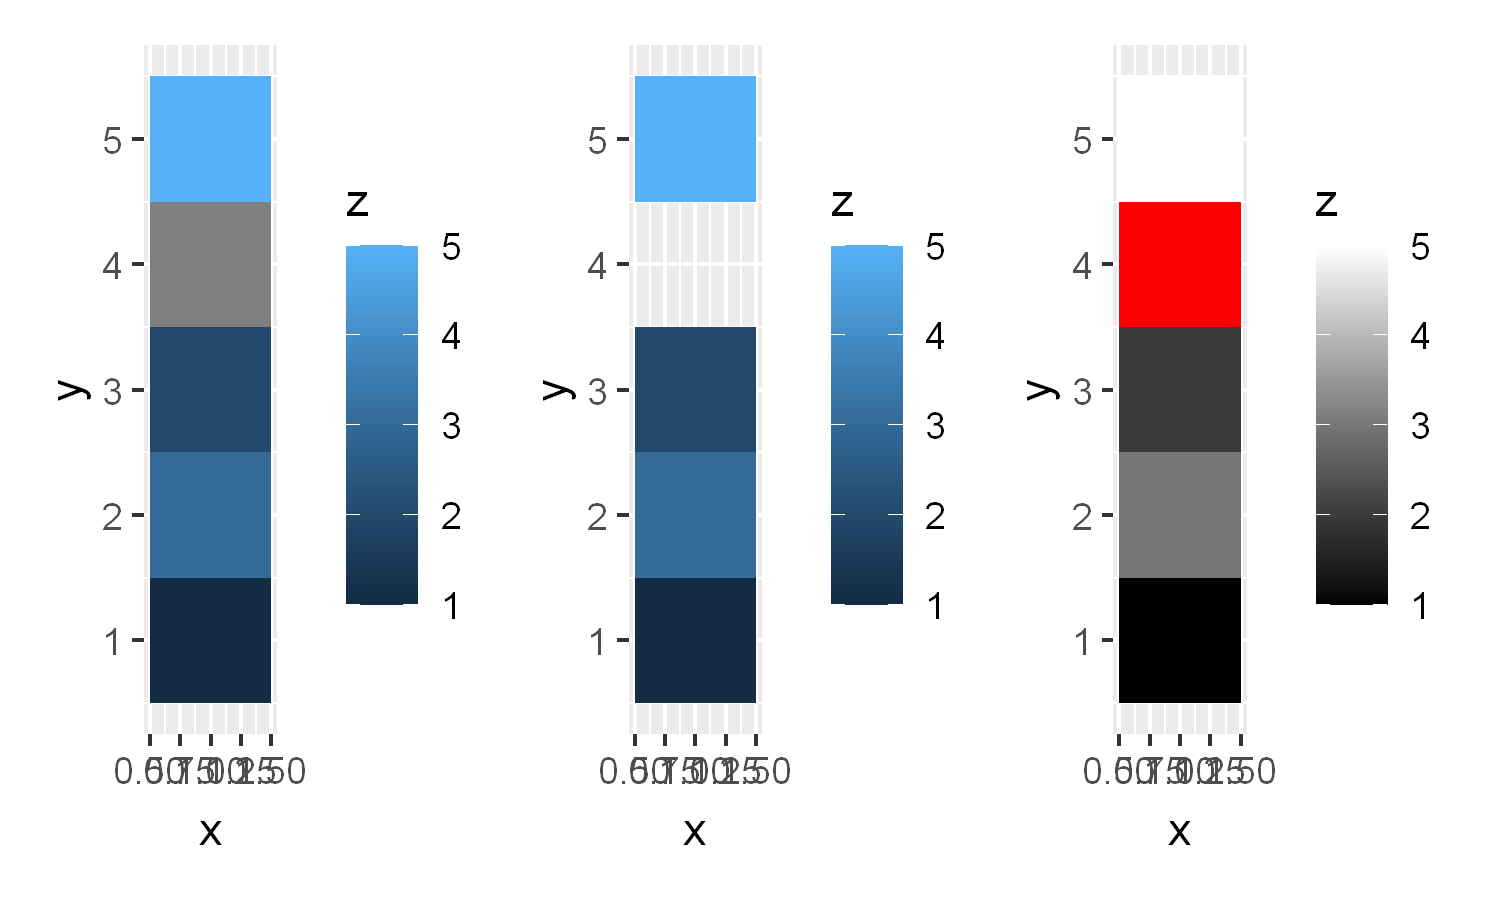

In [58]:
# NA value 
df <- data.frame(x = 1, y = 1:5, z = c(1, 3, 2, NA, 5))
p <- ggplot(df, aes(x, y)) + geom_tile(aes(fill = z), size = 5)
p+
p + scale_fill_gradient(na.value = NA)+
p + scale_fill_gradient(low = "black", high = "white", na.value = "red")

In [59]:
# discrete case
df <- data.frame(x = c("a", "b", "c", "d"), y = c(3, 4, 1, 2))
bars <- ggplot(df, aes(x, y, fill = x)) +
geom_bar(stat = "identity") + labs(x = NULL, y = NULL) +theme(legend.position = "none")

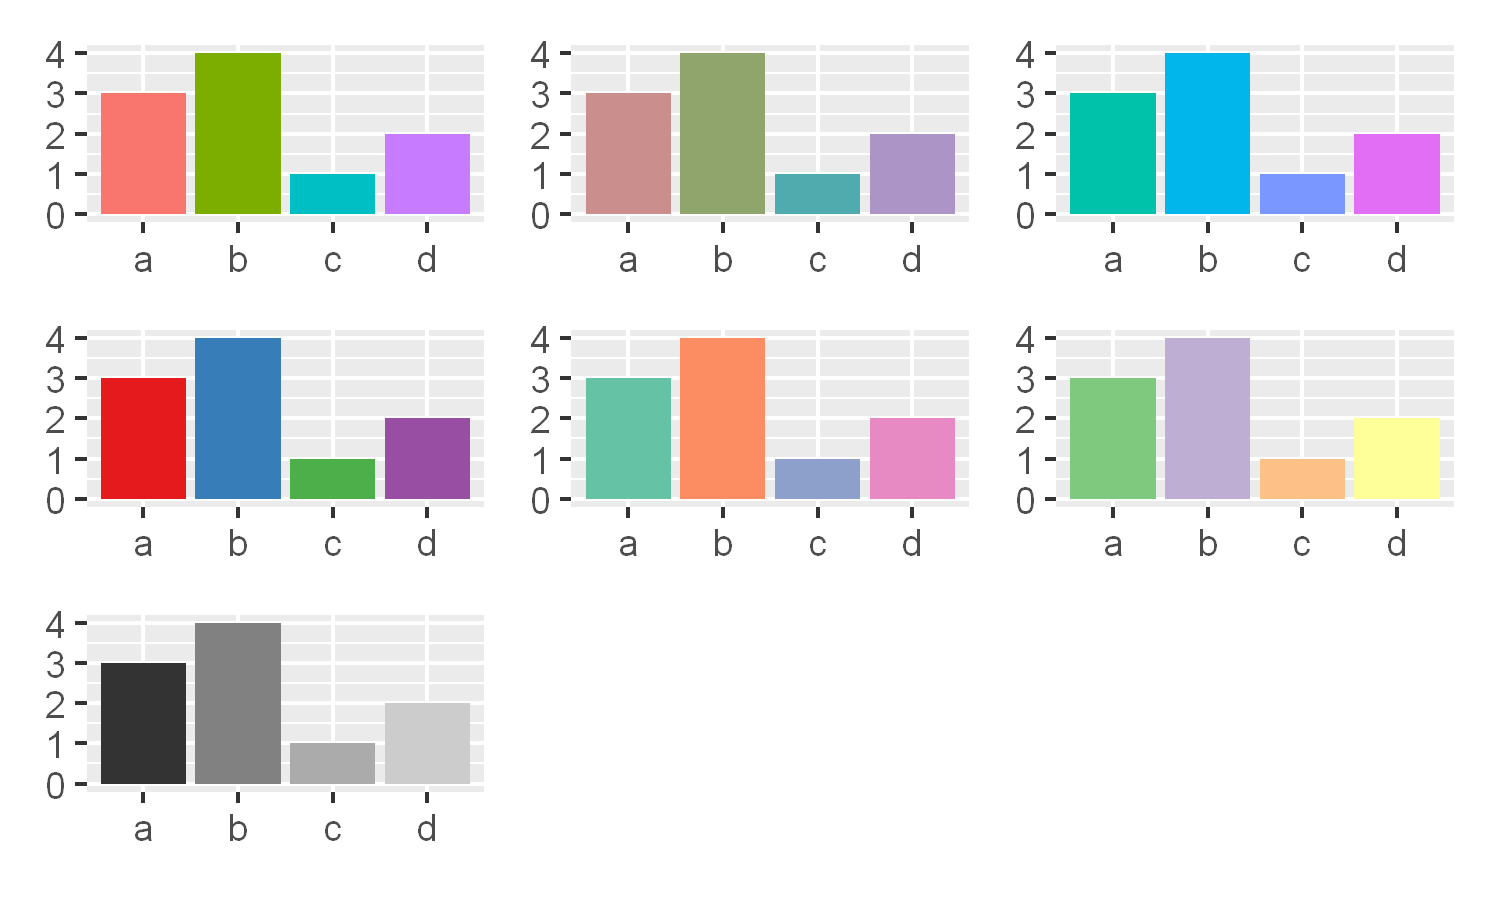

In [60]:
bars+ # evenly spaced color around HCL color wheel ~ 8 color to distiguish
bars + scale_fill_hue(c = 40) +
bars + scale_fill_hue(h = c(180, 300))+
bars + scale_fill_brewer(palette = "Set1")+
bars + scale_fill_brewer(palette = "Set2")+
bars + scale_fill_brewer(palette = "Accent")+ 
bars + scale_fill_grey()

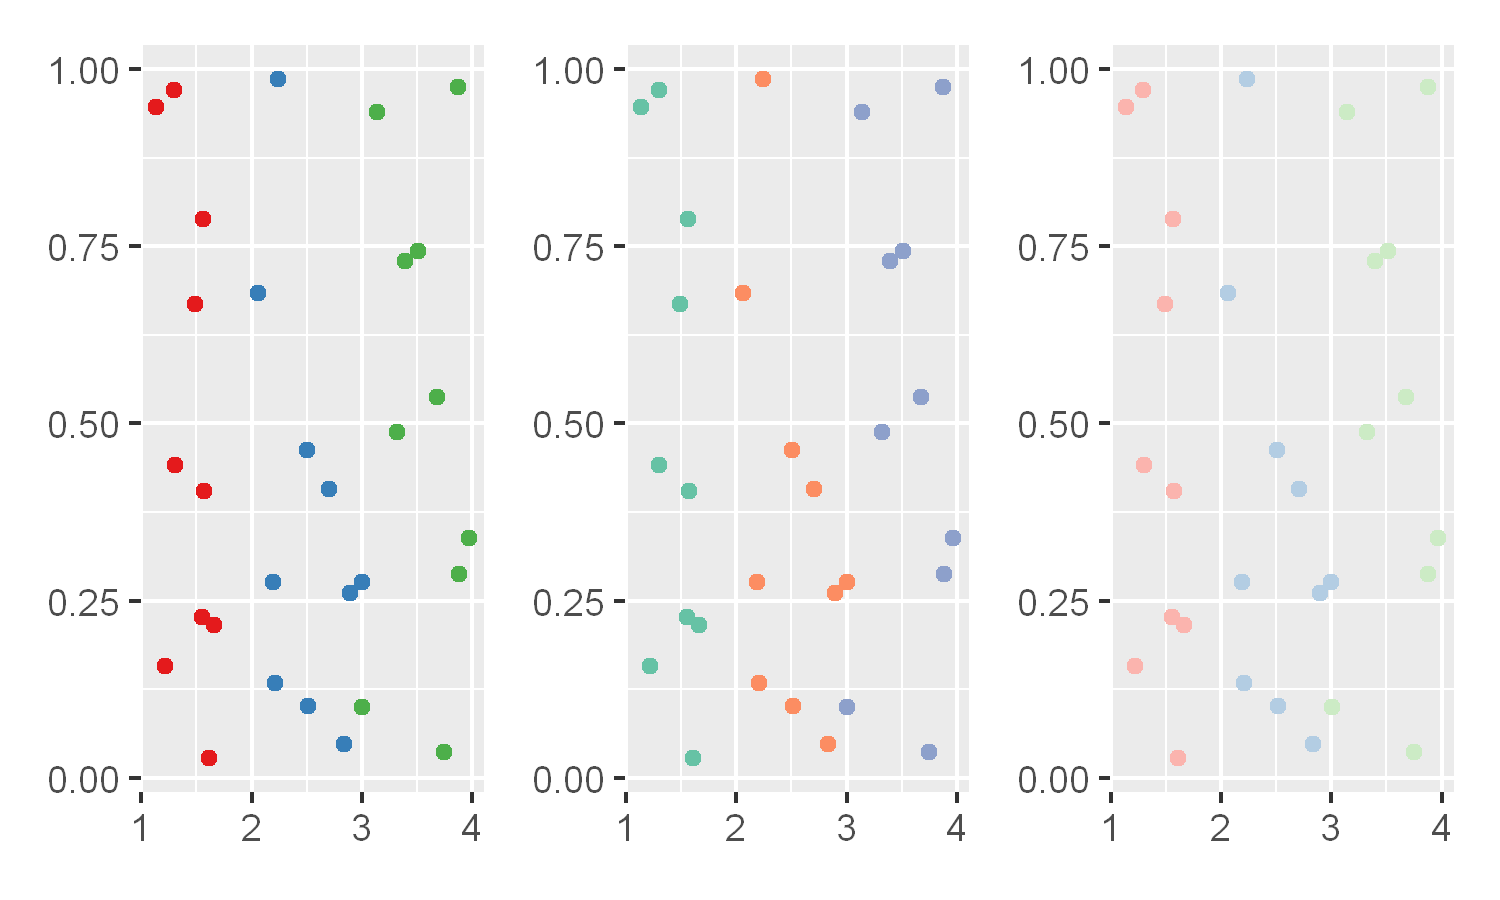

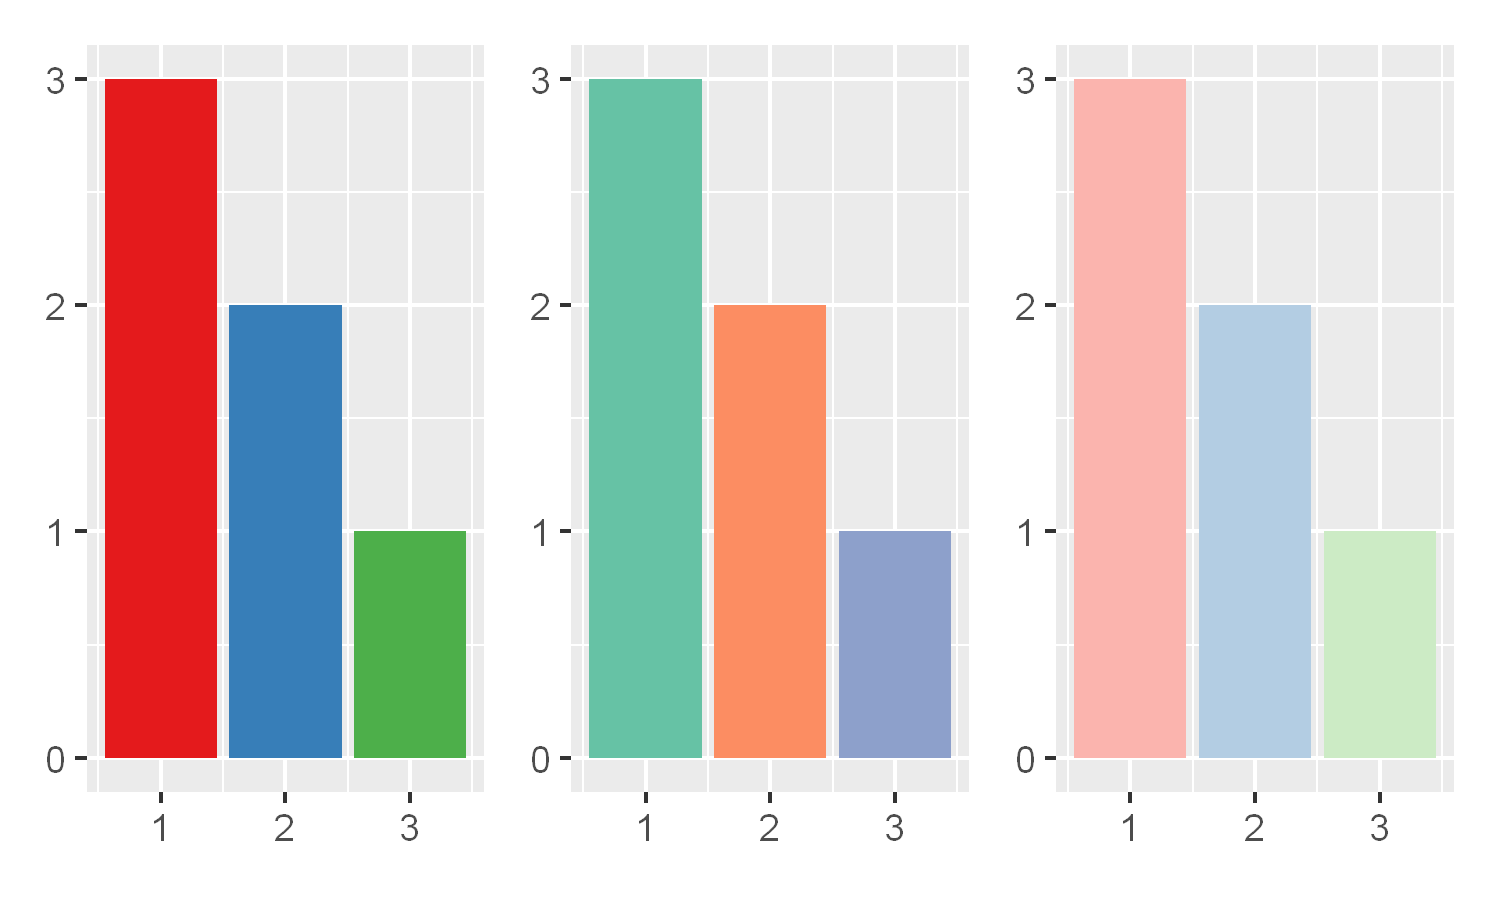

In [61]:
df <- data.frame(x = 1:3 + runif(30), y = runif(30), z = c("a", "b", "c"))
point <- ggplot(df, aes(x, y)) +
geom_point(aes(colour = z)) +
    theme(legend.position = "none") +
    labs(x = NULL, y = NULL)
point + scale_colour_brewer(palette = "Set1")+
point + scale_colour_brewer(palette = "Set2")+
point + scale_colour_brewer(palette = "Pastel1")

# Subtler colours work better with areas
df <- data.frame(x = 1:3, y = 3:1, z = c("a", "b", "c"))
area <- ggplot(df, aes(x, y)) +
geom_bar(aes(fill = z), stat = "identity") +
    theme(legend.position = "none") +
    labs(x = NULL, y = NULL)
area + scale_fill_brewer(palette = "Set1")+
area + scale_fill_brewer(palette = "Set2")+
area + scale_fill_brewer(palette = "Pastel1")

### scale_color_manual()
scale scale_linetype(), scale_shape(), and scale_size_discrete() no options

Warning message:
"Removed 27 rows containing missing values (`geom_point()`)."
Warning message:
"Removed 27 rows containing missing values (`geom_point()`)."


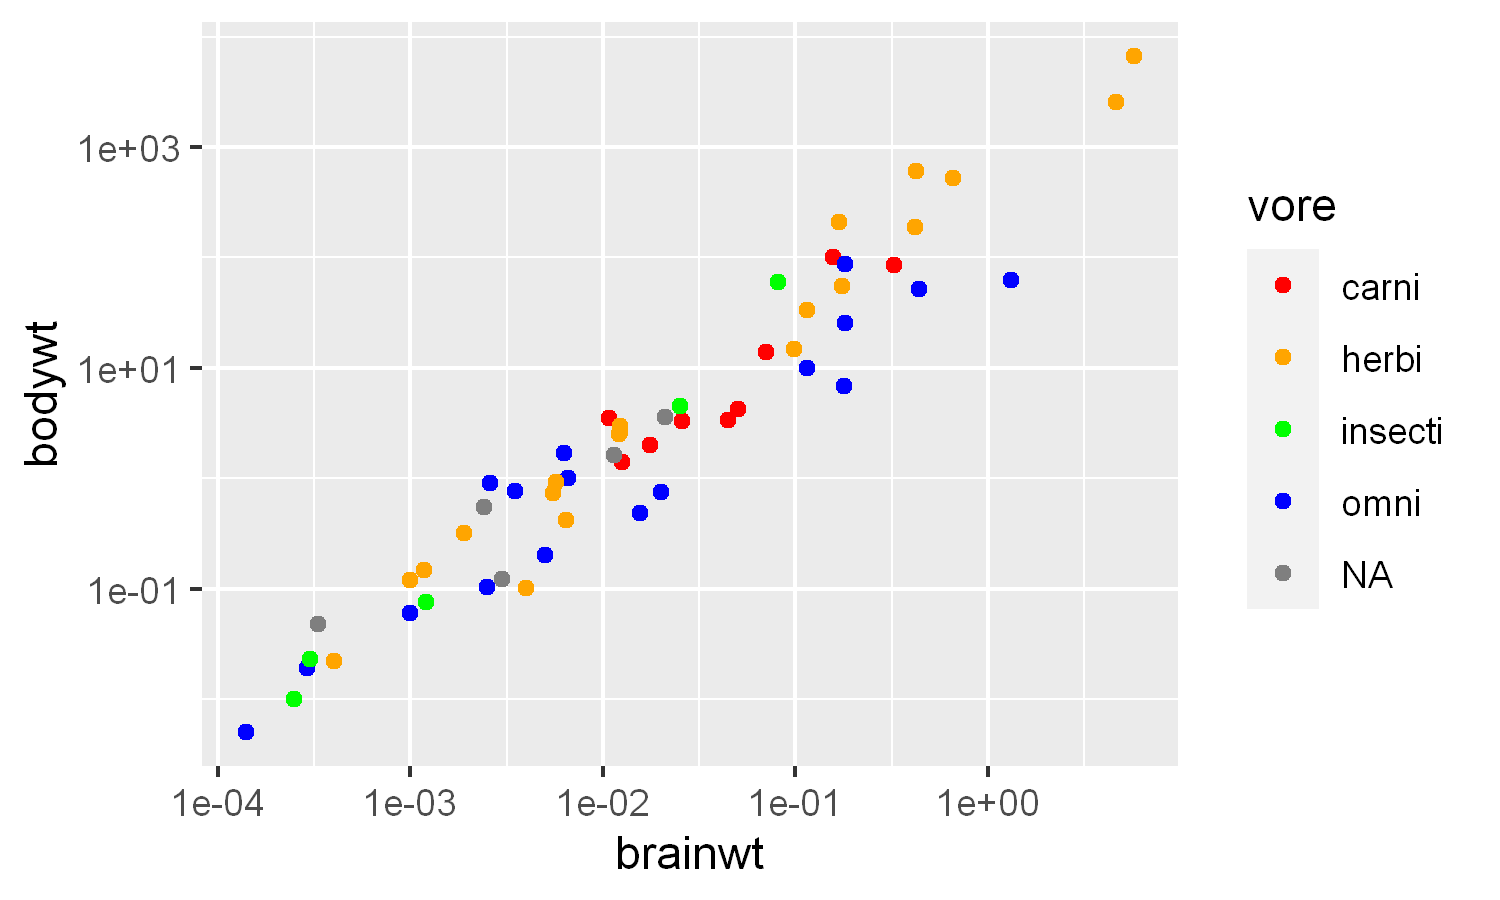

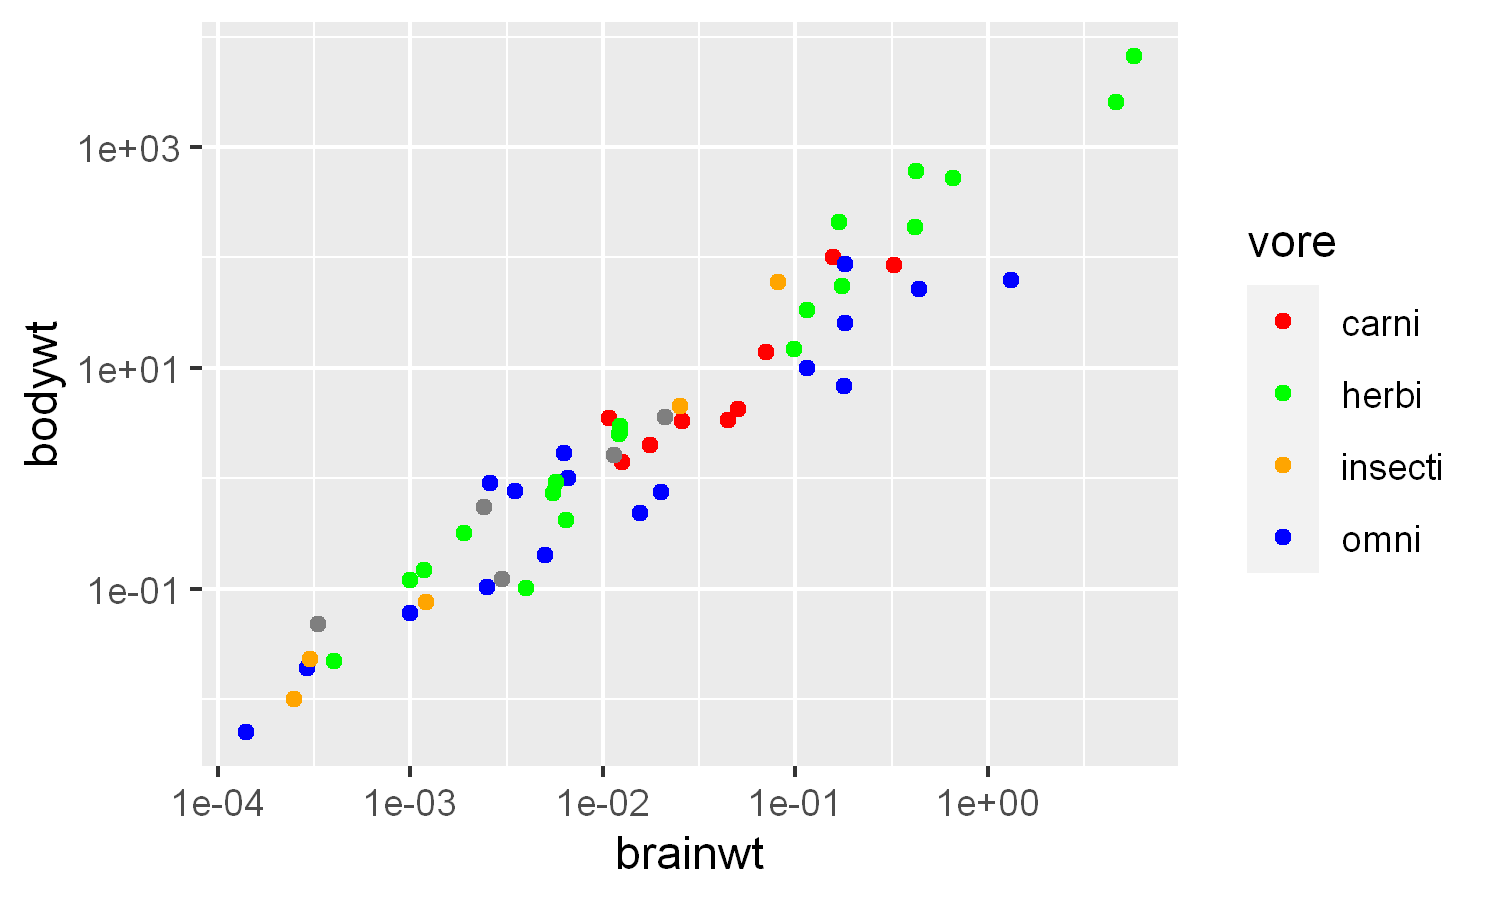

In [62]:
# Using scale color manual
plot <- ggplot(msleep, aes(brainwt, bodywt)) +scale_x_log10() +scale_y_log10()
plot +
    geom_point(aes(colour = vore)) +
    scale_colour_manual(
    values = c("red", "orange", "green", "blue"),
    na.value = "grey50"
    )
#> Warning: Removed 27 rows containing missing values (geom_point).
colours <- c(
carni = "red",
insecti = "orange",
herbi = "green",
omni = "blue"
)
plot +
    geom_point(aes(colour = vore)) +
    scale_colour_manual(values = colours)

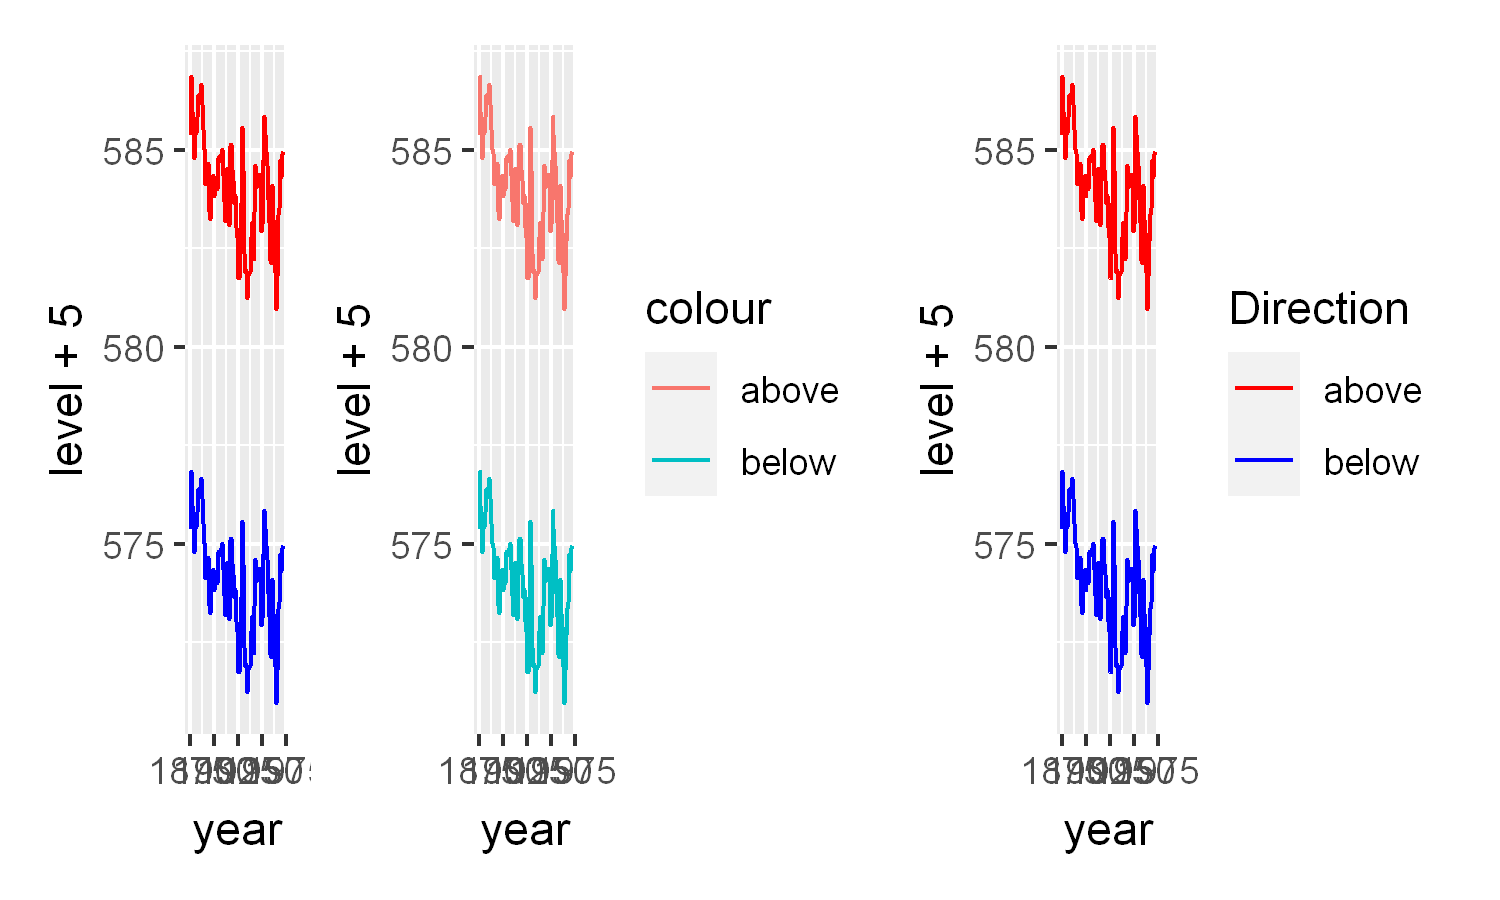

In [63]:
# legend specification in line plot
huron <- data.frame(year = 1875:1972, level = as.numeric(LakeHuron))
ggplot(huron, aes(year)) +
geom_line(aes(y = level + 5), colour = "red") +
geom_line(aes(y = level - 5), colour = "blue")+
ggplot(huron, aes(year)) +
geom_line(aes(y = level + 5, colour = "above")) +
geom_line(aes(y = level - 5, colour = "below"))+
ggplot(huron, aes(year)) +
geom_line(aes(y = level + 5, colour = "above")) +
geom_line(aes(y = level - 5, colour = "below")) +
scale_colour_manual("Direction",
values = c("above" = "red", "below" = "blue")
)

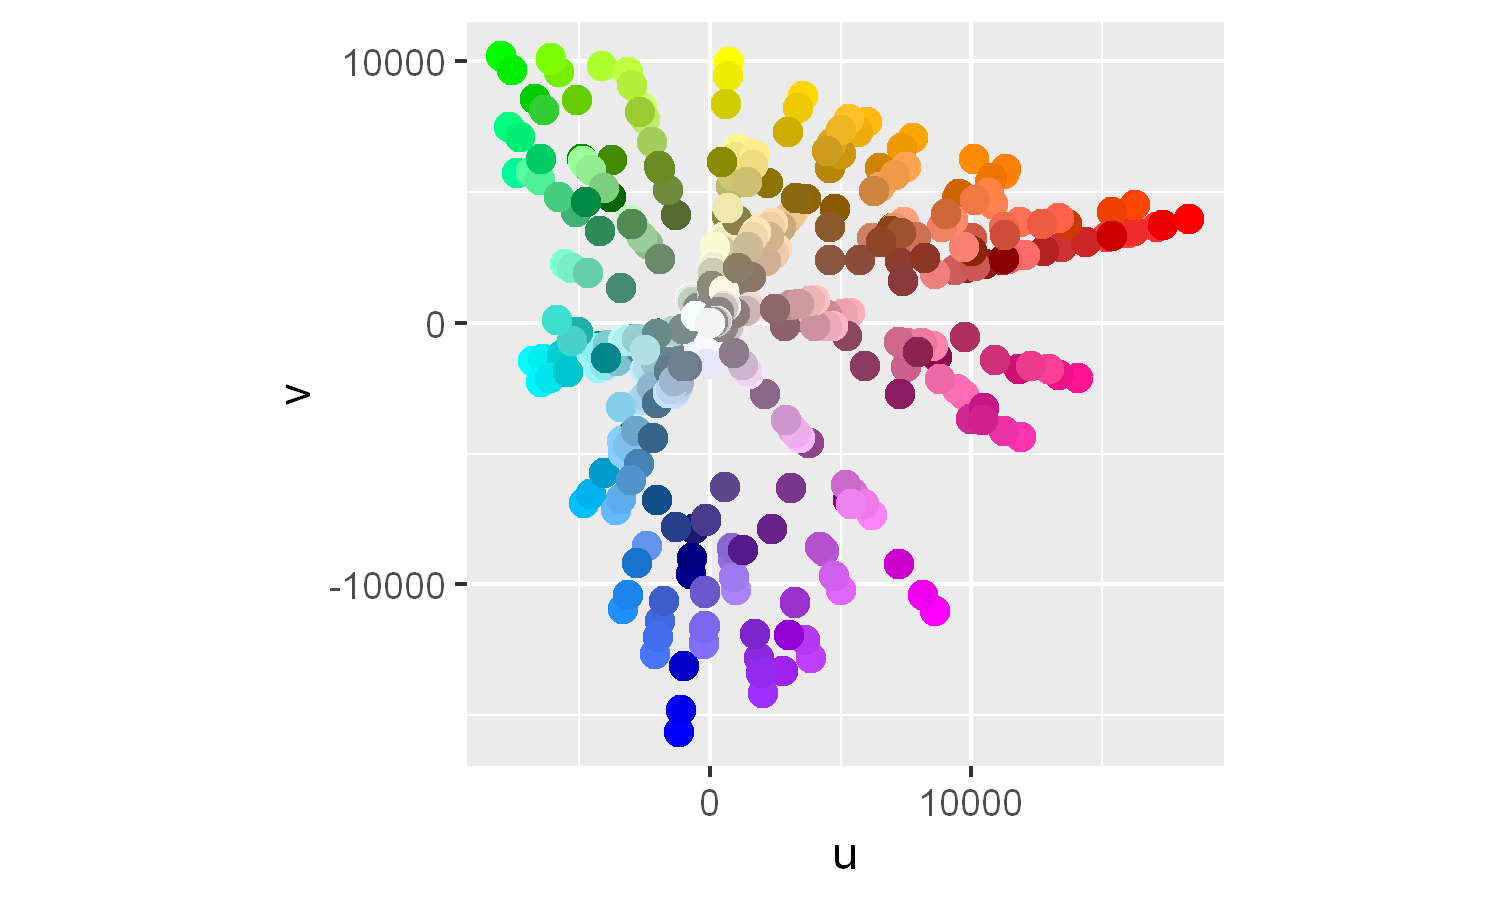

In [64]:
# scale_color_identity()
# data is already scaled, when the data and aesthetic spaces are the same.
ggplot(luv_colours, aes(u, v)) +
    geom_point(aes(colour = col), size = 3) +
    scale_color_identity() +
    coord_equal()

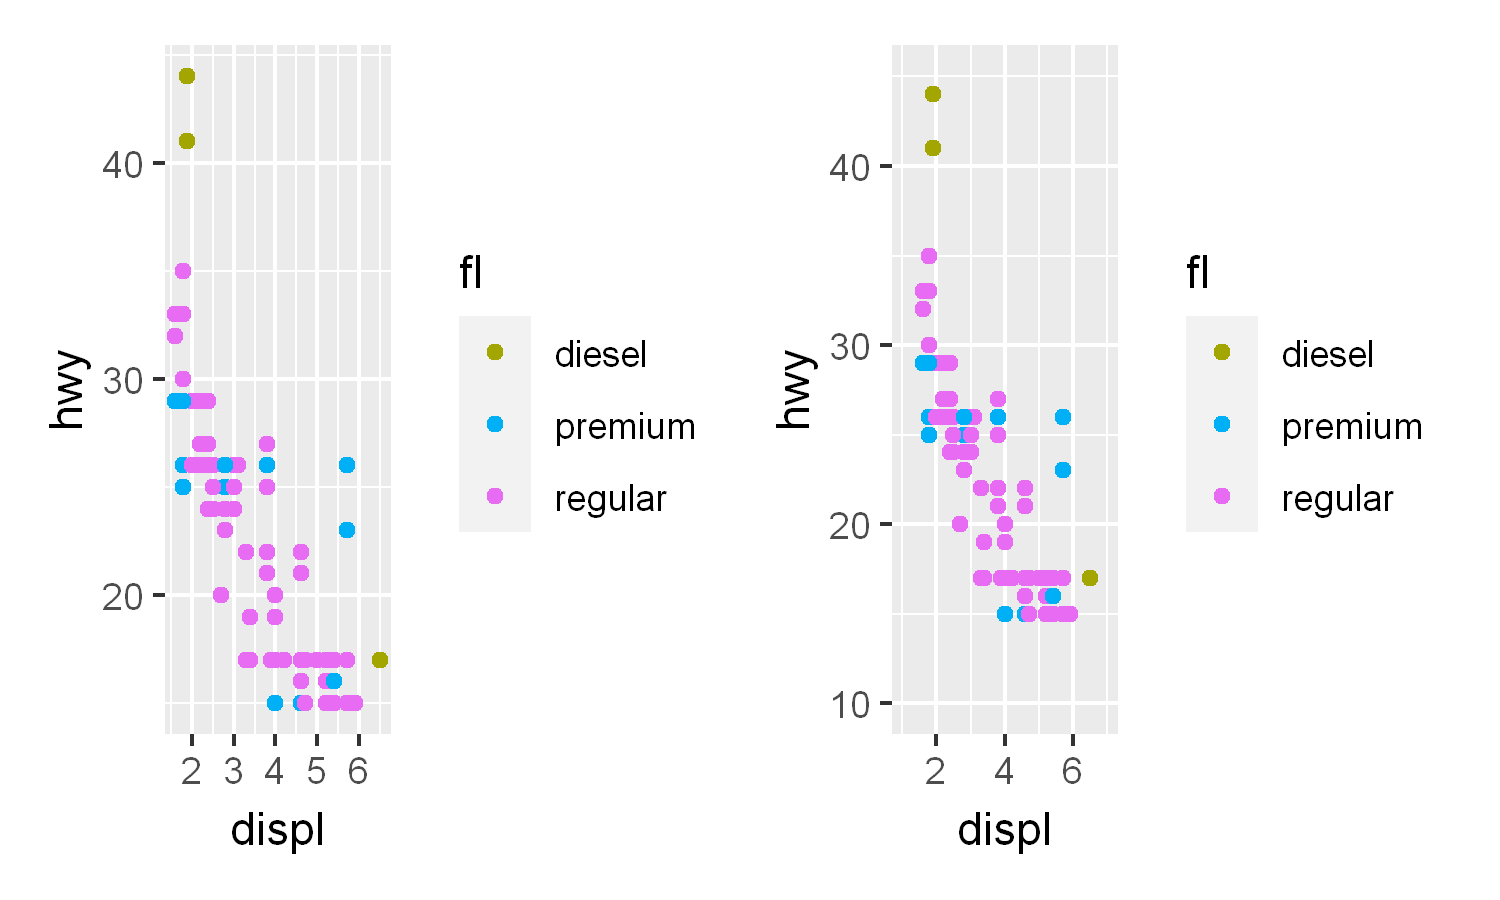

In [65]:
base_99 <- ggplot(mpg %>% filter(year == 1999),
                  aes(displ, hwy, colour = fl)) + geom_point() 
base_99+
  scale_color_discrete(
    limits = c("c", "d", "e", "p", "r"), 
    breaks = c("d", "p", "r"),
    labels = c("diesel", "premium", "regular")
  )+
base_99 + 
  lims(x = c(1, 7), y = c(10, 45)) +
  scale_color_discrete(
    limits = c("c", "d", "e", "p", "r"), 
    breaks = c("d", "p", "r"),
    labels = c("diesel", "premium", "regular")
  )

## Alpha scale
transparency of a shade to a value in the data.
     visually down-weight less important observations. scale_alpha() is an alias for scale_alpha_continuous()

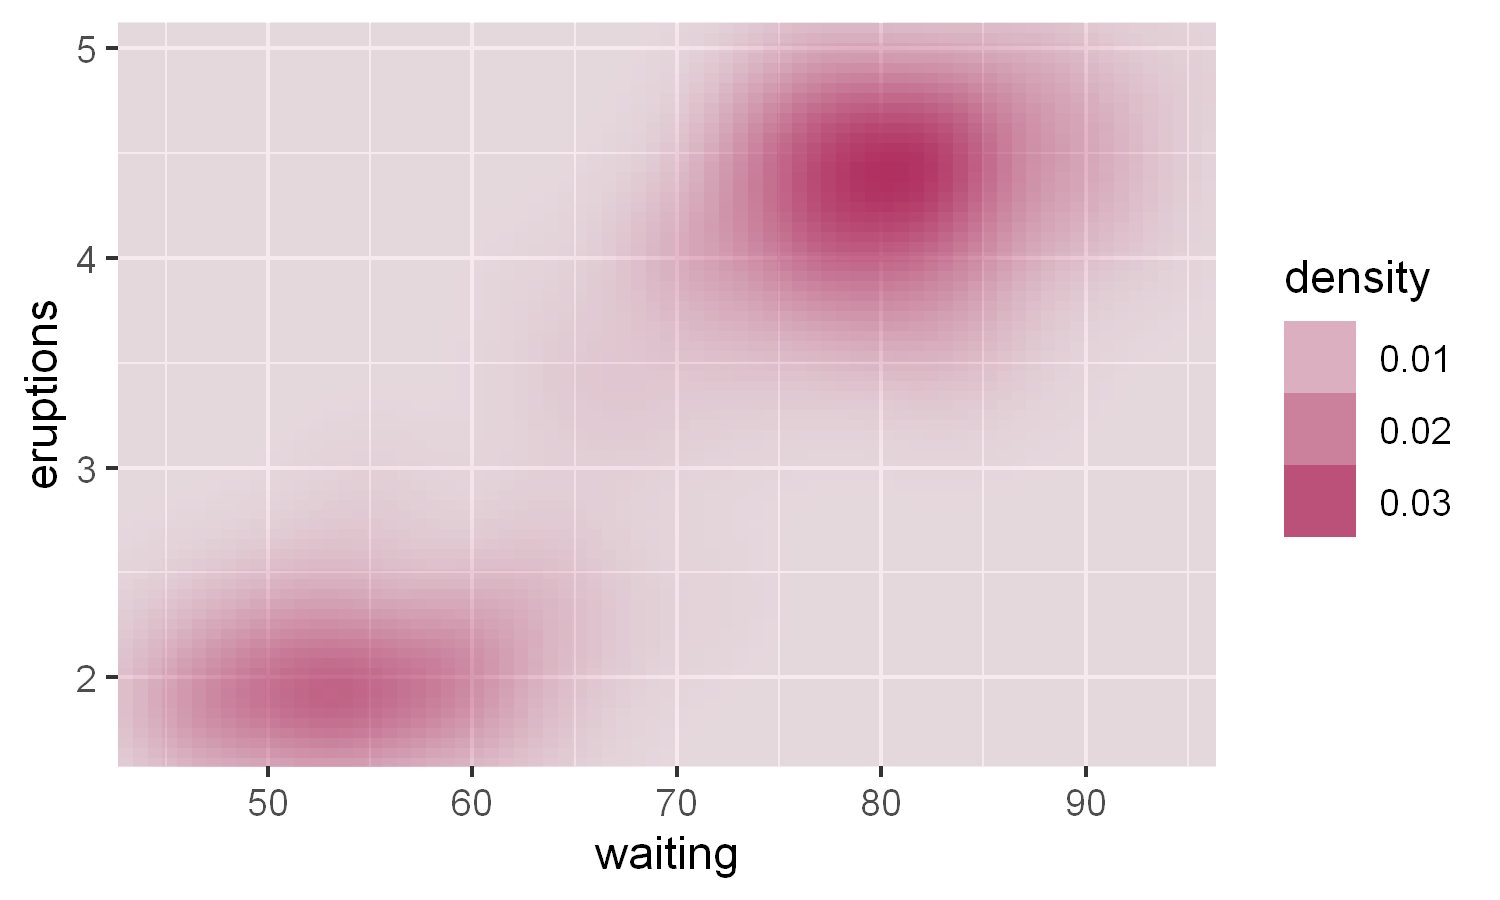

In [66]:
ggplot(faithfuld, aes(waiting, eruptions, alpha = density)) +
  geom_raster(fill = "maroon") +
  scale_x_continuous(expand = c(0, 0)) + 
  scale_y_continuous(expand = c(0, 0))

## Scale transformation

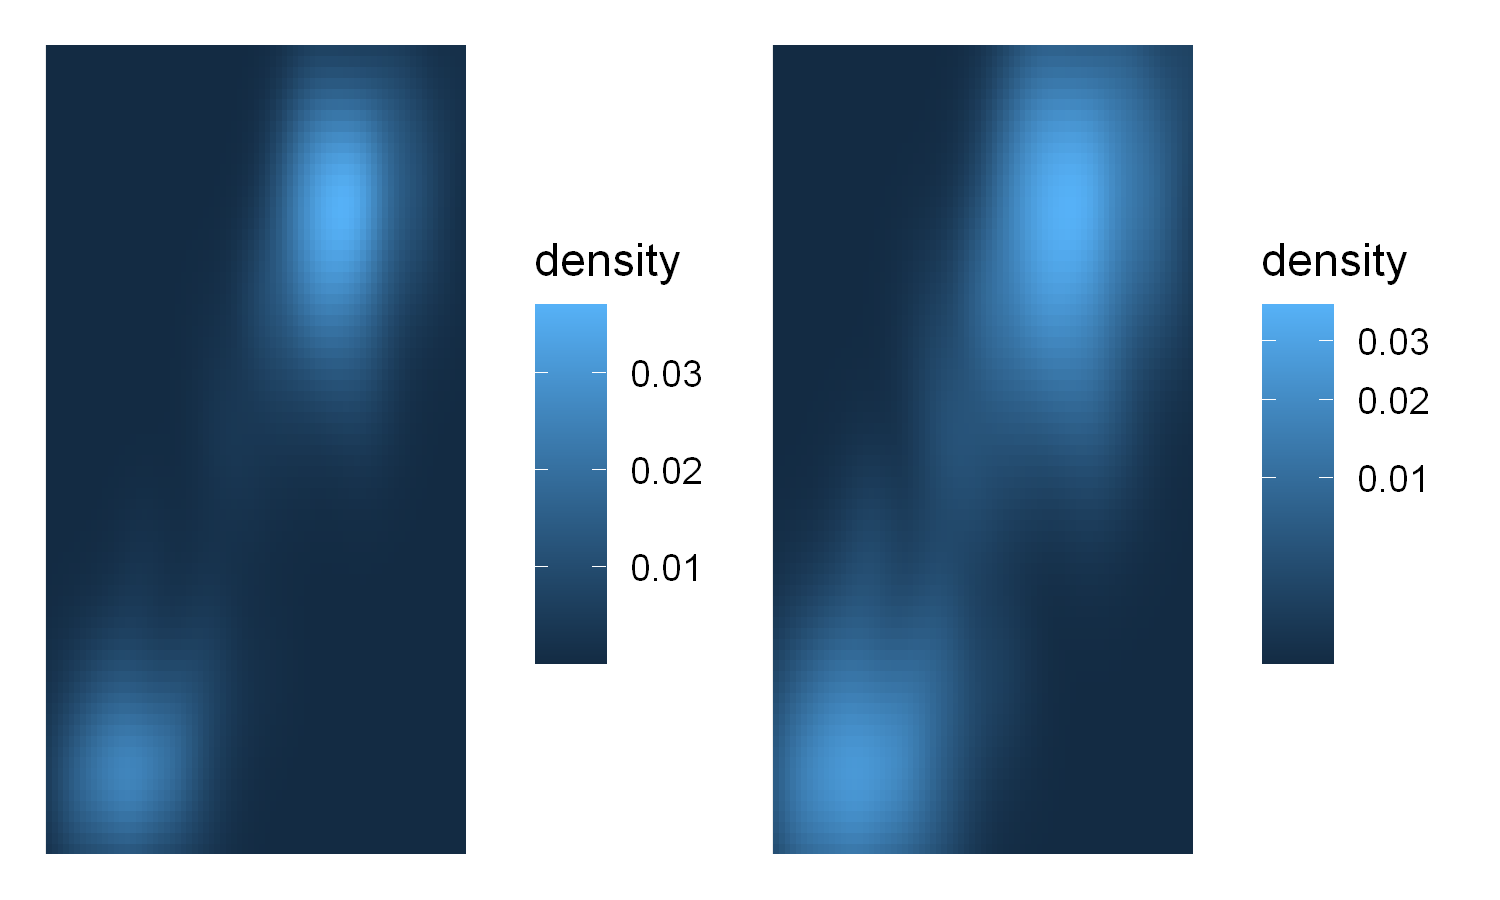

In [67]:
# continuous 
base <- ggplot(faithfuld, aes(waiting, eruptions)) + 
  geom_raster(aes(fill = density)) + 
  scale_x_continuous(NULL, NULL, expand = c(0, 0)) +
  scale_y_continuous(NULL, NULL, expand = c(0, 0))
base+
base + scale_fill_continuous(trans = "sqrt")
# trans = reverse for categorical

# Position adjustment

# Coordinate Adjustment

1. Linear

    coord_cartesian(): the default Cartesian coordinate system, specify xlim ylim

    coord_flip(): Cartesian coordinate system with x and y axes flipped.

    coord_fixed(): Cartesian coordinate system with a fixed aspect ratio.
2. Nonlinear


    coord_map()/coord_quickmap()/coord_sf(): Map projections.

    coord_polar(): Polar coordinates.

    coord_trans(): Apply arbitrary transformations to x and y positions, after the data has been processed by the stat.


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


[1] "\nExchanging cty and displ rotates the plot 90 degrees, but the smooth \n"

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


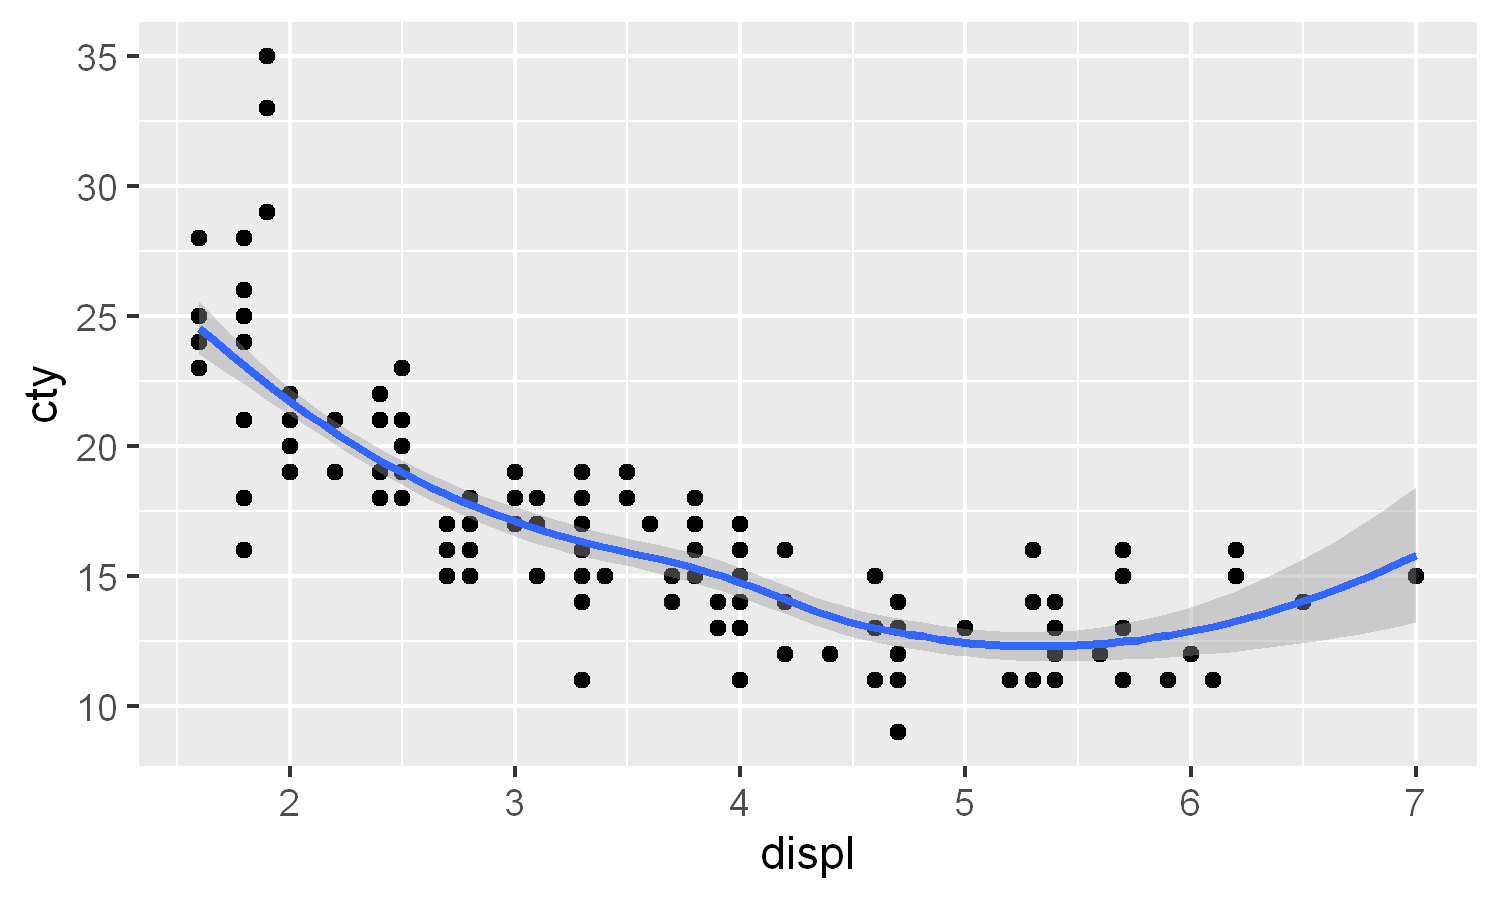

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


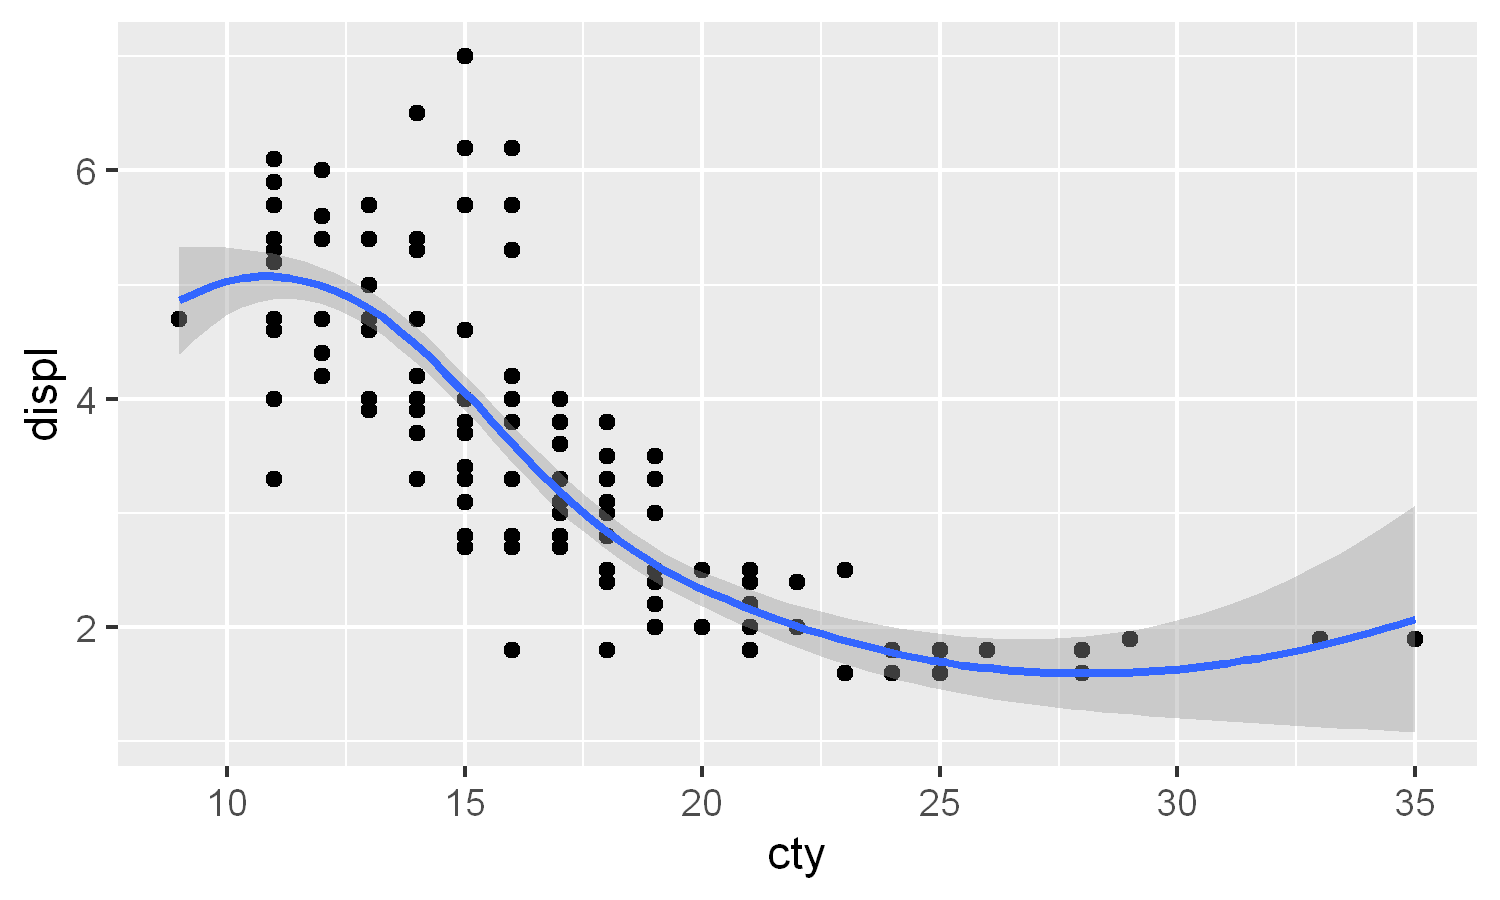

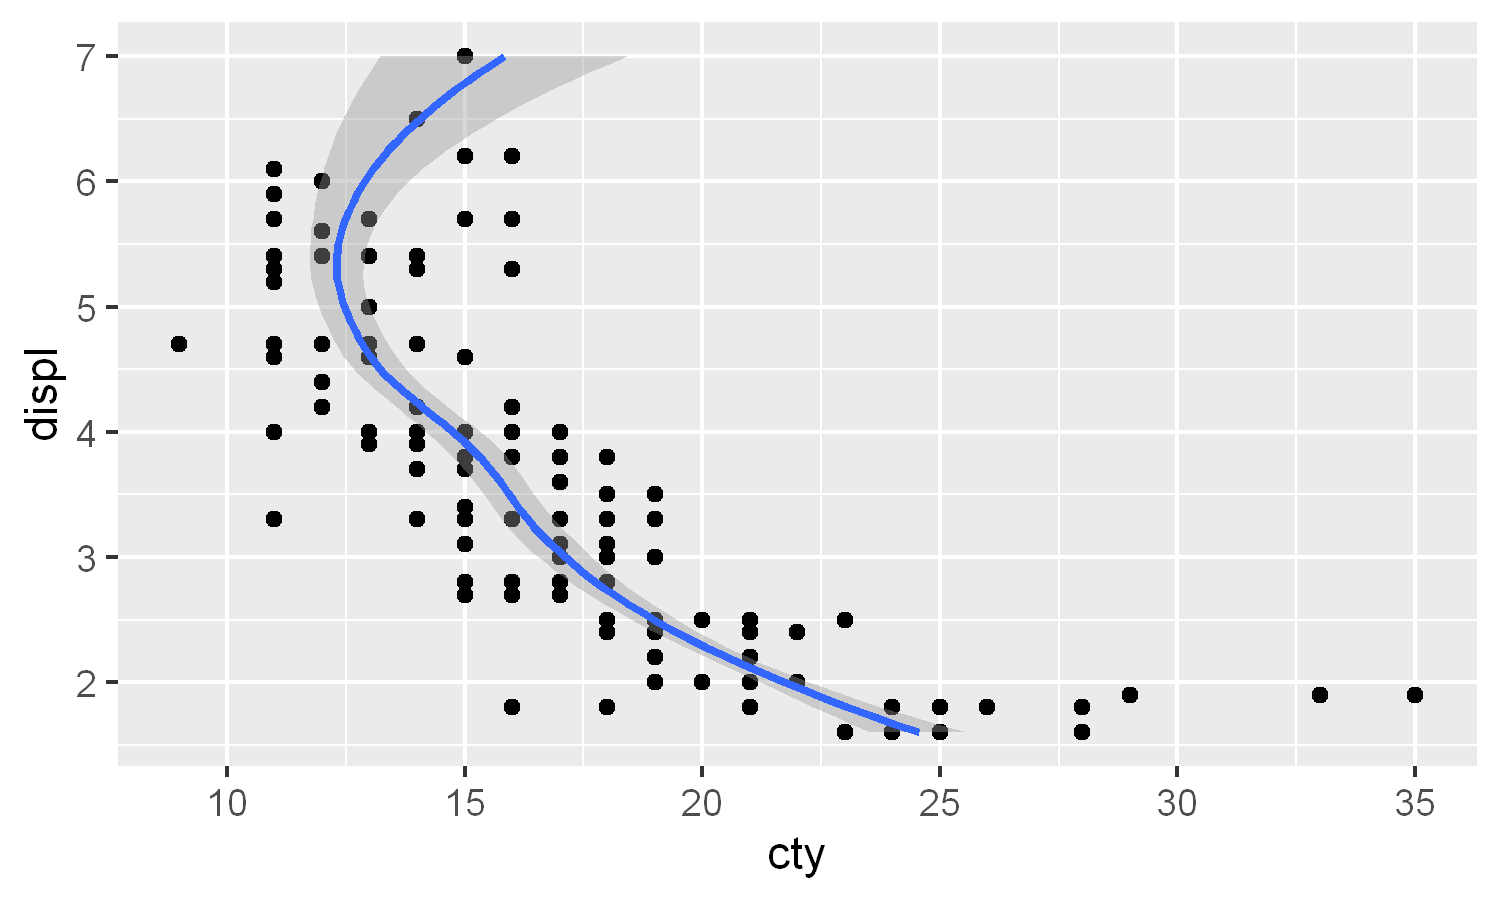

In [74]:
ggplot(mpg, aes(displ, cty)) + 
  geom_point() + 
  geom_smooth()
"
Exchanging cty and displ rotates the plot 90 degrees, but the smooth 
"
ggplot(mpg, aes(cty, displ)) + 
  geom_point() + 
  geom_smooth()
#> `geom_smooth()` using method = 'loess' and formula = 'y ~ x'
# coord_flip() fits the smooth to the original data, and then rotates  the output
ggplot(mpg, aes(displ, cty)) + 
  geom_point() + 
  geom_smooth() + 
  coord_flip()

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


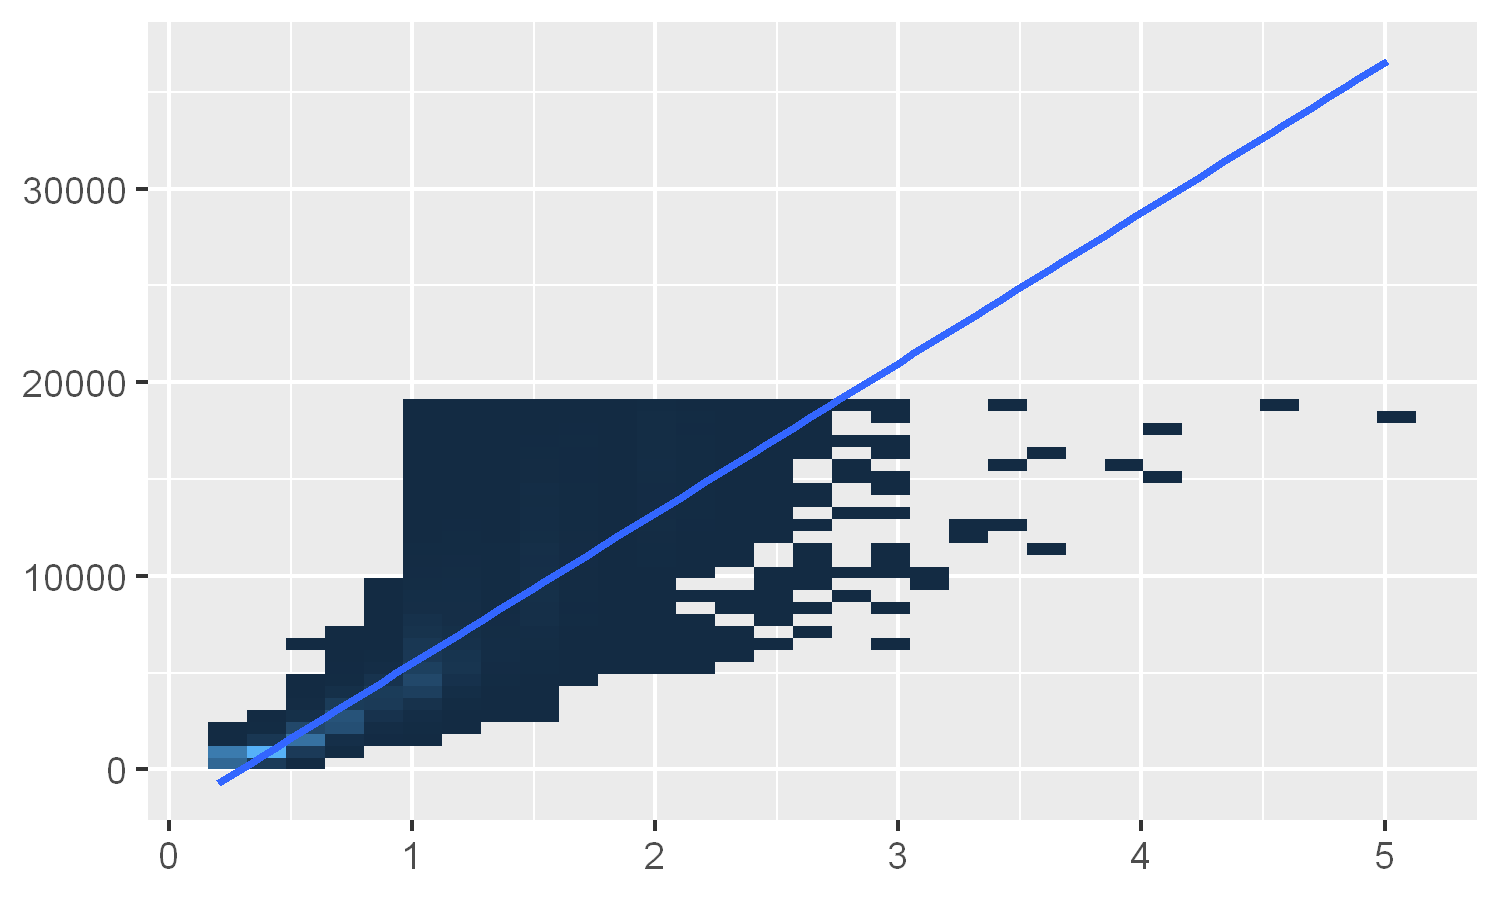

`geom_smooth()` using formula = 'y ~ x'


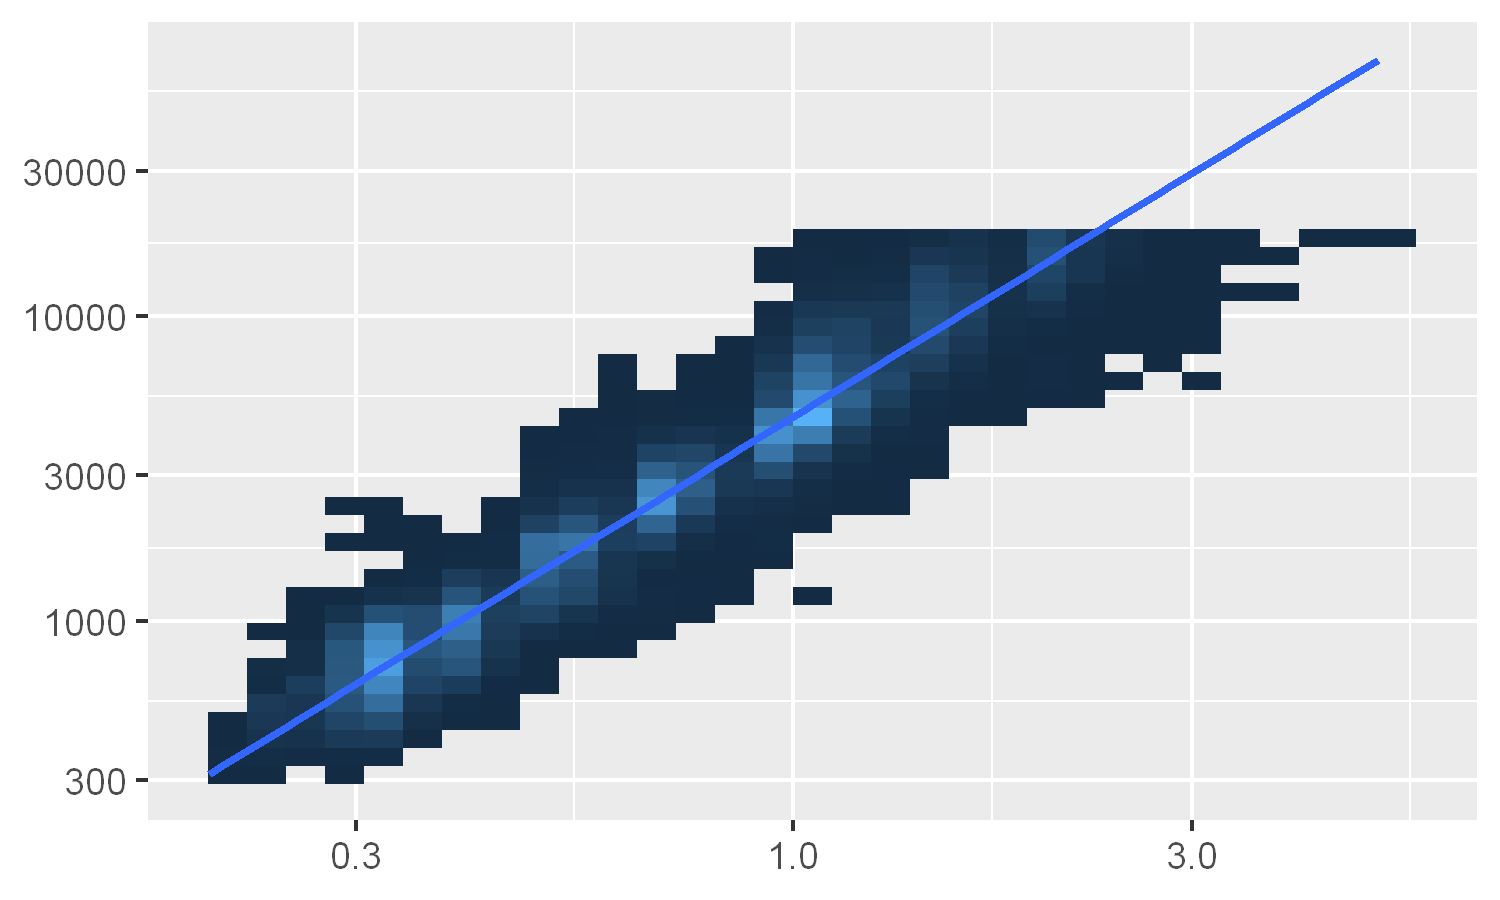

<ggproto object: Class CoordTrans, Coord, gg>
    aspect: function
    backtransform_range: function
    clip: on
    default: FALSE
    distance: function
    expand: TRUE
    is_free: function
    is_linear: function
    labels: function
    limits: list
    modify_scales: function
    range: function
    render_axis_h: function
    render_axis_v: function
    render_bg: function
    render_fg: function
    setup_data: function
    setup_layout: function
    setup_panel_guides: function
    setup_panel_params: function
    setup_params: function
    train_panel_guides: function
    trans: list
    transform: function
    super:  <ggproto object: Class CoordTrans, Coord, gg>

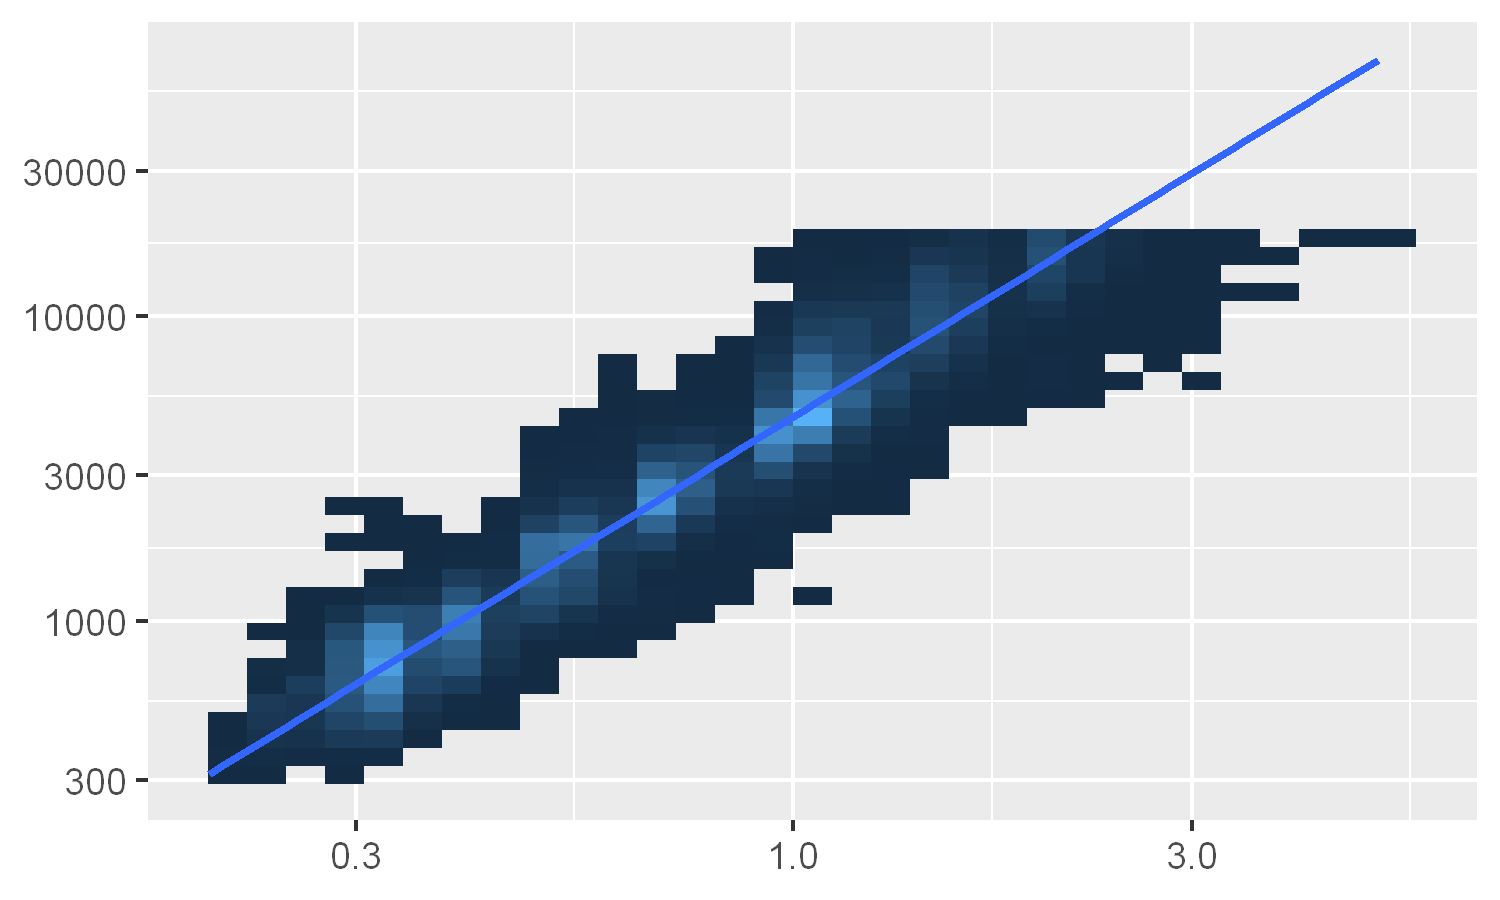

In [75]:
# library(dplyr, warn.conflicts=FALSE) 
# suppressPackageStartupMessages(library(ggplot2))

base <- ggplot(diamonds, aes(carat, price)) + 
  stat_bin2d() + 
  geom_smooth(method = "lm") + 
  xlab(NULL) + 
  ylab(NULL) + 
  theme(legend.position = "none")
base

# Better fit on log scale, but harder to interpret
base +
  scale_x_log10() + 
  scale_y_log10()

# Fit on log scale, then backtransform to original.
# Highlights lack of expensive diamonds with large carats
pow10 <- scales::exp_trans(10)
base +
  scale_x_log10() + 
  scale_y_log10() 
  coord_trans(x = pow10, y = pow10)


# Facetting


    facet_null(): a single plot, the default.

    facet_wrap(): “wraps” a 1d ribbon of panels into 2d.

    facet_grid(): produces a 2d grid of panels defined by variables which form the rows y and columns z.


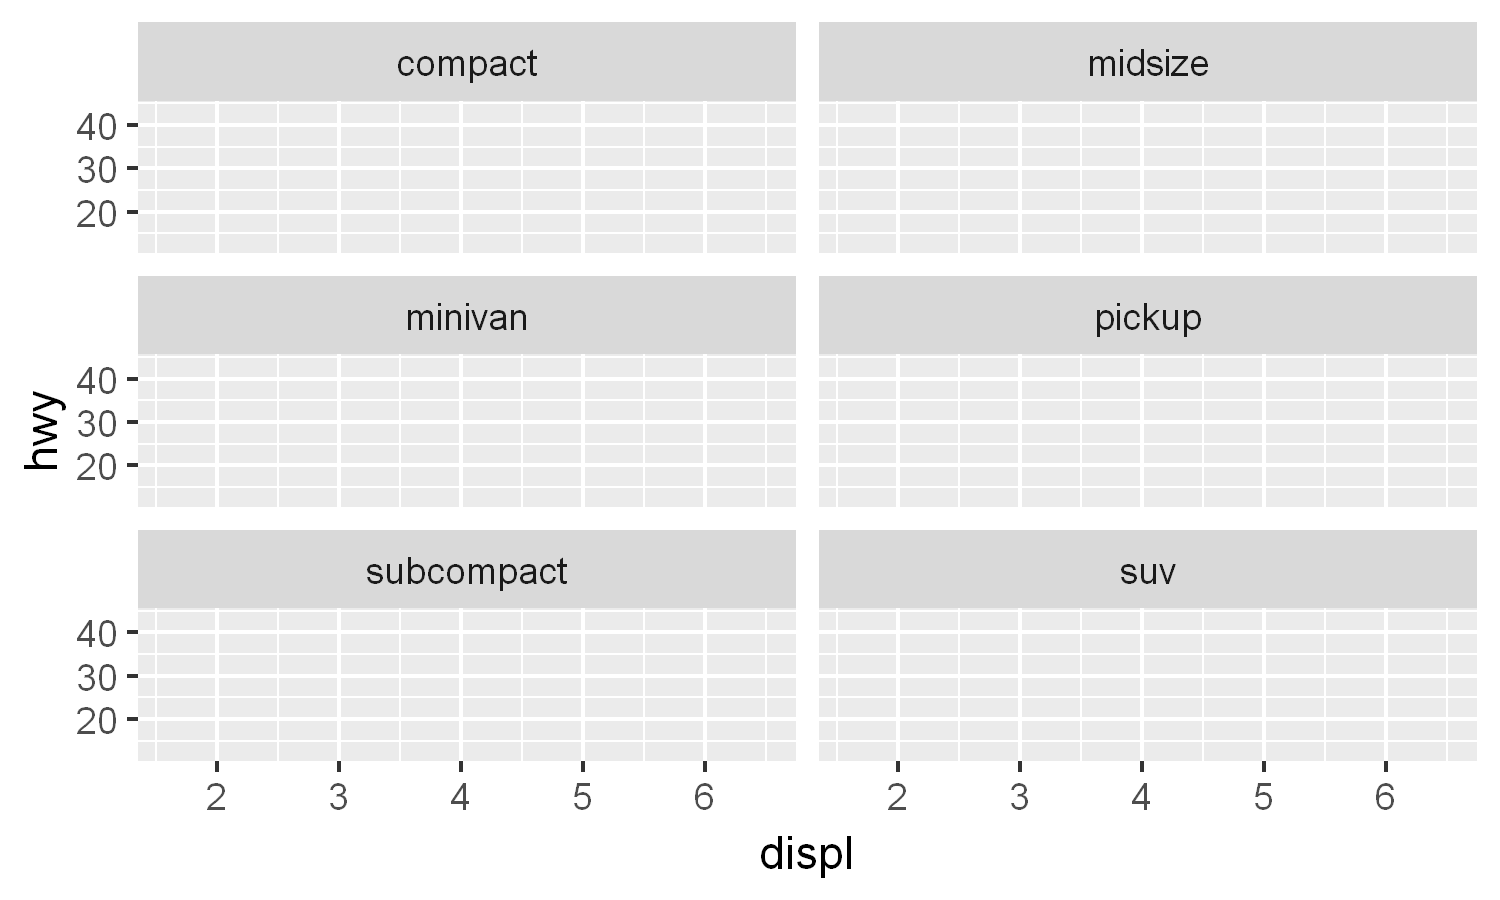

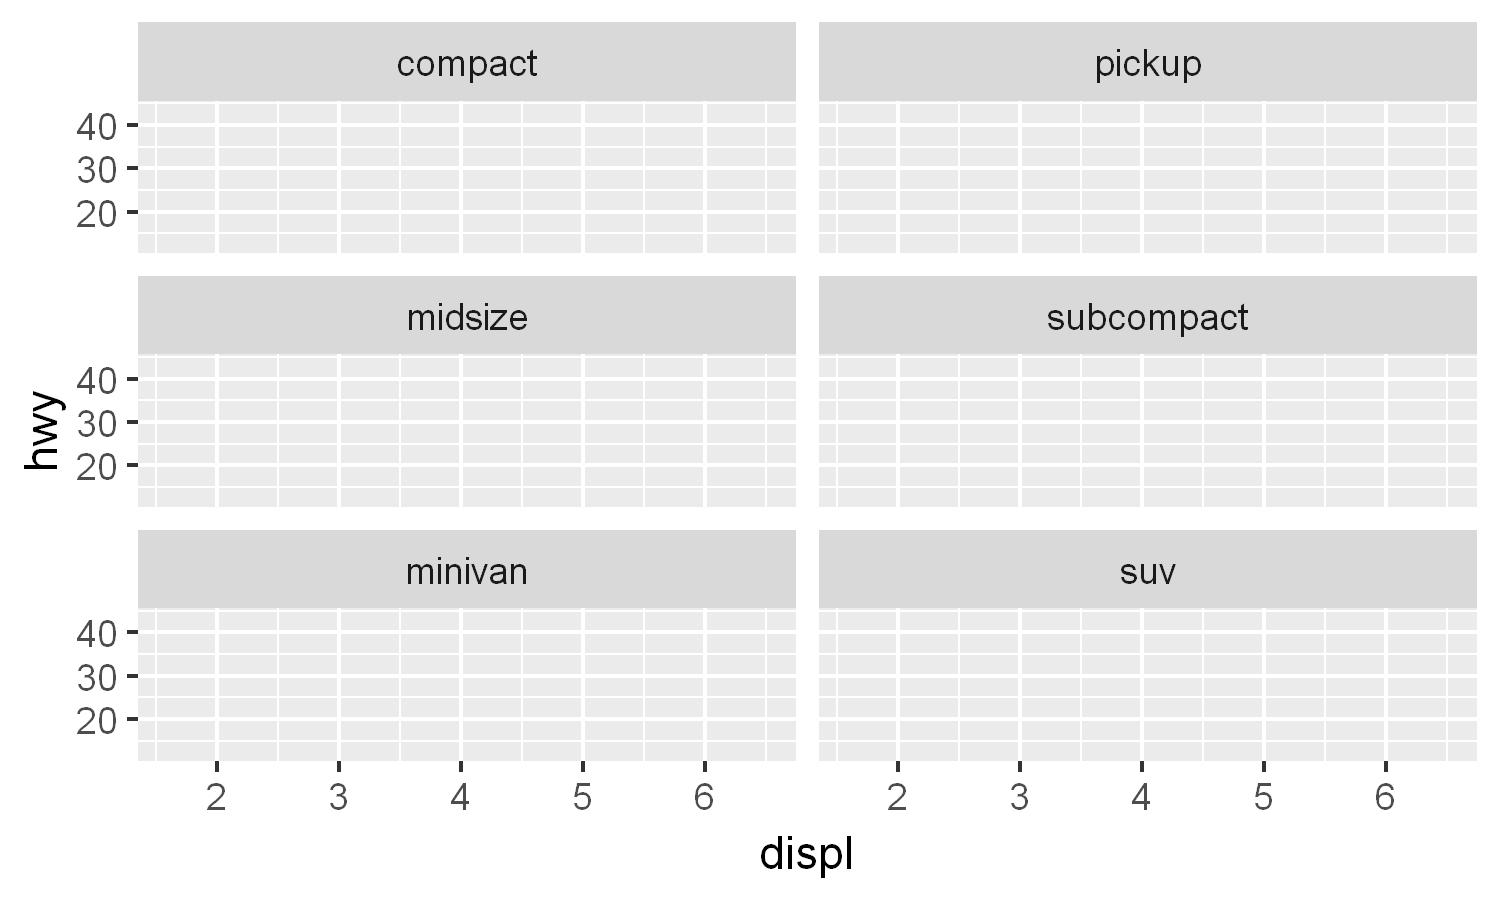

In [76]:
# subset facet
mpg2 <- subset(mpg, cyl != 5 & drv %in% c("4", "f") & class != "2seater")
base <- ggplot(mpg2, aes(displ, hwy)) + 
  geom_blank()
base + facet_wrap(~class, nrow = 3)
base + facet_wrap(~class, nrow = 3, dir = "v")



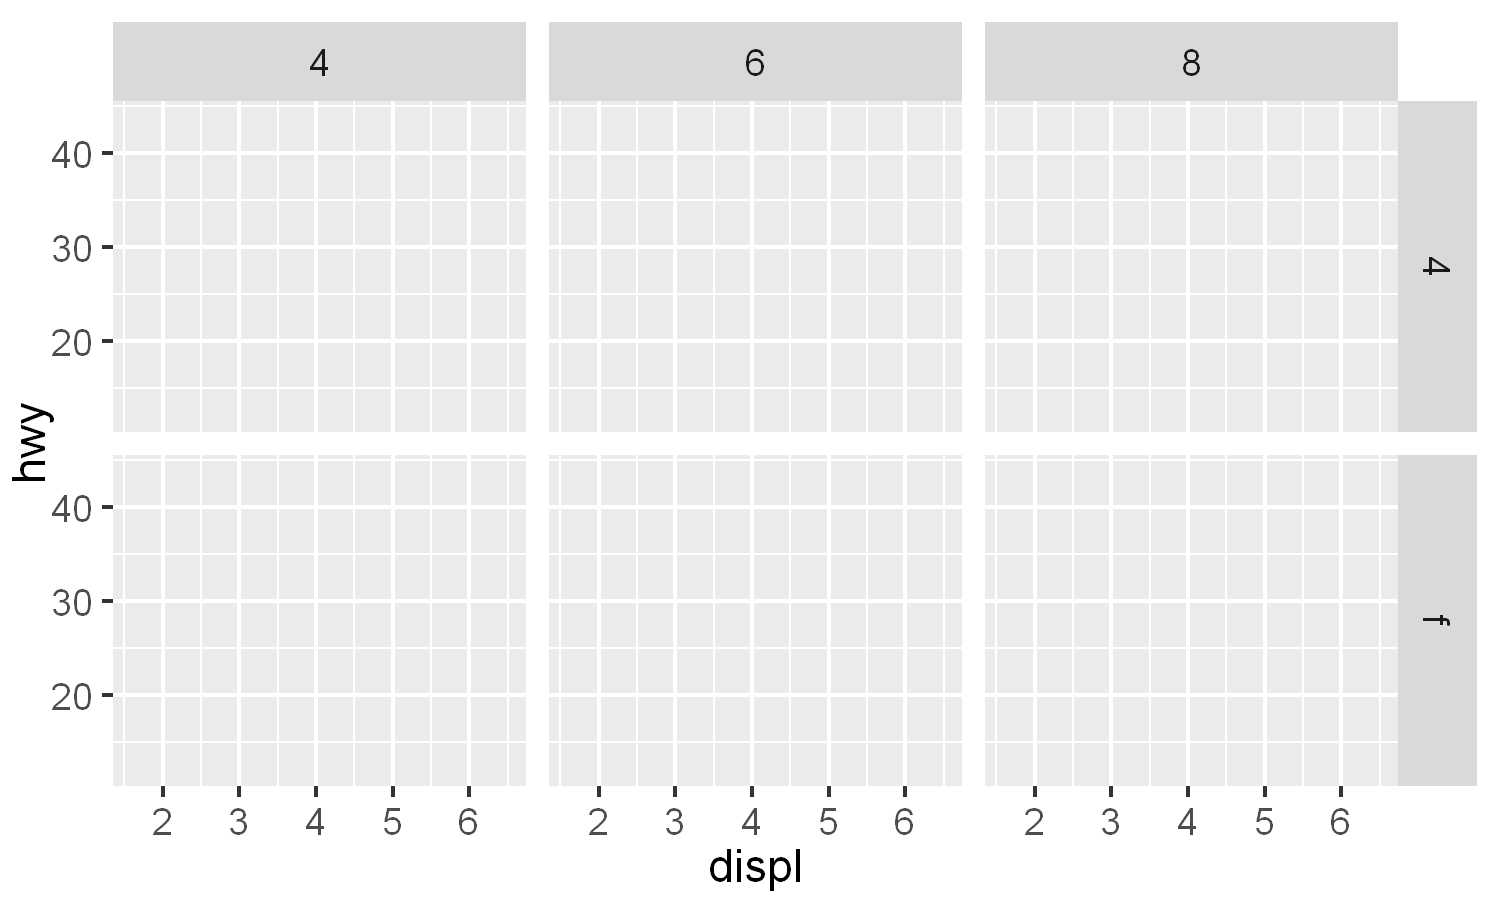

In [77]:
base <- ggplot(mpg2, aes(displ, hwy)) + 
  geom_blank()
base + facet_grid(drv ~ cyl) # columns~ rows (drv~.)(.~cyl)
# a + b ~ c + d

## scales & space
"free"/ "free_y"

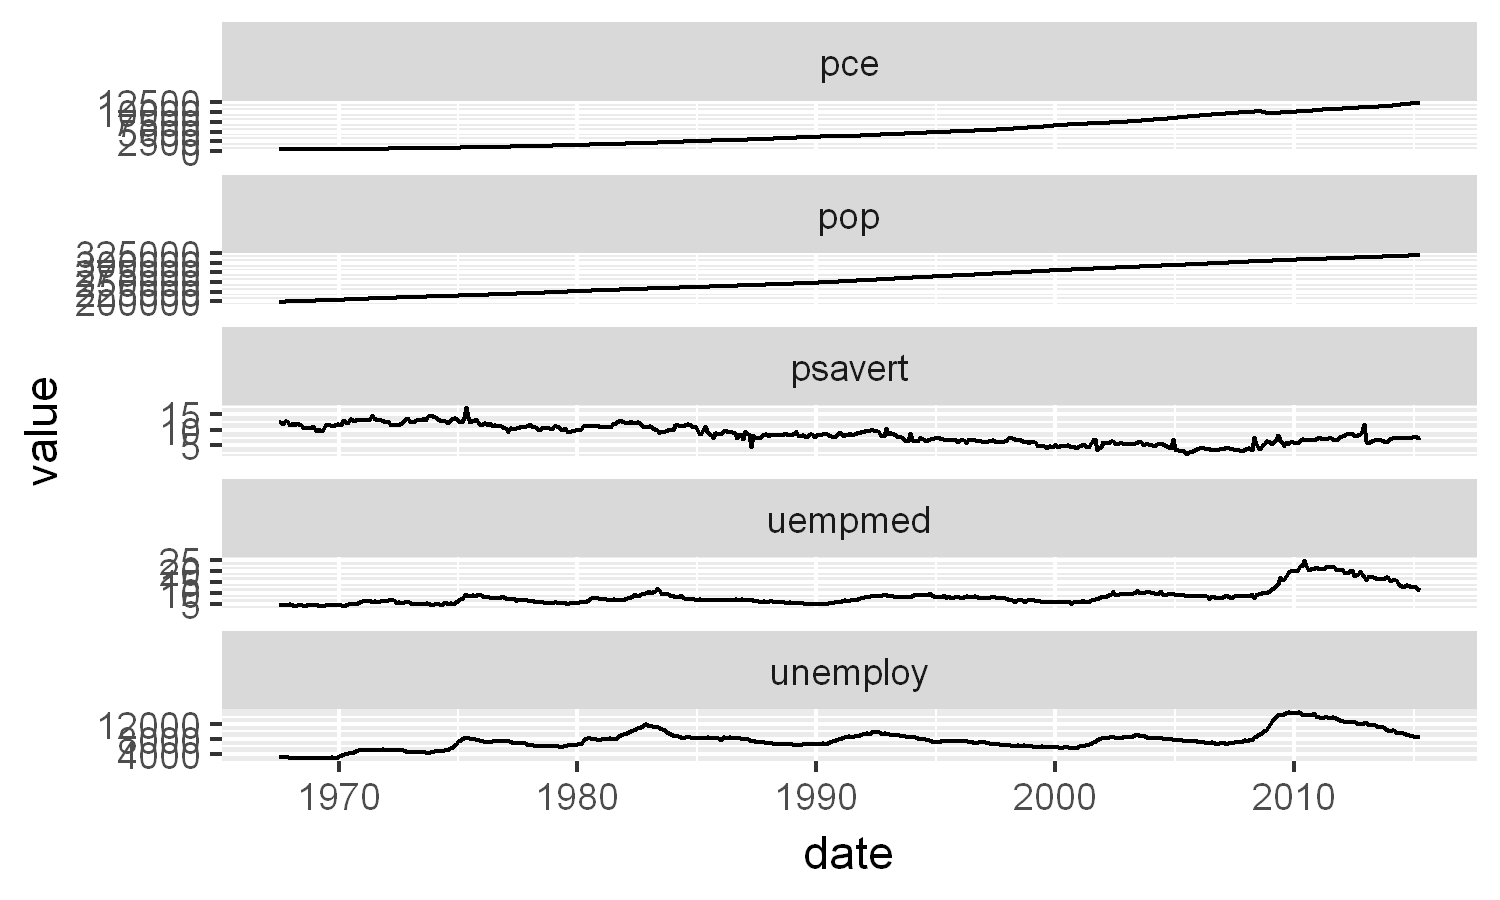

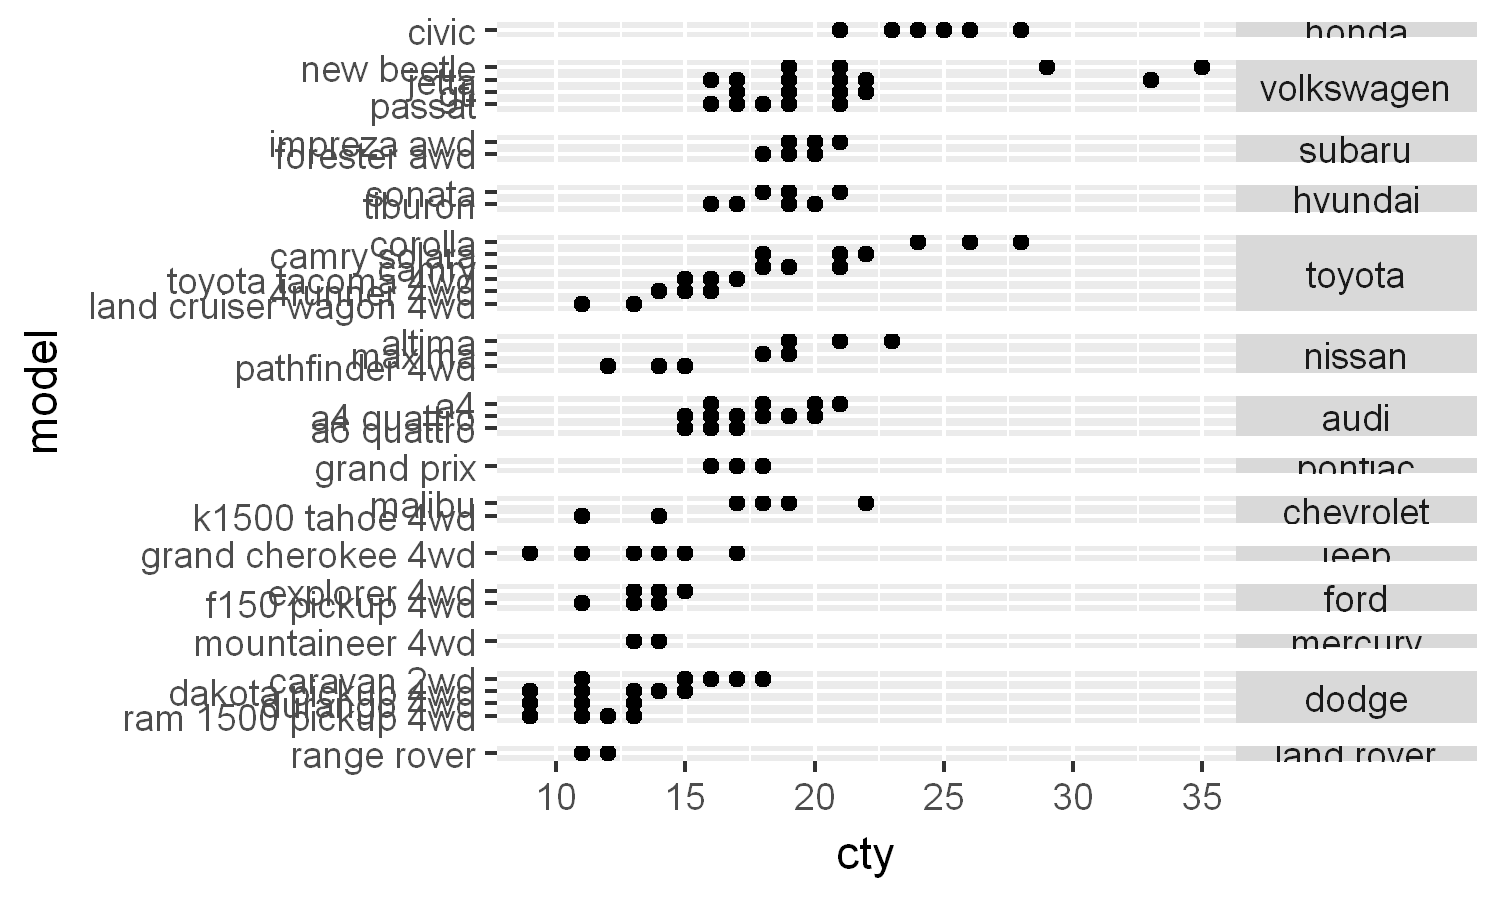

In [78]:
# display multiple time series that were measured on different scales
ggplot(economics_long, aes(date, value)) + 
  geom_line() + 
  facet_wrap(~variable, scales = "free_y", ncol = 1) 
mpg2$model <- reorder(mpg2$model, mpg2$cty)
mpg2$manufacturer <- reorder(mpg2$manufacturer, -mpg2$cty)

ggplot(mpg2, aes(cty, model)) + 
  geom_point() + 
  facet_grid(manufacturer ~ ., scales = "free", space = "free") +
  theme(strip.text.y = element_text(angle = 0))

## Missing faceting variables
useful for adding label across facets and compare

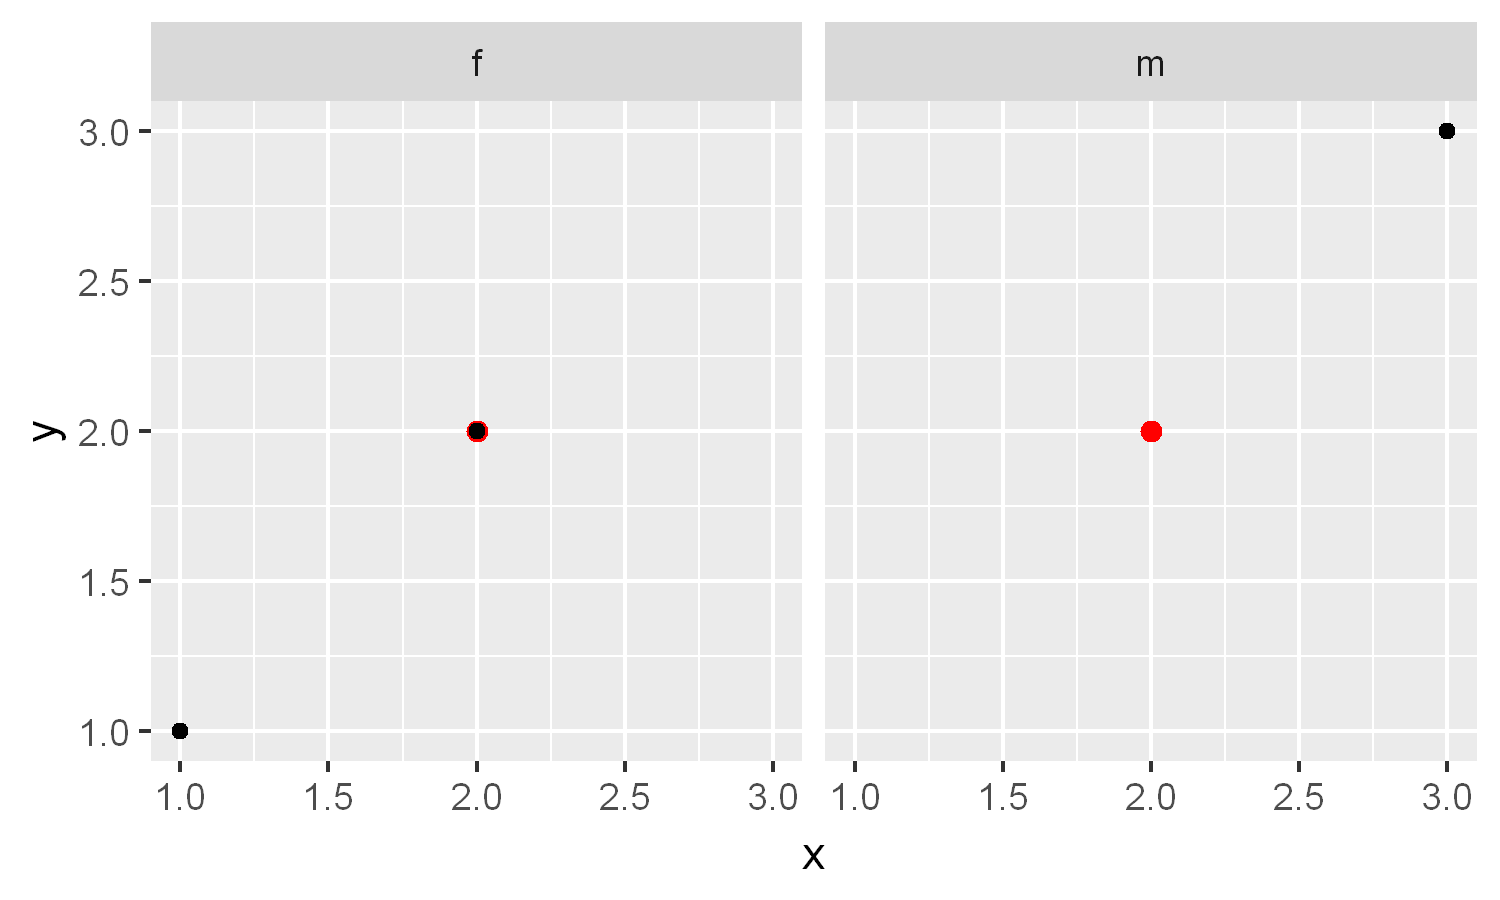

In [79]:
df1 <- data.frame(x = 1:3, y = 1:3, gender = c("f", "f", "m"))
df2 <- data.frame(x = 2, y = 2)

ggplot(df1, aes(x, y)) + 
  geom_point(data = df2, colour = "red", size = 2) + 
  geom_point() + 
  facet_wrap(~gender)

## Determine GROUPING OR Faceting
color = y -> relative positions/distributions among the subsets

    # Solutions:
    compensate by absolute position marking in facetting
    put all in background of each plane
    

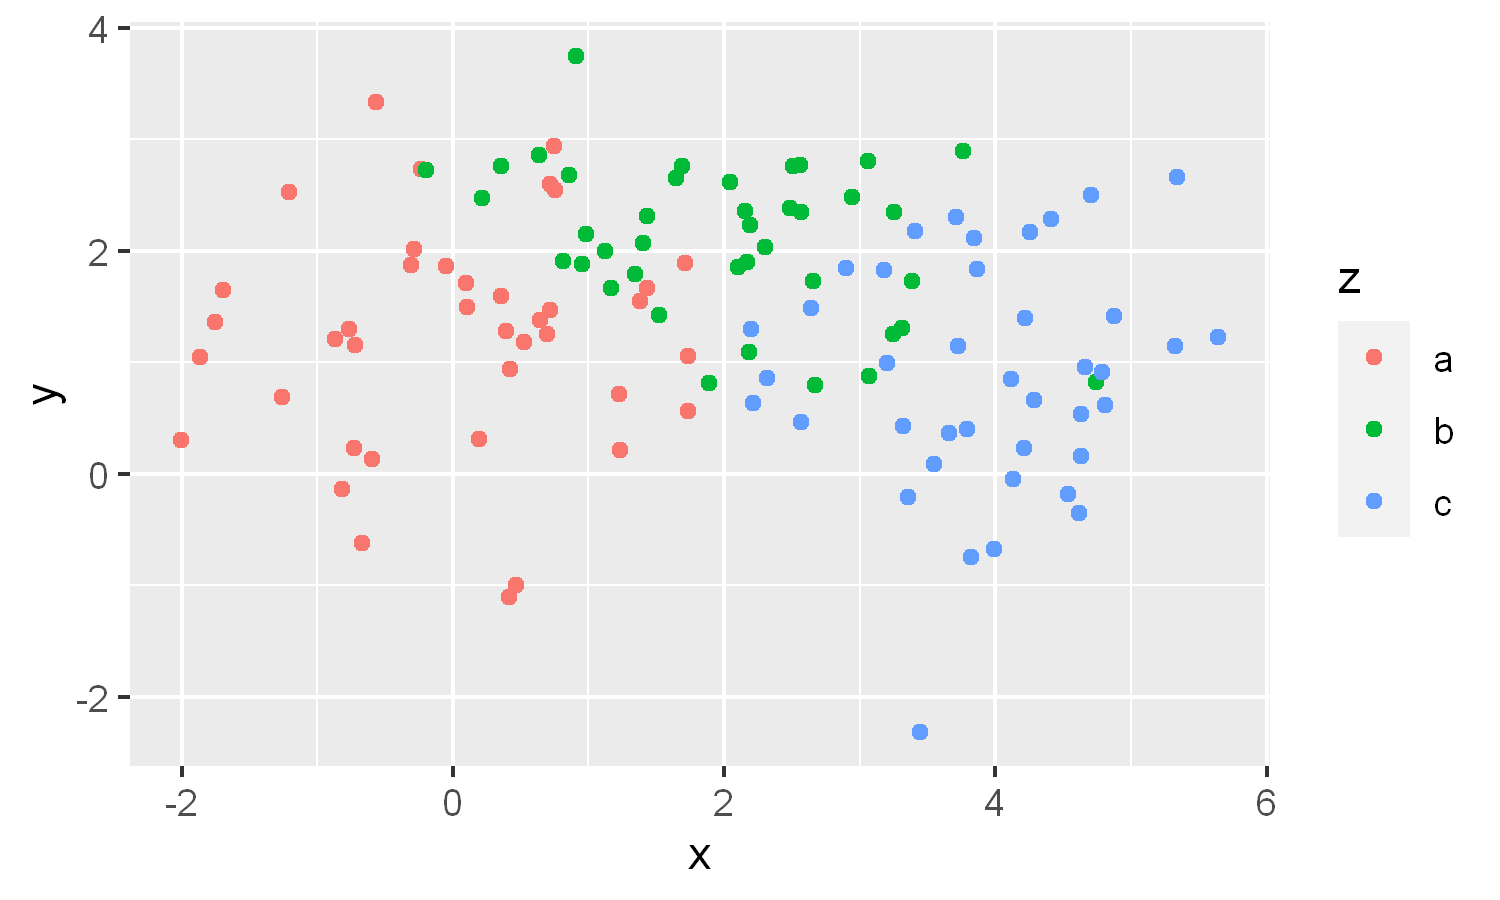

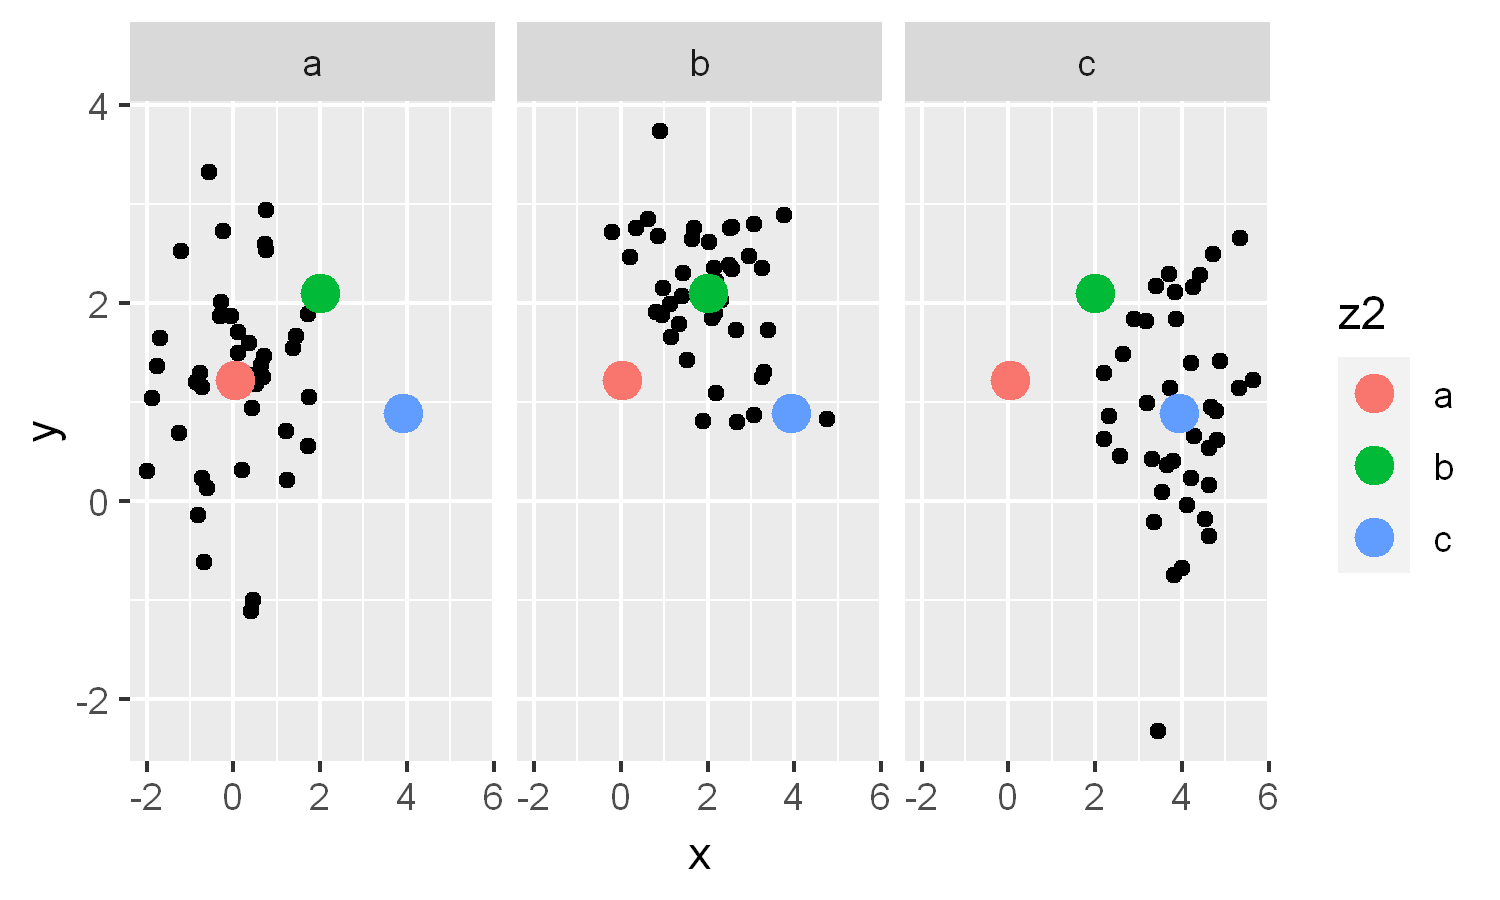

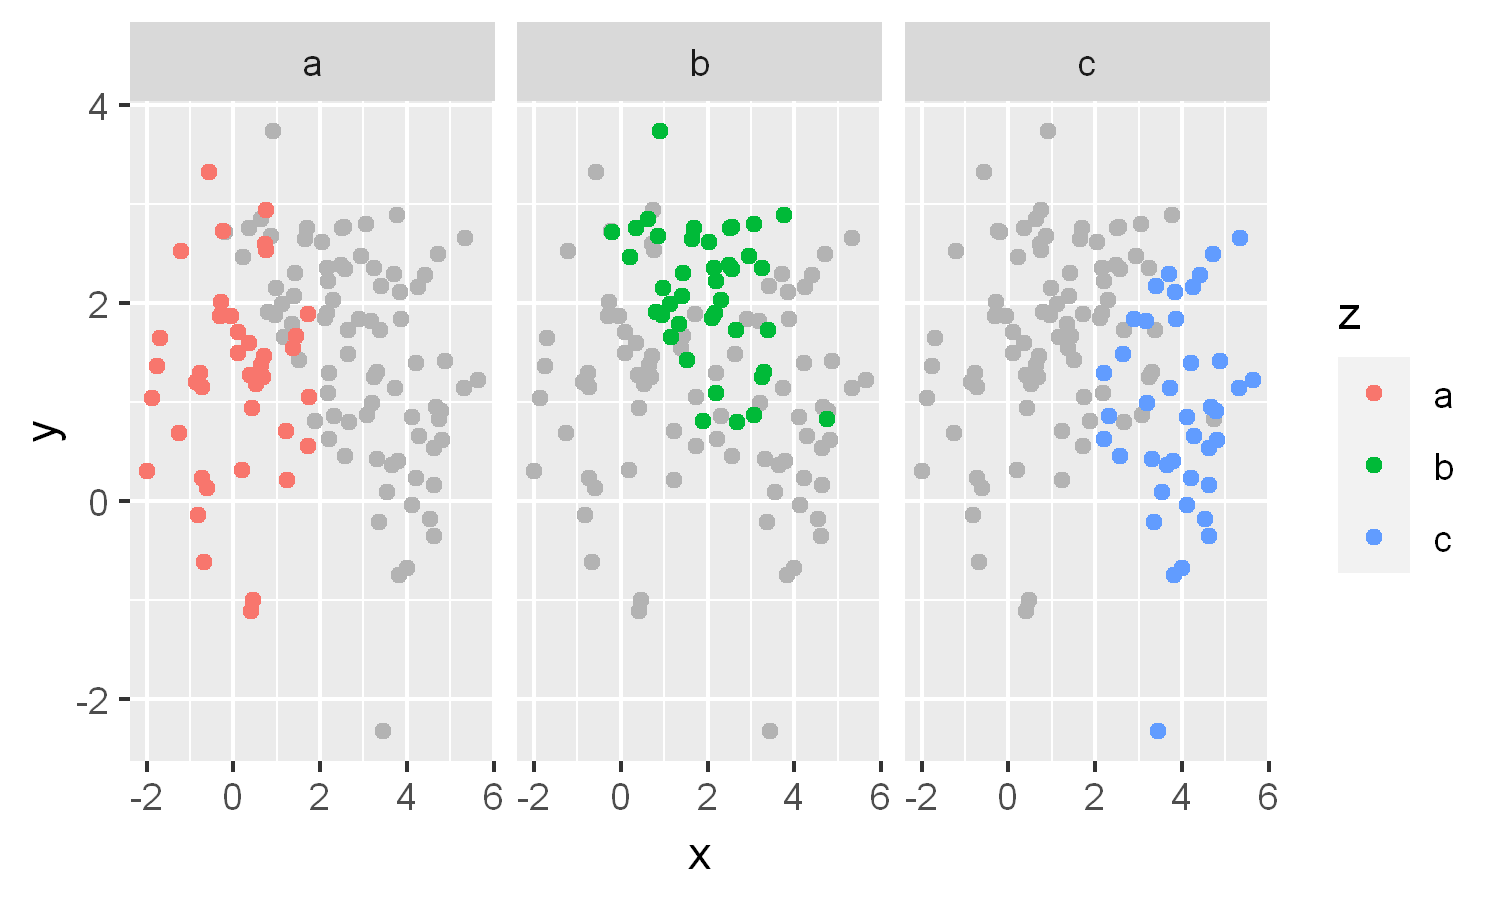

In [80]:
df <- data.frame(
  x = rnorm(120, c(0, 2, 4)),
  y = rnorm(120, c(1, 2, 1)),
  z = letters[1:3]
)

ggplot(df, aes(x, y)) + 
  geom_point(aes(colour = z))

df_sum <- df %>% 
  group_by(z) %>% 
  summarise(x = mean(x), y = mean(y)) %>%
  rename(z2 = z)

ggplot(df, aes(x, y)) + 
  geom_point() + 
  geom_point(data = df_sum, aes(colour = z2), size = 4) + 
  facet_wrap(~z)

df2 <- dplyr::select(df, -z)

ggplot(df, aes(x, y)) + 
  geom_point(data = df2, colour = "grey70") +
  geom_point(aes(colour = z)) + 
  facet_wrap(~z)

## Continuous variables
Discretizing into bins required -> factor of group
    
ggplot helper functions
    
    · cut_interval(x, n): Divide the data into n bins each of the same length
    · cut_width(x, width): Divide the data into bins of width width
    · cut_number(x, n = 10): Divide the data into n bins each containing (approximately) the same number of points

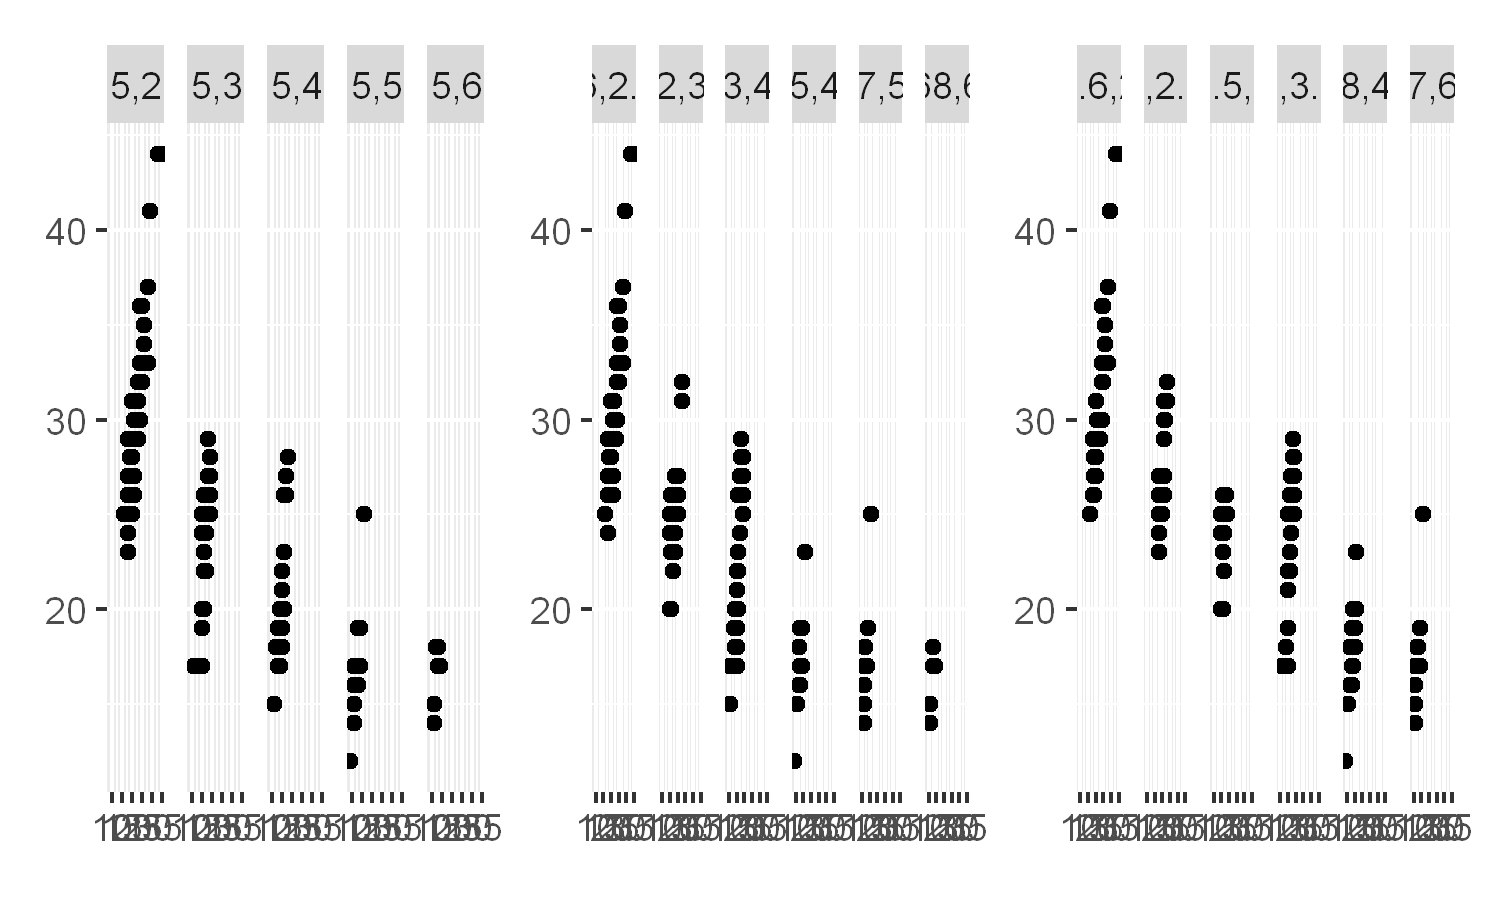

In [81]:
# Bins of width 1
mpg2$disp_w <- cut_width(mpg2$displ, 1)
# Six bins of equal length
mpg2$disp_i <- cut_interval(mpg2$displ, 6)
# Six bins containing equal numbers of points
mpg2$disp_n <- cut_number(mpg2$displ, 6)

plot <- ggplot(mpg2, aes(cty, hwy)) +
  geom_point() +
  labs(x = NULL, y = NULL)
plot + facet_wrap(~disp_w, nrow = 1)+
plot + facet_wrap(~disp_i, nrow = 1)+
plot + facet_wrap(~disp_n, nrow = 1)

# Themes
Positional adjustments of non-data elements
Control:

    fonts, ticks, panel strips, and backgrounds
    plot.title, axis.ticks.x, legend.key.height
NOT control:
    
    rendering by geoms
    transformation by scales
    Any of aesthetics or style
    
Element function --describes the visual properties of the element
    
    element_text() sets the font size, colour and face of text elements 
    
Match publisher style guidelines

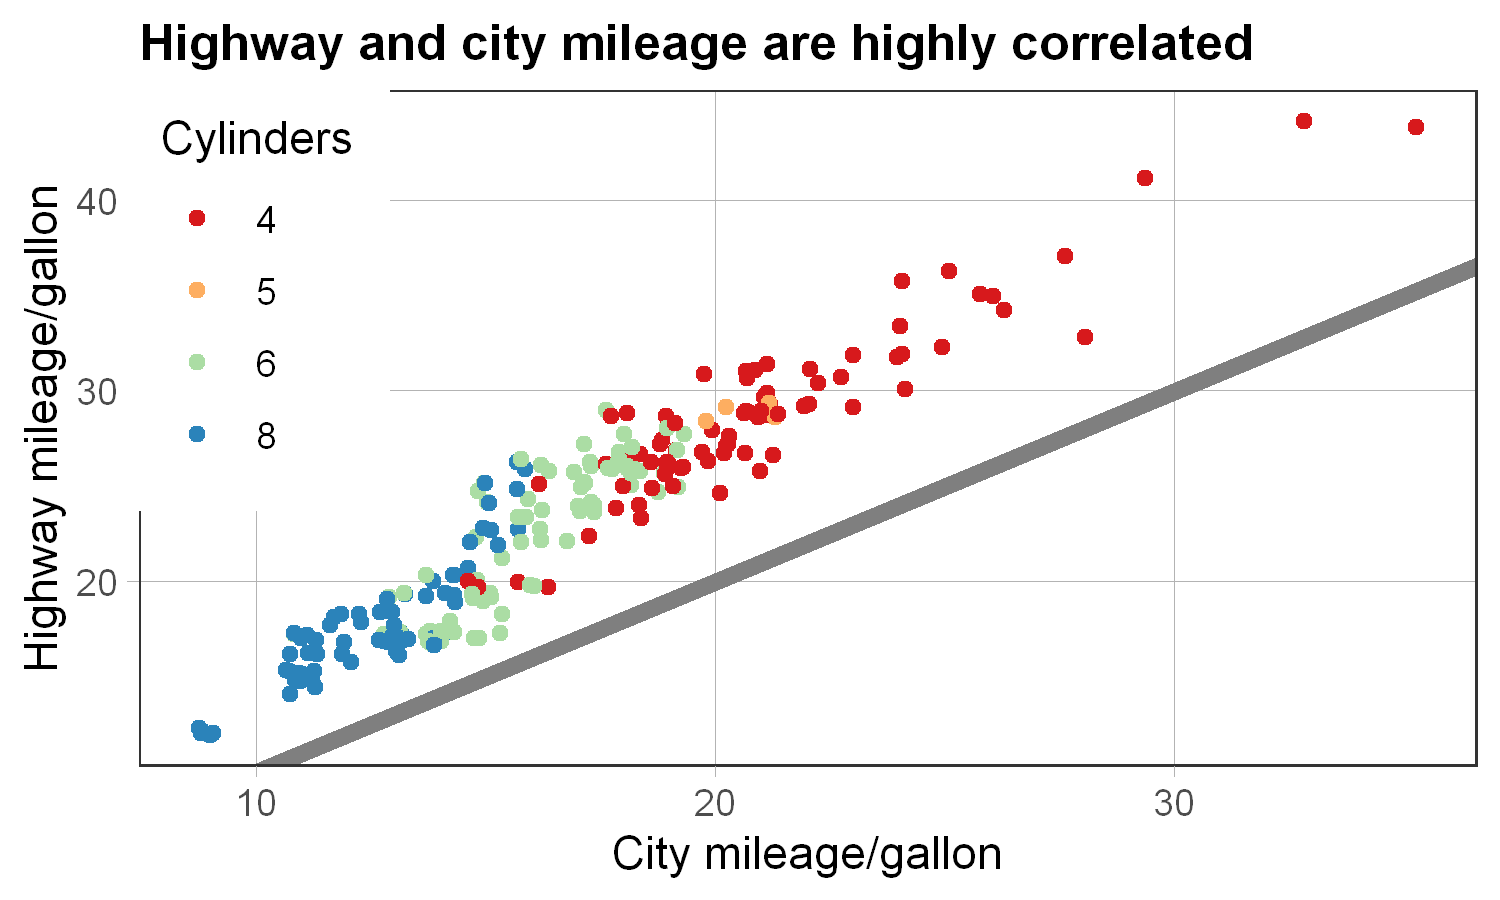

In [82]:
base <- ggplot(mpg, aes(cty, hwy, color = factor(cyl))) +
  geom_jitter() + 
  geom_abline(colour = "grey50", size = 2)


labelled <- base +
  labs(
    x = "City mileage/gallon",
    y = "Highway mileage/gallon",
    colour = "Cylinders",
    title = "Highway and city mileage are highly correlated"
  ) +
  scale_colour_brewer(type = "seq", palette = "Spectral")

styled <- labelled +
  theme_bw() + 
  theme(
    plot.title = element_text(face = "bold", size = 12),
    legend.background = element_rect(
      fill = "white", 
      linewidth = 4, 
      colour = "white"
    ),
    legend.justification = c(0, 1),
    legend.position = c(0, 1),
    axis.ticks = element_line(colour = "grey70", linewidth = 0.2),
    panel.grid.major = element_line(colour = "grey70", linewidth = 0.2),
    panel.grid.minor = element_blank()
  )
styled
# ggsave()

## Build in Complete themes
Default: theme_grey(), the signature ggplot2 theme with a light grey background and white gridlines

Others:
    
    · theme_bw(): a variation on theme_grey() that uses a white background and thin grey grid lines.
    · theme_linedraw(): a theme with only black lines of various widths on white backgrounds, reminiscent of a line drawing.
    · theme_light(): similar to theme_linedraw() but with light grey lines and axes, to direct more attention towards the data.
    · theme_dark(): the dark cousin of theme_light(), with similar line sizes but a dark background. Useful to make thin coloured lines pop out.
    · theme_minimal(): a minimalistic theme with no background annotations.
    · theme_classic(): a classic-looking theme, with x and y axis lines and no gridlines.
    · theme_void(): a completely empty theme
    · themes on other packages: library(ggthemes)

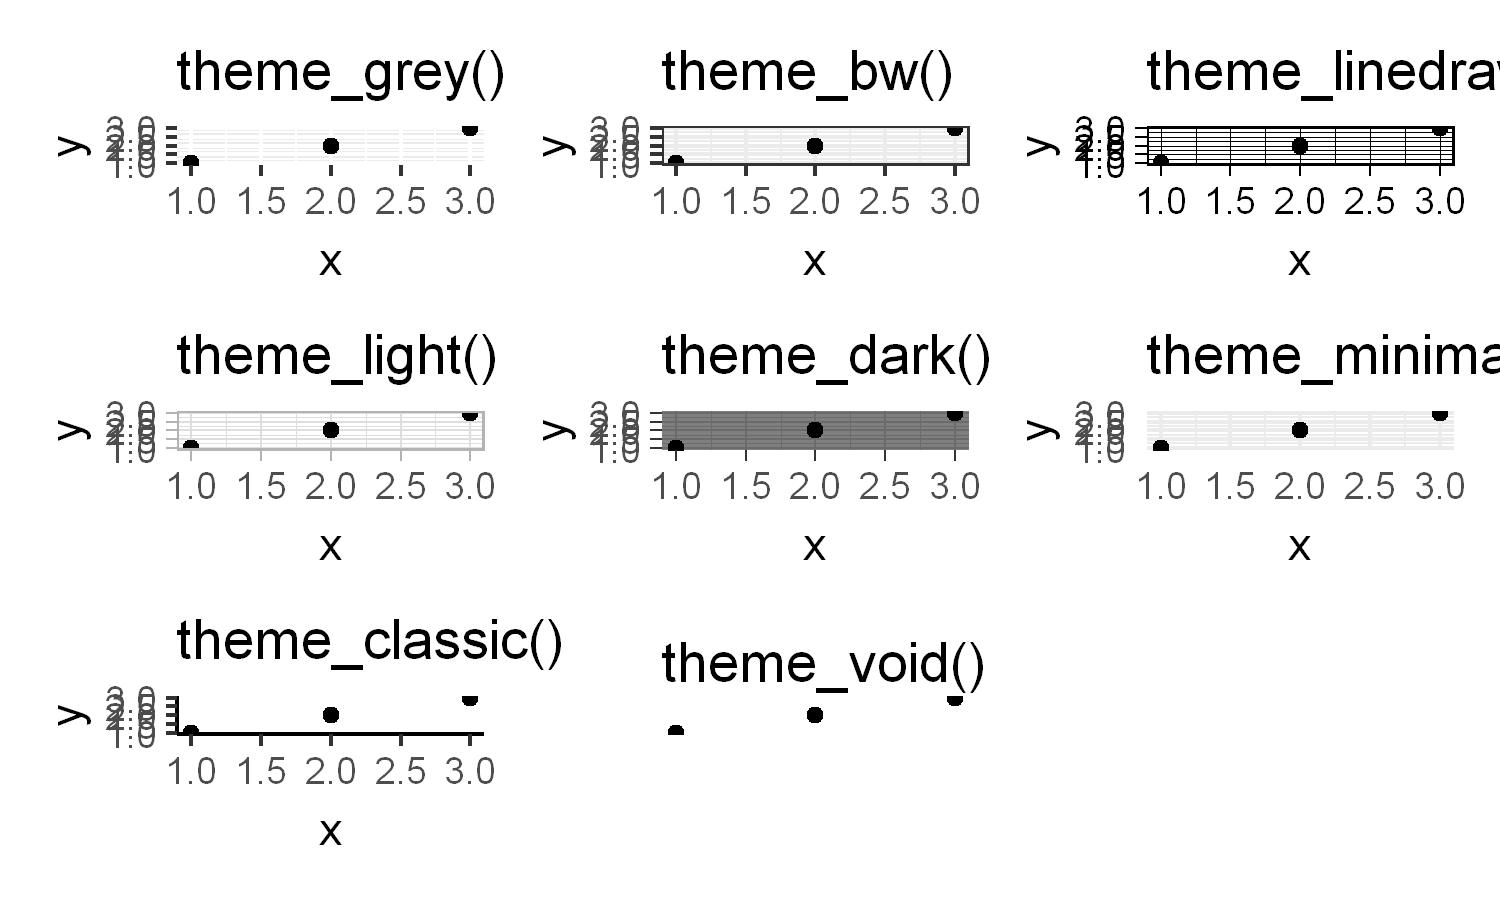

In [83]:
df <- data.frame(x = 1:3, y = 1:3)
base <- ggplot(df, aes(x, y)) + geom_point()
base + theme_grey() + ggtitle("theme_grey()")+
base + theme_bw() + ggtitle("theme_bw()")+
base + theme_linedraw() + ggtitle("theme_linedraw()")+
base + theme_light() + ggtitle("theme_light()")+
base + theme_dark() + ggtitle("theme_dark()")+
base + theme_minimal()  + ggtitle("theme_minimal()")+
base + theme_classic() + ggtitle("theme_classic()")+
base + theme_void() + ggtitle("theme_void()")

## theme components
plot + theme(element.name = element_function())

Controls theme elements:

    family, face, colour, size (in points), hjust, vjust, angle (in degrees) and lineheight (as ratio of fontcase), axis.title.x, axis.title.y
    More in: vignette("ggplot2-specs")
    
Options:theme()
  
    · plot.title = element_text(size = 16,face = "bold", colour = "red",hjust = 1)
    · element_text(margin = margin(t = 10, b = 10, r = 10))
    · panel.grid.major = element_line(colour = "black", element_line(linewidth = 2), linetype = "dotted"))
    · plot.background = element_rect(fill = "grey80", colour = NA, linewidth = 2, fill = "linen")
    · panel.grid.minor = element_blank()
    · theme_update()        
        store theme 

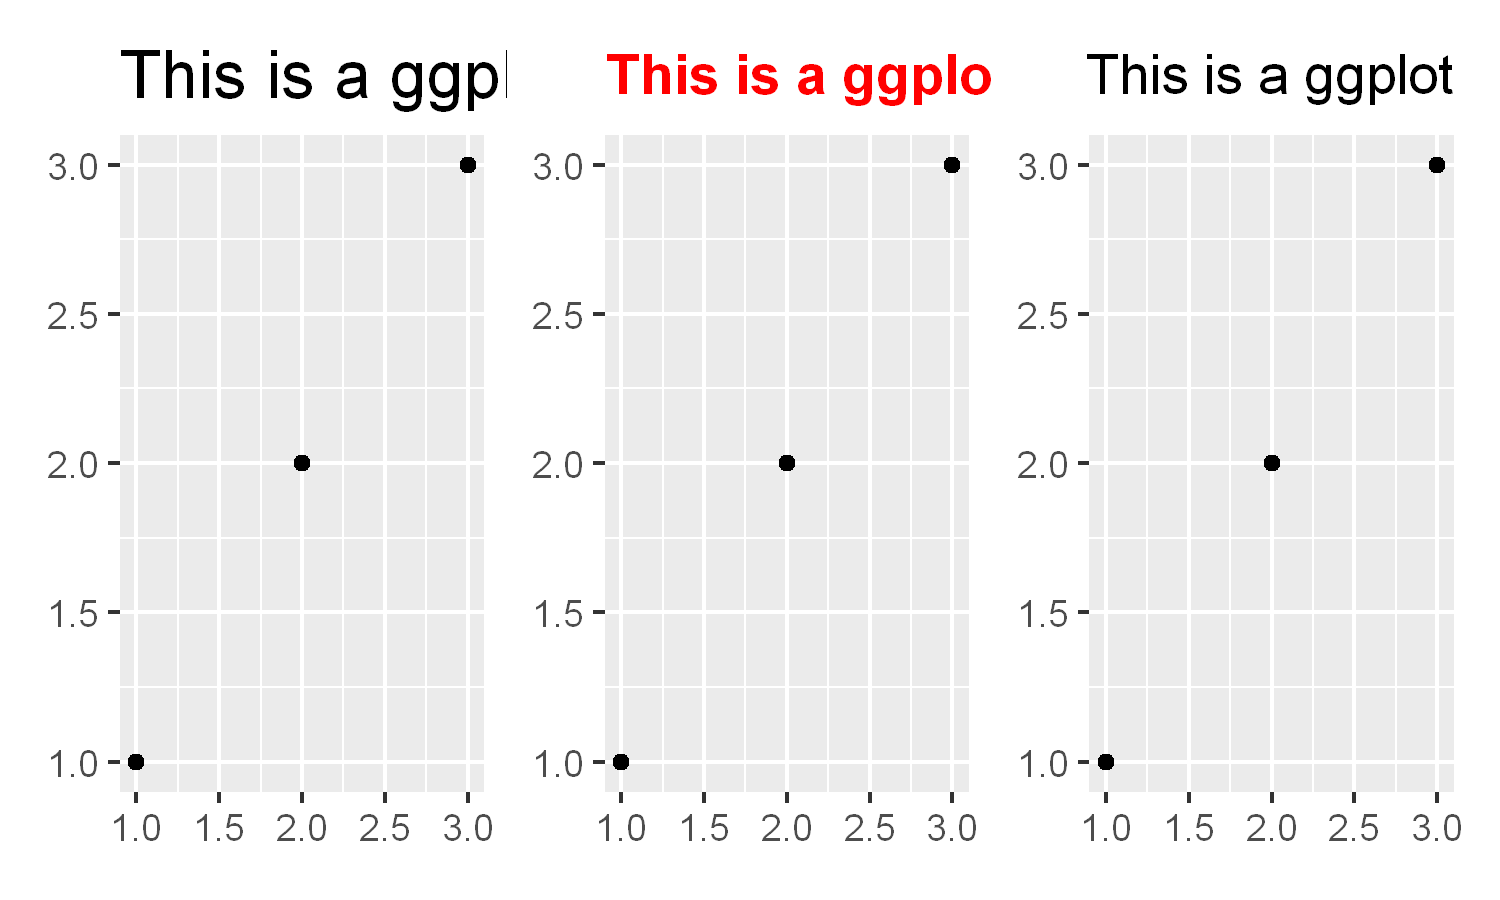

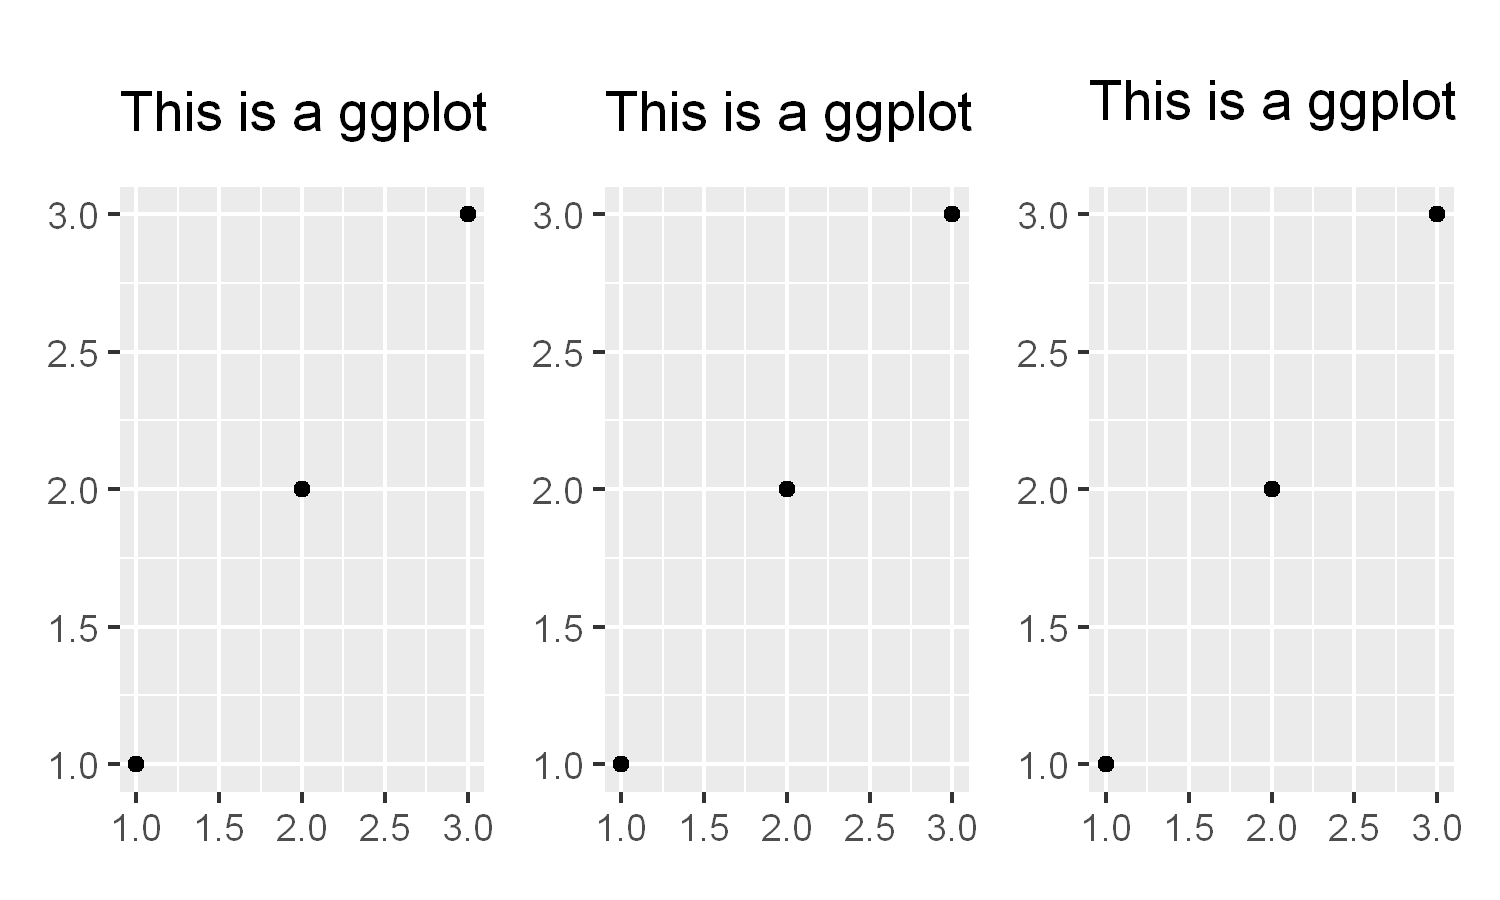

In [84]:
base_t <- base + labs(title = "This is a ggplot") + xlab(NULL) + ylab(NULL)
base_t + theme(plot.title = element_text(size = 16))+
base_t + theme(plot.title = element_text(face = "bold", colour = "red"))+
base_t + theme(plot.title = element_text(hjust = 1))

# plot margins-> asymmetric 
base_t + theme(plot.title = element_text(margin = margin()))+
base_t + theme(plot.title = element_text(margin = margin(t = 10, b = 10)))+
base_t + theme(axis.title.y = element_text(margin = margin(r = 10)))

## theme elements
Plot elements
    
    plot.background = element_rect()
    plot.title =	element_text() 	
    plot.margin =	margin()
    
    Arguments: fill, colour, linewidth 
Axis elements

    axis.line =	element_line() 	line parallel to axis (hidden in default themes)
    axis.text =	element_text() 	tick labels
    axis.text.x =	element_text() 	x-axis tick labels
    axis.text.y =	element_text() 	y-axis tick labels
    axis.title =	element_text() 	axis titles
    axis.title.x =	element_text() 	x-axis title
    axis.title.y =	element_text() 	y-axis title
    axis.ticks =	element_line() 	axis tick marks
    axis.ticks.length =	unit()  length of tick marks
    
    Arugments: +-angle/ vjust/ hjust
    
Legend elements:

    legend.background =	element_rect() 	legend background
    legend.key = 	element_rect() 	background of legend keys
    legend.key.size =	unit() 	legend key size
    legend.key.height =	unit() 	legend key height
    legend.key.width =	unit() 	legend key width
    legend.margin =	unit() 	legend margin
    legend.text =	element_text() 	legend labels
    legend.text.align 	0–1 	legend label alignment (0 = right, 1 = left)
    legend.title =	element_text() 	legend name
    legend.title.align 	0–1 	legend name alignment (0 = right, 1 = left)

    Arguments: element_rect(color = "grey50"), unit(0.9, "cm"), element_text(size = 15, face = "bold")
    
Panel elements:

    panel.background =	element_rect() 	panel background (under data)
    panel.border =	element_rect() 	panel border (over data)
    panel.grid.major =	element_line() 	major grid lines
    panel.grid.major.x =	element_line() 	vertical major grid lines
    panel.grid.major.y =	element_line() 	horizontal major grid lines
    panel.grid.minor =	element_line() 	minor grid lines
    panel.grid.minor.x =	element_line() 	vertical minor grid lines
    panel.grid.minor.y =	element_line() 	horizontal minor grid lines
    aspect.ratio =	numeric 	plot aspect ratiowide 9/16, long 2/1, square 1
    
Faceting:

    strip.background =	element_rect() 	background of panel strips
    strip.text =	element_text() 	strip text
    strip.text.x =	element_text() 	horizontal strip text
    strip.text.y =	element_text() 	vertical strip text
    panel.spacing =	unit() 	margin between facets
    panel.spacing.x =	unit() 	margin between facets (vertical)
    panel.spacing.y =	unit() 	margin between facets (horizontal)

## ggsave
1. path:
   .pdf, .svg, .wmf, .png, .jpg, .bmp, and .tiff.
   
2. width and height in inches/ size of screen
   
3. dpi 
    
    resolution = 300

ggplot(mpg, aes(displ, cty)) + geom_point()
ggsave("output.pdf")


ggplot(mpg, aes(displ, cty)) + geom_point()
ggsave("output.pdf")

# Useful codes

aes(color = factor(continuous), x = umemployed/pop, color = 'blue')
ggsave('plot.png', width=5, height=5)
saveRDS(p, "plot.rds") #    q<- readRDS("plot.rds")
qplot(x,y, data)# quickplot
geom_text(aes(label = family, family = family)) # Labels

# scale # The name of the aesthetic (e.g., colour, shape or x)
# The name of the scale (e.g., continuous, discrete, brewer)
scale_fill_manual(values = c("blue", "red"))
scale_size_area("legend name", breaks=c(.5,1,2,4)) # for ordered
scale_colour_discrete("Drive\ntrain")

### remove x,y, legend labels
xlab(NULL) + ylab(NULL) + 
theme(legend.position = "none")
inherit.aes = FALSE # prevents the layer from inheriting aesthetics from the parent plot. This ensures your annotation works regardless of what else is
on the plot.

show.legend = FALSE
+ guides(size = guide_bins(show.limits = TRUE))

Stats-summarizing

    smoother-smoothed mean
    Examples:
        • stat_bin(): geom_bar(), geom_freqpoly(), geom_histogram()
        • stat_bin2d(): geom_bin2d()
        • stat_bindot(): geom_dotplot()
        • stat_binhex(): geom_hex()
        • stat_boxplot(): geom_boxplot()
        • stat_contour(): geom_contour()
        • stat_quantile(): geom_quantile()
        • stat_smooth(): geom_smooth()
        • stat_sum(): geom_count()
        Extras:
            • stat_ecdf(): compute a empirical cumulative distribution plot.
            • stat_function(): compute y values from a function of x values.
            • stat_summary(): summarise y values at distinct x values.
            • stat_summary2d(), stat_summary_hex(): summarise binned values.
            • stat_qq(): perform calculations for a quantile-quantile plot.
            • stat_spoke(): convert angle and radius to position.
            • stat_unique(): remove duplicated rows.

1. scale 
2. The name of the aesthetic (e.g., colour, shape or x)
3. The name of the scale (e.g., continuous, discrete, brewer)
    
    scale_x_continuous(quote(a + mathematical ^ expression)) # supply text string \n

For one variable(x only, count or identity(already n)/ bin)

    geom_bar()/ geom_histogram/ geom_density()/ geom_dotplot()/ geom_freqpoly()
    
Two variables(x,y)
    
    continuous
        geom_point/quantile/ rug/ smooth/ text/
    Distribution
        geom_bind2d()/ density2d()/ hex
    At least one discrete
        geom_count/ gitter
    One continuous, one discrete
        geom_bar(stat='identity')/ boxplot/ violin
    Time & continuous
        geom_area/ line/ step
    uncertainty
        geom_crossbar()/ errorbar/ linerange/ pointrange
    spatial 
        geom_map
  
Three variables

    geom_contour/ tile/ raster

scale mapping to aes: From left to right: continuous variable mapped to size, and to colour, discrete variable mapped to shape, and to colour

Only need to set one of stat and geom

    geom has default stat, stat has fefault geom
position: jittering, stacking, dodging

## supress warning messages

library(dplyr, warn.conflicts=FALSE) 

suppressPackageStartupMessages(library(ggplot2))

suppressMessages()

suppressWarnings()

invisible()


## Additional metadata

metadata layer display background context, annotation gives meaning to raw data, fixed reference aid comparsion across panels

!display underneath the data-> minimally perceptible

Explanatory labels on top layer